# Init

In [1]:
%load_ext autoreload
%autoreload 2

import os
%env CUDA_VISIBLE_DEVICES=1
print("CUDA_VISIBLE_DEVICES:", os.environ.get("CUDA_VISIBLE_DEVICES"))

import torch

# Explicitly set GPU 1
device = torch.device("cuda:0")  # Since CUDA_VISIBLE_DEVICES makes GPU 1 appear as GPU 0
torch.cuda.set_device(device)

# Check which device is being used
print("Current CUDA device:", torch.cuda.current_device())
print("Device name:", torch.cuda.get_device_name(torch.cuda.current_device()))

env: CUDA_VISIBLE_DEVICES=1
CUDA_VISIBLE_DEVICES: 1
Current CUDA device: 0
Device name: NVIDIA RTX A6000


In [2]:
import sys
from pathlib import Path

# Get the parent directory of the notebook (i.e., the 'project/' folder)
parent_dir = Path().resolve().parent
sys.path.append(str(parent_dir))

from embedding_quality import embedding_quality
from plot_embedding import plot_embed, get_scale, add_scale
from analyze_rs import analyze_rs, analyze_rs_om

import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.decomposition import PCA
import torchvision
import pandas as pd


In [3]:
mrs_eval = False

In [4]:
# Tasic
tasic_colors = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/tasic/tasic-colors.npy')
tasic_pca50 = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/tasic/tasic-pca50.npy')
tasic_ttypes = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/tasic/tasic-ttypes.npy')

tasic_pca2 = tasic_pca50[:, :2]
tasic_pca2_scaled = tasic_pca2 / tasic_pca2[:,0].std()
tasic_pca2_scaled_eval = embedding_quality(tasic_pca2_scaled, tasic_pca50, tasic_ttypes)

In [5]:
# kanton
# data
folder_path = "/gpfs01/berens/data/sharing_files/sdamrich/for_noel/human-409b2"
data_file = f"{folder_path}/human-409b2.data.npy"
labels_file = f"{folder_path}/human-409b2.labels.npy"
pkl_file = f"{folder_path}/human-409b2.pkl"

kanton_pca50 = np.load(data_file)
kanton_labels = np.load(labels_file)

with open(pkl_file, "rb") as f:
    pkl_data = pickle.load(f)

kanton_colors = np.array([pkl_data["label_colors"][i] for i in kanton_labels])

# Print shapes and types
print("Data shape:", kanton_pca50.shape)
print("Labels shape:", kanton_labels.shape)
print("Colors shape:", kanton_colors.shape)
print("Pickle data type:", type(pkl_data))

kanton_pca2 = kanton_pca50[:, :2]
kanton_pca2_scaled = kanton_pca2 / kanton_pca2[:,0].std()
kanton_eval_pca2_scaled = embedding_quality(kanton_pca50, kanton_pca2_scaled, kanton_labels)

Data shape: (20272, 50)
Labels shape: (20272,)
Colors shape: (20272,)
Pickle data type: <class 'dict'>


In [6]:
# genome
# data
genome_data = np.loadtxt('/gpfs01/berens/user/nkury/tsne_pca/data/Genomes/gt_sum_thinned.npy')
genome_pca50 = PCA(n_components=50).fit_transform(genome_data)

population_labels = np.loadtxt('/gpfs01/berens/user/nkury/tsne_pca/data/Genomes/population_labels.txt', dtype=str)
population_names = pd.read_csv('/gpfs01/berens/user/nkury/tsne_pca/data/Genomes/1kgp_population_names.tsv', sep='\t', dtype=str)

# colors
genome_colors = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/Genomes/genome_colors.npy')

genome_pca2 = genome_pca50[:, :2]
genome_pca2_scaled = genome_pca2 / genome_pca2[:,0].std()
genome_eval_pca2_scaled = embedding_quality(genome_pca50, genome_pca2_scaled, population_labels)


In [7]:
# mnist
# load MNIST
mnist_train = torchvision.datasets.MNIST(root='/gpfs01/berens/user/nkury/tsne_pca/data',
                                         train=True,
                                         download=False, 
                                         transform=None)
x_train, y_train = mnist_train.data.float().numpy(), mnist_train.targets

mnist_test = torchvision.datasets.MNIST(root='/gpfs01/berens/user/nkury/tsne_pca/data',
                                        train=False,
                                        download=False, 
                                        transform=None)
x_test, y_test = mnist_test.data.float().numpy(), mnist_test.targets

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

x = np.concatenate([x_train, x_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)

pca = PCA(n_components=50)
mnist_pca50 = pca.fit_transform(x_train)
mnist_labels = y_train

mnist_pca2 = mnist_pca50[:, :2]
mnist_pca2_scaled = mnist_pca2 / mnist_pca2[:,0].std()
mnist_eval_pca2_scaled = embedding_quality(mnist_pca50, mnist_pca2_scaled, mnist_labels)

In [8]:
# retina
retina_pca50 = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/retina/3000_no_std_pca50.npy')
retina_colors_list = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/retina/clusterColors.npy')
retina_labels = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/retina/labels 1.npy')
retina_colors = retina_colors_list[retina_labels]

retina_pca2 = retina_pca50[:, :2]
retina_pca2_scaled = retina_pca2 / retina_pca2[:,0].std()
retina_eval_pca2_scaled = embedding_quality(retina_pca50, retina_pca2_scaled, retina_labels)

In [11]:
# zebrafish
zfish_pca50 = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/zfish/zfish.data.npy')
zfish_colors = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/zfish/zfish.labels.npy')
zfish_alt_colors = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/zfish/zfish.altlabels.npy')

zfish_pca2 = zfish_pca50[:, :2]
zfish_pca2_scaled = zfish_pca2 / zfish_pca2[:,0].std()
zfish_eval_pca2_scaled = embedding_quality(zfish_pca50, zfish_pca2_scaled, zfish_colors)
zfish_eval_pca2_scaled_alt = embedding_quality(zfish_pca50, zfish_pca2_scaled, zfish_alt_colors)

In [14]:
print(np.unique(zfish_alt_colors))

['darkgreen' 'darkorange' 'darkturquoise' 'fuchsia' 'gainsboro' 'navy'
 'royalblue' 'skyblue' 'slategrey' 'tomato']


In [10]:
# c-elegans
c_el_pca50 = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/c_elegans/c_elegans_50pc.npy')
c_el_labels = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/c_elegans/c_el_cell_types.npy', allow_pickle=True).astype(str)
c_el_colors = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/c_elegans/c_el_colors.npy')

c_el_pca2 = c_el_pca50[:, :2]
c_el_pca2_scaled = c_el_pca2 / c_el_pca2[:,0].std()
c_el_pca2_scaled_eval = embedding_quality(c_el_pca50, c_el_pca2_scaled, c_el_labels)

In [11]:
# PCA-reg results
with open('results/tasic_results_opentsne_pca_reg.pkl', 'rb') as f:
    tasic_reg_results = pickle.load(f)
if mrs_eval:
    #tasic_reg_results = {}

    for i, seed in enumerate(tasic_reg_results.keys()):
        #tasic_reg_results[seed] = {}
        for l in tasic_reg_results[seed].keys():
            emb = tasic_reg_results[seed][l]['embedding']
            eval = embedding_quality(emb, tasic_pca50, tasic_ttypes, seed=i)
            tasic_reg_results[seed][l] = {
                'embedding': emb,
                'eval': eval
            }

with open('results/kanton_results_opentsne_pca_reg.pkl', 'rb') as f:
    kanton_reg_results = pickle.load(f)
if mrs_eval:
    #kanton_reg_results = {}

    for i, seed in enumerate(kanton_reg_results.keys()):
        #kanton_reg_results[seed] = {}
        for l in kanton_reg_results[seed].keys():
            emb = kanton_reg_results[seed][l]['embedding']
            eval = embedding_quality(emb, kanton_pca50, kanton_labels, seed=i)
            kanton_reg_results[seed][l] = {
                'embedding': emb,
                'eval': eval
            }

with open('results/genome_results_opentsne_pca_reg.pkl', 'rb') as f:
    genome_reg_results = pickle.load(f)
if mrs_eval:
    #genome_reg_results = {}

    for i, seed in enumerate(genome_reg_results.keys()):
        #genome_reg_results[seed] = {}
        for l in genome_reg_results[seed].keys():
            emb = genome_reg_results[seed][l]['embedding']
            eval = embedding_quality(emb, genome_pca50, population_labels, seed=i)
            genome_reg_results[seed][l] = {
                'embedding': emb,
                'eval': eval
            }

with open('results/mnist_results_opentsne_pca_reg.pkl', 'rb') as f:
    mnist_reg_results = pickle.load(f)
if mrs_eval:
    #mnist_reg_results = {}

    for i, seed in enumerate(mnist_reg_results.keys()):
       # mnist_reg_results[seed] = {}
        for l in mnist_reg_results[seed].keys():
            emb = mnist_reg_results[seed][l]['embedding']
            eval = embedding_quality(emb, mnist_pca50, mnist_labels, seed=i)
            mnist_reg_results[seed][l] = {
                'embedding': emb,
                'eval': eval
            }

with open('results/retina_results_opentsne_pca_reg.pkl', 'rb') as f:
    retina_reg_results = pickle.load(f)
if mrs_eval:
    #retina_reg_results = {}

    for i, seed in enumerate(retina_reg_results.keys()):
        #retina_reg_results[seed] = {}
        for l in retina_reg_results[seed].keys():
            emb = retina_reg_results[seed][l]['embedding']
            eval = embedding_quality(emb, retina_pca50, retina_labels, seed=i)
            retina_reg_results[seed][l] = {
                'embedding': emb,
                'eval': eval
            }

with open('results/zfish_results_opentsne_pca_reg.pkl', 'rb') as f:
    zfish_reg_results = pickle.load(f)
if mrs_eval:
    #zfish_reg_results = {}

    for i, seed in enumerate(zfish_reg_results.keys()):
        #zfish_reg_results[seed] = {}
        for l in zfish_reg_results[seed].keys():
            emb = zfish_reg_results[seed][l]['embedding']
            eval = embedding_quality(emb, zfish_pca50, zfish_colors, seed=i)
            eval_alt = embedding_quality(emb, zfish_pca50, zfish_alt_colors, seed=i)
            zfish_reg_results[seed][l] = {
                'embedding': emb,
                'eval': eval,
                'eval_alt': eval_alt
            }

with open('results/c_elegans_results_opentsne_pca_reg.pkl', 'rb') as f:
    c_el_reg_results = pickle.load(f)
if mrs_eval:
    #c_el_reg_results = {}

    for i, seed in enumerate(c_el_reg_results.keys()):
        #c_el_reg_results[seed] = {}
        for l in c_el_reg_results[seed].keys():
            emb = c_el_reg_results[seed][l]['embedding']
            eval = embedding_quality(emb, c_el_pca50, c_el_labels, seed=i)
            c_el_reg_results[seed][l] = {
                'embedding': emb,
                'eval': eval
            }

In [12]:
tasic_reg_results.keys()

dict_keys(['seed_0', 'seed_1', 'seed_2', 'seed_3'])

In [13]:
# MDS reg results
with open('results/tasic_results_opentsne_mds_reg.pkl', 'rb') as f:
    tasic_mds_reg_results = pickle.load(f)
if mrs_eval:
    #tasic_mds_reg_results = {}

    for i, seed in enumerate(tasic_mds_reg_results.keys()):
        #tasic_mds_reg_results[seed] = {}
        for l in tasic_mds_reg_results[seed].keys():
            emb = tasic_mds_reg_results[seed][l]['embedding']
            eval = embedding_quality(emb, tasic_pca50, tasic_ttypes, seed=i)
            tasic_mds_reg_results[seed][l] = {
                'embedding': emb,
                'eval': eval
            }

with open('results/kanton_results_opentsne_mds_reg.pkl', 'rb') as f:
    kanton_mds_reg_results = pickle.load(f)
if mrs_eval:
    #kanton_mds_reg_results = {}

    for i, seed in enumerate(kanton_mds_reg_results.keys()):
        #kanton_mds_reg_results[seed] = {}
        for l in kanton_mds_reg_results[seed].keys():
            emb = kanton_mds_reg_results[seed][l]['embedding']
            eval = embedding_quality(emb, kanton_pca50, kanton_labels, seed=i)
            kanton_mds_reg_results[seed][l] = {
                'embedding': emb,
                'eval': eval
            }

with open('results/genome_results_opentsne_mds_reg.pkl', 'rb') as f:
    genome_mds_reg_results = pickle.load(f)
if mrs_eval:
    #genome_mds_reg_results = {}

    for i, seed in enumerate(genome_mds_reg_results.keys()):
        #genome_mds_reg_results[seed] = {}
        for l in genome_mds_reg_results[seed].keys():
            emb = genome_mds_reg_results[seed][l]['embedding']
            eval = embedding_quality(emb, genome_pca50, population_labels, seed=i)
            genome_mds_reg_results[seed][l] = {
                'embedding': emb,
                'eval': eval
            }

with open('results/MNIST_results_opentsne_mds_reg.pkl', 'rb') as f:
    mnist_mds_reg_results = pickle.load(f)
if mrs_eval:
   # mnist_mds_reg_results = {}

    for i, seed in enumerate(mnist_mds_reg_results.keys()):
       # mnist_mds_reg_results[seed] = {}
        for l in mnist_mds_reg_results[seed].keys():
            emb = mnist_mds_reg_results[seed][l]['embedding']
            eval = embedding_quality(emb, mnist_pca50, mnist_labels, seed=i)
            mnist_mds_reg_results[seed][l] = {
                'embedding': emb,
                'eval': eval
            }

with open('results/retina_results_opentsne_mds_reg.pkl', 'rb') as f:
    retina_mds_reg_results = pickle.load(f)
if mrs_eval:
    #retina_mds_reg_results = {}

    for i, seed in enumerate(retina_mds_reg_results.keys()):
        #retina_mds_reg_results[seed] = {}
        for l in retina_mds_reg_results[seed].keys():
            emb = retina_mds_reg_results[seed][l]['embedding']
            eval = embedding_quality(emb, retina_pca50, retina_labels, seed=i)
            retina_mds_reg_results[seed][l] = {
                'embedding': emb,
                'eval': eval
            }

with open('results/zfish_results_opentsne_mds_reg.pkl', 'rb') as f:
    zfish_mds_reg_results = pickle.load(f)
if mrs_eval:
    #zfish_mds_reg_results = {}

    for i, seed in enumerate(zfish_mds_reg_results.keys()):
        #zfish_mds_reg_results[seed] = {}
        for l in zfish_mds_reg_results[seed].keys():
            emb = zfish_mds_reg_results[seed][l]['embedding']
            eval = embedding_quality(emb, zfish_pca50, zfish_colors, seed=i)
            eval_alt = embedding_quality(emb, zfish_pca50, zfish_alt_colors, seed=i)
            zfish_mds_reg_results[seed][l] = {
                'embedding': emb,
                'eval': eval,
                'eval_alt': eval_alt
            }

with open('results/c_elegans_results_opentsne_mds_reg.pkl', 'rb') as f:
    c_el_mds_reg_results = pickle.load(f)
if mrs_eval:
    #c_el_mds_reg_results = {}

    for i, seed in enumerate(c_el_mds_reg_results.keys()):
        #c_el_mds_reg_results[seed] = {}
        for l in c_el_mds_reg_results[seed].keys():
            emb = c_el_mds_reg_results[seed][l]['embedding']
            eval = embedding_quality(emb, c_el_pca50, c_el_labels, seed=i)
            c_el_mds_reg_results[seed][l] = {
                'embedding': emb,
                'eval': eval
            }

In [14]:
# Other methods results
with open('/gpfs01/berens/user/nkury/tsne_pca/results/tasic_results_om.pkl', 'rb') as f:
    tasic_om_results_1rs = pickle.load(f)
if mrs_eval:
    #tasic_om_results_1rs = {}
    for method in tasic_om_results_1rs.keys():
        #tasic_om_results_1rs[method] = {}
        for seed in tasic_om_results_1rs[method].keys():
            emb = tasic_om_results_1rs[method][seed]['embedding']
            eval = embedding_quality(emb, tasic_pca50, tasic_ttypes, seed=seed)
            tasic_om_results_1rs[method][seed] = {
                'embedding': emb,
                'eval': eval
            }

with open('/gpfs01/berens/user/nkury/tsne_pca/results/kanton_results_om.pkl', 'rb') as f:
    kanton_om_results_1rs = pickle.load(f)
if mrs_eval:
    #kanton_om_results_1rs = {}
    for method in kanton_om_results_1rs.keys():
        #kanton_om_results_1rs[method] = {}
        for seed in kanton_om_results_1rs[method].keys():
            emb = kanton_om_results_1rs[method][seed]['embedding']
            eval = embedding_quality(emb, kanton_pca50, kanton_labels, seed=seed)
            kanton_om_results_1rs[method][seed] = {
                'embedding': emb,
                'eval': eval
            }

with open('/gpfs01/berens/user/nkury/tsne_pca/results/genome_results_om.pkl', 'rb') as f:
    genome_om_results_1rs = pickle.load(f)
if mrs_eval:
    #genome_om_results_1rs = {}
    for method in genome_om_results_1rs.keys():
       # genome_om_results_1rs[method] = {}
        for seed in genome_om_results_1rs[method].keys():
            emb = genome_om_results_1rs[method][seed]['embedding']
            eval = embedding_quality(emb, genome_pca50, population_labels, seed=seed)
            genome_om_results_1rs[method][seed] = {
                'embedding': emb,
                'eval': eval
            }

with open('/gpfs01/berens/user/nkury/tsne_pca/results/MNIST_results_om.pkl', 'rb') as f:
    mnist_om_results_1rs = pickle.load(f)
if mrs_eval:
   # mnist_om_results_1rs = {}
    for method in mnist_om_results_1rs.keys():
        #mnist_om_results_1rs[method] = {}
        for seed in mnist_om_results_1rs[method].keys():
            emb = mnist_om_results_1rs[method][seed]['embedding']
            eval = embedding_quality(emb, mnist_pca50, mnist_labels, seed=seed)
            mnist_om_results_1rs[method][seed] = {
                'embedding': emb,
                'eval': eval
            }

with open('/gpfs01/berens/user/nkury/tsne_pca/results/retina_results_om.pkl', 'rb') as f:
    retina_om_results_1rs = pickle.load(f)
if mrs_eval:
   # retina_om_results_1rs = {}
    for method in retina_om_results_1rs.keys():
       # retina_om_results_1rs[method] = {}
        for seed in retina_om_results_1rs[method].keys():
            emb = retina_om_results_1rs[method][seed]['embedding']
            eval = embedding_quality(emb, retina_pca50, retina_labels, seed=seed)
            retina_om_results_1rs[method][seed] = {
                'embedding': emb,
                'eval': eval
            }

with open('/gpfs01/berens/user/nkury/tsne_pca/results/zfish_results_om.pkl', 'rb') as f:
    zfish_om_results_1rs = pickle.load(f)
if mrs_eval:
   # zfish_om_results_1rs = {}
    for method in zfish_om_results_1rs.keys():
        #zfish_om_results_1rs[method] = {}
        for seed in zfish_om_results_1rs[method].keys():
            emb = zfish_om_results_1rs[method][seed]['embedding']
            eval = embedding_quality(emb, zfish_pca50, zfish_colors, seed=seed)
            eval_alt = embedding_quality(emb, zfish_pca50, zfish_alt_colors, seed=seed)
            zfish_om_results_1rs[method][seed] = {
                'embedding': emb,
                'eval': eval,
                'eval_alt': eval_alt
            }

with open('/gpfs01/berens/user/nkury/tsne_pca/results/c_elegans_results_om.pkl', 'rb') as f:
    c_el_om_results_1rs = pickle.load(f)
if mrs_eval:
    #c_el_om_results_1rs = {}
    for method in c_el_om_results_1rs.keys():
        #c_el_om_results_1rs[method] = {}
        for seed in c_el_om_results_1rs[method].keys():
            emb = c_el_om_results_1rs[method][seed]['embedding']
            eval = embedding_quality(emb, c_el_pca50, c_el_labels, seed=seed)
            c_el_om_results_1rs[method][seed] = {
                'embedding': emb,
                'eval': eval
            }

In [15]:
# actually multiple rs
# Other methods results
with open('/gpfs01/berens/user/nkury/tsne_pca/results/tasic_results_om_mrs.pkl', 'rb') as f:
    tasic_om_results_mrs = pickle.load(f)
if mrs_eval:
    #tasic_om_results_mrs = {}
    for method in tasic_om_results_mrs.keys():
       # tasic_om_results_mrs[method] = {}
        for seed in tasic_om_results_mrs[method].keys():
            emb = tasic_om_results_mrs[method][seed]['embedding']
            eval = embedding_quality(emb, tasic_pca50, tasic_ttypes, seed=seed)
            tasic_om_results_mrs[method][seed] = {
                'embedding': emb,
                'eval': eval
            }

with open('/gpfs01/berens/user/nkury/tsne_pca/results/kanton_results_om_mrs.pkl', 'rb') as f:
    kanton_om_results_mrs = pickle.load(f)
if mrs_eval:
   # kanton_om_results_mrs = {}
    for method in kanton_om_results_mrs.keys():
       # kanton_om_results_mrs[method] = {}
        for seed in kanton_om_results_mrs[method].keys():
            emb = kanton_om_results_mrs[method][seed]['embedding']
            eval = embedding_quality(emb, kanton_pca50, kanton_labels, seed=seed)
            kanton_om_results_mrs[method][seed] = {
                'embedding': emb,
                'eval': eval
            }

with open('/gpfs01/berens/user/nkury/tsne_pca/results/genome_results_om_mrs.pkl', 'rb') as f:
    genome_om_results_mrs = pickle.load(f)
if mrs_eval:
    #genome_om_results_mrs = {}
    for method in genome_om_results_mrs.keys():
        #genome_om_results_mrs[method] = {}
        for seed in genome_om_results_mrs[method].keys():
            emb = genome_om_results_mrs[method][seed]['embedding']
            eval = embedding_quality(emb, genome_pca50, population_labels, seed=seed)
            genome_om_results_mrs[method][seed] = {
                'embedding': emb,
                'eval': eval
            }

with open('/gpfs01/berens/user/nkury/tsne_pca/results/MNIST_results_om_mrs.pkl', 'rb') as f:
    mnist_om_results_mrs = pickle.load(f)
if mrs_eval:
    #mnist_om_results_mrs = {}
    for method in mnist_om_results_mrs.keys():
        #mnist_om_results_mrs[method] = {}
        for seed in mnist_om_results_mrs[method].keys():
            emb = mnist_om_results_mrs[method][seed]['embedding']
            eval = embedding_quality(emb, mnist_pca50, mnist_labels, seed=seed)
            mnist_om_results_mrs[method][seed] = {
                'embedding': emb,
                'eval': eval
            }

with open('/gpfs01/berens/user/nkury/tsne_pca/results/retina_results_om_mrs.pkl', 'rb') as f:
    retina_om_results_mrs = pickle.load(f)
if mrs_eval:
    #retina_om_results_mrs = {}
    for method in retina_om_results_mrs.keys():
        #retina_om_results_mrs[method] = {}
        for seed in retina_om_results_mrs[method].keys():
            emb = retina_om_results_mrs[method][seed]['embedding']
            eval = embedding_quality(emb, retina_pca50, retina_labels, seed=seed)
            retina_om_results_mrs[method][seed] = {
                'embedding': emb,
                'eval': eval
            }

with open('/gpfs01/berens/user/nkury/tsne_pca/results/zfish_results_om_mrs.pkl', 'rb') as f:
    zfish_om_results_mrs = pickle.load(f)
if mrs_eval:
   # zfish_om_results_mrs = {}
    for method in zfish_om_results_mrs.keys():
       # zfish_om_results_mrs[method] = {}
        for seed in zfish_om_results_mrs[method].keys():
            emb = zfish_om_results_mrs[method][seed]['embedding']
            eval = embedding_quality(emb, zfish_pca50, zfish_colors, seed=seed)
            eval_alt = embedding_quality(emb, zfish_pca50, zfish_alt_colors, seed=seed)
            zfish_om_results_mrs[method][seed] = {
                'embedding': emb,
                'eval': eval,
                'eval_alt': eval_alt
            }

with open('/gpfs01/berens/user/nkury/tsne_pca/results/c_elegans_results_om_mrs.pkl', 'rb') as f:
    c_el_om_results_mrs = pickle.load(f)
if mrs_eval:
    #c_el_om_results_mrs = {}
    for method in c_el_om_results_mrs.keys():
       # c_el_om_results_mrs[method] = {}
        for seed in c_el_om_results_mrs[method].keys():
            emb = c_el_om_results_mrs[method][seed]['embedding']
            eval = embedding_quality(emb, c_el_pca50, c_el_labels, seed=seed)
            c_el_om_results_mrs[method][seed] = {
                'embedding': emb,
                'eval': eval
            }

In [16]:
tasic_om_results = {**tasic_om_results_1rs, **tasic_om_results_mrs}
kanton_om_results = {**kanton_om_results_1rs, **kanton_om_results_mrs}
genome_om_results = {**genome_om_results_1rs, **genome_om_results_mrs}
mnist_om_results = {**mnist_om_results_1rs, **mnist_om_results_mrs}
retina_om_results = {**retina_om_results_1rs, **retina_om_results_mrs}
zfish_om_results = {**zfish_om_results_1rs, **zfish_om_results_mrs}
c_el_om_results = {**c_el_om_results_1rs, **c_el_om_results_mrs}

In [17]:
tasic_om_results_1rs.keys()

dict_keys(['squad_mds', 'squad_mds_hybrid', 'pacmap', 'phate', 'trimap', 'star_map', 'umap'])

In [18]:
tasic_mds = tasic_om_results_1rs['squad_mds']['seed_0']['embedding']
tasic_mds_eval = tasic_om_results_1rs['squad_mds']['seed_0']['eval']

kanton_mds = kanton_om_results_1rs['squad_mds']['seed_0']['embedding']
kanton_mds_eval = kanton_om_results_1rs['squad_mds']['seed_0']['eval']

genome_mds = genome_om_results_1rs['squad_mds']['seed_0']['embedding']
genome_mds_eval = genome_om_results_1rs['squad_mds']['seed_0']['eval']

mnist_mds = mnist_om_results_1rs['squad_mds']['seed_0']['embedding']
mnist_mds_eval = mnist_om_results_1rs['squad_mds']['seed_0']['eval']

retina_mds = retina_om_results_1rs['squad_mds']['seed_0']['embedding']
retina_mds_eval = retina_om_results_1rs['squad_mds']['seed_0']['eval']

zfish_mds = zfish_om_results_1rs['squad_mds']['seed_0']['embedding']
zfish_mds_eval = zfish_om_results_1rs['squad_mds']['seed_0']['eval']

c_el_mds = c_el_om_results_1rs['squad_mds']['seed_0']['embedding']
c_el_mds_eval = c_el_om_results_1rs['squad_mds']['seed_0']['eval']

In [7]:
# curves
# with open('/gpfs01/berens/user/nkury/tsne_pca/results/tasic_starmap_curve_mrs', 'rb') as f:
#     tasic_starmap_curve_results = pickle.load(f)
with open('/gpfs01/berens/user/nkury/tsne_pca/openTSNE/results/paper/other_methods/tasic_starmap_curve_mrs copy.pkl', 'rb') as f:
    tasic_starmap_curve_results = pickle.load(f)
if mrs_eval:
    #tasic_starmap_curve_results = {}
    for i, seed in enumerate(tasic_starmap_curve_results.keys()):
        #tasic_starmap_curve_results[seed] = {}
        for l in tasic_starmap_curve_results[seed].keys():
            emb = tasic_starmap_curve_results[seed][l]['embedding']
            eval = embedding_quality(emb, tasic_pca50, tasic_ttypes, seed=i)
            tasic_starmap_curve_results[seed][l] = {
                'embedding': emb,
                'eval': eval
            }

with open('/gpfs01/berens/user/nkury/tsne_pca/results/tasic_mds_hybrid_curve_mrs', 'rb') as f:
    tasic_mds_hybrid_curve_results = pickle.load(f)
if mrs_eval:
   # tasic_mds_hybrid_curve_results = {}
    for i, seed in enumerate(tasic_mds_hybrid_curve_results.keys()):
        #tasic_mds_hybrid_curve_results[seed] = {}
        for l in tasic_mds_hybrid_curve_results[seed].keys():
            emb = tasic_mds_hybrid_curve_results[seed][l]['embedding']
            eval = embedding_quality(emb, tasic_pca50, tasic_ttypes, seed=i)
            tasic_mds_hybrid_curve_results[seed][l] = {
                'embedding': emb,
                'eval': eval
            }

with open('/gpfs01/berens/user/nkury/tsne_pca/results/c_elegans_mds_hybrid_curve_mrs', 'rb') as f:
    c_elegans_mds_hybrid_curve_results = pickle.load(f)

# with open('/gpfs01/berens/user/nkury/tsne_pca/results/tasic_mds_hybrid_curve_linear1_5', 'rb') as f:
#     tasic_mds_hybrid2_curve_results = pickle.load(f)
# if mrs_eval:
#     #tasic_mds_hybrid2_curve_results = {}
#     for i, seed in enumerate(tasic_mds_hybrid2_curve_results.keys()):
#         #tasic_mds_hybrid2_curve_results[seed] = {}
#         for l in tasic_mds_hybrid2_curve_results[seed].keys():
#             emb = tasic_mds_hybrid2_curve_results[seed][l]['embedding']
#             eval = embedding_quality(emb, tasic_pca50, tasic_ttypes, seed=i)
#             tasic_mds_hybrid2_curve_results[seed][l] = {
#                 'embedding': emb,
#                 'eval': eval
#             }

with open('/gpfs01/berens/user/nkury/tsne_pca/openTSNE/results/tasic_results_openTSNE_exag.pkl', 'rb') as f:
    tasic_openTSNE_exag_results = pickle.load(f)

seeds = ['seed_0', 'seed_1', 'seed_2', 'seed_3']
if mrs_eval:
   # tasic_openTSNE_exag_results = {}
    for i, seed in enumerate(seeds):
        # tasic_openTSNE_exag_results[seed] = {}
        for exag in tasic_openTSNE_exag_results['seed_0'].keys():
            emb = tasic_openTSNE_exag_results['seed_0'][l]['embedding']
            eval = embedding_quality(emb, tasic_pca50, tasic_ttypes, seed=i)
            tasic_openTSNE_exag_results[seed][l] = {
                'embedding': emb,
                'eval': eval
            }

with open('/gpfs01/berens/user/nkury/tsne_pca/openTSNE/results/tasic_results_openTSNE_exag_high.pkl', 'rb') as f:
    tasic_openTSNE_exag_results2 = pickle.load(f)
if mrs_eval:
    tasic_openTSNE_exag_results2 = {}
    for i, seed in enumerate(seeds):
        tasic_openTSNE_exag_results2[seed] = {}
        for exag in tasic_openTSNE_exag_results2['seed_0'].keys():
            emb = tasic_openTSNE_exag_results2['seed_0'][l]['embedding']
            eval = embedding_quality(emb, tasic_pca50, tasic_ttypes, seed=i)
            tasic_openTSNE_exag_results2[seed][l] = {
                'embedding': emb,
                'eval': eval
            }


In [20]:
for seed, exag_vals in tasic_openTSNE_exag_results2.items():
    if seed not in tasic_openTSNE_exag_results:
        tasic_openTSNE_exag_results[seed] = {}
    for exag_val, data in exag_vals.items():
        if exag_val in tasic_openTSNE_exag_results[seed]:
            raise ValueError(f"Conflict: {exag_val} already exists in dict1[{seed}]")
        tasic_openTSNE_exag_results[seed][exag_val] = data

tasic_openTSNE_exag_results['seed_0'].keys()

dict_keys(['exag_1.0', 'exag_2.0', 'exag_3.0', 'exag_5.0', 'exag_7.0', 'exag_10.0', 'exag_13.0', 'exag_15.0', 'exag_18.5', 'exag_22.0', 'exag_25.0', 'exag_30.0', 'exag_40.0', 'exag_50.0', 'exag_75.0', 'exag_100.0', 'exag_150.0', 'exag_200.0', 'exag_250.0', 'exag_350', 'exag_500', 'exag_750', 'exag_1000', 'exag_1500', 'exag_2000', 'exag_3000', 'exag_5000'])

In [21]:
# CNE results
with open('/gpfs01/berens/user/nkury/tsne_pca/results/tasic_reg_results_750epochs_final.pkl', 'rb') as f:
    tasic_cne_reg_results = pickle.load(f)
if mrs_eval:
    tasic_cne_reg_results = {}

    for i, seed in enumerate(tasic_cne_reg_results.keys()):
        tasic_cne_reg_results[seed] = {}
        for l in tasic_cne_reg_results[seed].keys():
            emb = tasic_cne_reg_results[seed][l]['embedding']
            eval = embedding_quality(emb, tasic_pca50, tasic_ttypes, seed=i)
            tasic_cne_reg_results[seed][l] = {
                'embedding': emb,
                'eval': eval
            }

with open('/gpfs01/berens/user/nkury/tsne_pca/results/tasic_dec_results_750epochs_final.pkl', 'rb') as f:
    tasic_cne_dec_results = pickle.load(f)
if mrs_eval:
    tasic_cne_dec_results = {}

    for i, seed in enumerate(tasic_cne_dec_results.keys()):
        tasic_cne_dec_results[seed] = {}
        for l in tasic_cne_dec_results[seed].keys():
            emb = tasic_cne_dec_results[seed][l]['embedding']
            eval = embedding_quality(emb, tasic_pca50, tasic_ttypes, seed=i)
            tasic_cne_dec_results[seed][l] = {
                'embedding': emb,
                'eval': eval
            }


# Analyze

In [5]:
score_type = 'relative_score'

In [23]:
# tasic
(
    tasic_reg_df_knn_scores,
    tasic_reg_df_cpd_scores,
    tasic_reg_knn_means,
    tasic_reg_knn_stds,
    tasic_reg_cpd_means,
    tasic_reg_cpd_stds,
    tasic_reg_scores,
    tasic_reg_mean_scores,
    tasic_reg_max_mean_scores_idx,
    tasic_reg_max_mean_scores_lambda,
    tasic_reg_max_seed,
    tasic_reg_max_lambda,
    tasic_reg_max_score,
    tasic_reg_best_embedding,
    tasic_reg_best_embedding_eval,
) = analyze_rs(tasic_reg_results, score_type=score_type)

print('Best performing lambda:', tasic_reg_max_lambda)
print('Score:', tasic_reg_max_score)
print('KNN:', tasic_reg_best_embedding_eval[0])
print('CPD:', tasic_reg_best_embedding_eval[2])

KNN Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.455801      0.450034     0.435383                    0.417219   
seed_1    0.455575      0.450034     0.435383                    0.417219   
seed_2    0.455575      0.450034     0.435383                    0.417219   
seed_3    0.455575      0.450034     0.435383                    0.417219   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.399106      0.384363                    0.372693   
seed_1    0.399106      0.384363                    0.372693   
seed_2    0.399106      0.384363                    0.372693   
seed_3    0.399106      0.384363                    0.372693   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.357359    0.348208       0.34074  ...   
seed_1                    0.357359    0.348208       0.34074  ...   
seed_2                    0.357359    0.348208       0.34074  ...   
seed_3                    0.357359    0.348208       0.34074  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.054681     0.04882                   0.042708   
seed_1      0.054681     0.04882                   0.042708   
seed_2      0.054681     0.04882                   0.042708   
seed_3      0.054681     0.04882                   0.042708   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.037583       0.03396    0.030757      0.027344   
seed_1                   0.037583       0.03396    0.030757      0.027344   
seed_2                   0.037583       0.03396    0.030757      0.027344   
seed_3                   0.037583       0.03396    0.030757      0.027344   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.024322                   0.021959    0.020468  
seed_1                   0.024322                   0.021959    0.020468  
seed_2                   0.024322                   0.021959    0.020468  
seed_3                   0.024322                   0.021959    0.020468  

[4 rows x 41 columns]

CPD Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.597746      0.708617     0.843832                    0.878173   
seed_1    0.599010      0.708617     0.843832                    0.878173   
seed_2    0.599010      0.708617     0.843832                    0.878173   
seed_3    0.599010      0.708617     0.843832                    0.878173   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.888335      0.891685                    0.896292   
seed_1    0.888335      0.891685                    0.896292   
seed_2    0.888335      0.891685                    0.896292   
seed_3    0.888335      0.891685                    0.896292   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.898576    0.897928       0.89717  ...   
seed_1                    0.898576    0.897928       0.89717  ...   
seed_2                    0.898576    0.897928       0.89717  ...   
seed_3                    0.898576    0.897928       0.89717  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.911785    0.912025                   0.912391   
seed_1      0.911785    0.912025                   0.912391   
seed_2      0.911785    0.912025                   0.912391   
seed_3      0.911785    0.912025                   0.912391   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.912707      0.912779    0.913075      0.913009   
seed_1                   0.912707      0.912779    0.913075      0.913009   
seed_2                   0.912707      0.912779    0.913075      0.913009   
seed_3                   0.912707      0.912779    0.913075      0.913009   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.913318                   0.912933    0.913792  
seed_1                   0.913318                   0.912933    0.913792  
seed_2                   0.913318                   0.912933    0.913792  
seed_3                   0.913318                   0.912933    0.913792  

[4 rows x 41 columns]

Best performing lambda: lambda_0.07500000000000001
Score: 0.8993437398322648
KNN: 0.41721937704642764
CPD: 0.8781729628054165


In [24]:
# tasic
(
    tasic_mds_reg_df_knn_scores,
    tasic_mds_reg_df_cpd_scores,
    tasic_mds_reg_knn_means,
    tasic_mds_reg_knn_stds,
    tasic_mds_reg_cpd_means,
    tasic_mds_reg_cpd_stds,
    tasic_mds_reg_scores,
    tasic_mds_reg_mean_scores,
    tasic_mds_reg_max_mean_scores_idx,
    tasic_mds_reg_max_mean_scores_lambda,
    tasic_mds_reg_max_seed,
    tasic_mds_reg_max_lambda,
    tasic_mds_reg_max_score,
    tasic_mds_reg_best_embedding,
    tasic_mds_reg_best_embedding_eval,
) = analyze_rs(tasic_mds_reg_results, score_type=score_type)

print('Best performing lambda:', tasic_mds_reg_max_lambda)
print('Score:', tasic_mds_reg_max_score)
print('KNN:', tasic_mds_reg_best_embedding_eval[0])
print('CPD:', tasic_mds_reg_best_embedding_eval[2])

KNN Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.455696      0.452267     0.446037                    0.440135   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.433242      0.426484                    0.419843   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.411951    0.405881      0.399249  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.104886    0.094749                   0.084695   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                    0.07632      0.068928     0.06162       0.05565   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.049211                   0.043766    0.041575  

[1 rows x 41 columns]

CPD Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.599929      0.665065     0.764035                    0.806442   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.824307       0.83765                    0.845279   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                     0.84831    0.851384      0.856569  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0       0.87719    0.877351                   0.877771   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.878125      0.878199    0.878676      0.878895   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.879238                   0.879197    0.879649  

[1 rows x 41 columns]

Best performing lambda: lambda_0.15000000000000002
Score: 0.8952743051384373
KNN: 0.41984300226681215
CPD: 0.8452789475830708


In [25]:
(
    tasic_df_knn_om, 
    tasic_df_cpd_om, 
    tasic_om_knn_means,
    tasic_om_cpd_means,
    tasic_om_knn_stds,
    tasic_om_cpd_stds,
    tasic_methods_om
) = analyze_rs_om(tasic_om_results)

KNN Scores DataFrame:


squad_mds squad_mds_hybrid    pacmap     phate    trimap  star_map  \
seed_0  0.041575         0.439258  0.213114  0.189657  0.221896  0.228642   
seed_1  0.041134         0.439258  0.212887  0.191046  0.225703  0.227731   
seed_2  0.041134         0.439258   0.20968   0.19095  0.225791  0.223096   
seed_3  0.041134         0.439258   0.21062  0.187537  0.224473  0.224696   

            umap  
seed_0  0.250609  
seed_1  0.250479  
seed_2  0.251142  
seed_3  0.250176

CPD Scores DataFrame:


squad_mds squad_mds_hybrid    pacmap     phate    trimap  star_map  \
seed_0  0.879649         0.690094  0.702945  0.638214  0.852406  0.863957   
seed_1  0.876161         0.690094   0.68202  0.428773  0.855973  0.868971   
seed_2  0.876161         0.690094  0.702078  0.527578  0.853881  0.868368   
seed_3  0.876161         0.690094  0.699253  0.665244  0.854866  0.868467   

            umap  
seed_0  0.589068  
seed_1  0.573893  
seed_2  0.312294  
seed_3  0.558816

In [26]:
(
    tasic_cne_reg_df_knn_scores,
    tasic_cne_reg_df_cpd_scores,
    tasic_cne_reg_knn_means,
    tasic_cne_reg_knn_stds,
    tasic_cne_reg_cpd_means,
    tasic_cne_reg_cpd_stds,
    tasic_cne_reg_scores,
    tasic_cne_reg_mean_scores,
    tasic_cne_reg_max_mean_scores_idx,
    tasic_cne_reg_max_mean_scores_lambda,
    tasic_cne_reg_max_seed,
    tasic_cne_reg_max_lambda,
    tasic_cne_reg_max_score,
    tasic_cne_reg_best_embedding,
    tasic_cne_reg_best_embedding_eval,
) = analyze_rs(tasic_cne_reg_results, score_type=score_type)

print('Best performing lambda:', tasic_cne_reg_max_lambda)
print('Score:', tasic_cne_reg_max_score)
print('KNN:', tasic_cne_reg_best_embedding_eval[0])
print('CPD:', tasic_cne_reg_best_embedding_eval[2])

KNN Scores DataFrame:


lambda_0.0  lambda_1.5625000000000004e-05  \
seed_0    0.360772                       0.354399   
seed_1    0.360646                       0.353568   
seed_2    0.360415                       0.354303   
seed_3    0.360704                       0.354194   

        lambda_0.00012500000000000003  lambda_0.0004218750000000002  \
seed_0                       0.333133                      0.315469   
seed_1                       0.331643                      0.313282   
seed_2                       0.332898                      0.314407   
seed_3                       0.332462                      0.313861   

        lambda_0.0010000000000000002  lambda_0.001953125  \
seed_0                      0.298707            0.284699   
seed_1                      0.298825            0.284737   
seed_2                      0.299400            0.284707   
seed_3                      0.299181            0.285782   

        lambda_0.0033750000000000017  lambda_0.005359375000000001  \
seed_0                      0.275485                     0.262535   
seed_1                      0.273676                     0.263148   
seed_2                      0.273986                     0.263446   
seed_3                      0.274666                     0.262518   

        lambda_0.008000000000000002  lambda_0.011390625000000001  ...  \
seed_0                     0.251427                     0.234191  ...   
seed_1                     0.250886                     0.234586  ...   
seed_2                     0.251020                     0.234930  ...   
seed_3                     0.251524                     0.233973  ...   

        lambda_0.46548437500000006  lambda_0.5120000000000001  \
seed_0                    0.022970                   0.022521   
seed_1                    0.022874                   0.022525   
seed_2                    0.022966                   0.022576   
seed_3                    0.022949                   0.022546   

        lambda_0.5615156250000002  lambda_0.6141250000000001  \
seed_0                   0.022143                   0.021984   
seed_1                   0.022190                   0.021992   
seed_2                   0.022139                   0.021954   
seed_3                   0.022211                   0.021917   

        lambda_0.669921875  lambda_0.7290000000000001  \
seed_0            0.021761                   0.021518   
seed_1            0.021749                   0.021518   
seed_2            0.021766                   0.021518   
seed_3            0.021736                   0.021539   

        lambda_0.7914531250000001  lambda_0.8573750000000002  \
seed_0                   0.021224                   0.020939   
seed_1                   0.021224                   0.020897   
seed_2                   0.021186                   0.020943   
seed_3                   0.021228                   0.020905   

        lambda_0.9268593750000003  lambda_1.0  
seed_0                   0.020758    0.020468  
seed_1                   0.020746    0.020468  
seed_2                   0.020741    0.020468  
seed_3                   0.020750    0.020468  

[4 rows x 41 columns]

CPD Scores DataFrame:


lambda_0.0  lambda_1.5625000000000004e-05  \
seed_0    0.595855                       0.705929   
seed_1    0.591957                       0.707063   
seed_2    0.589564                       0.704416   
seed_3    0.587130                       0.698484   

        lambda_0.00012500000000000003  lambda_0.0004218750000000002  \
seed_0                       0.860229                      0.895244   
seed_1                       0.860739                      0.896065   
seed_2                       0.862967                      0.894222   
seed_3                       0.861975                      0.896410   

        lambda_0.0010000000000000002  lambda_0.001953125  \
seed_0                      0.901408            0.904802   
seed_1                      0.901013            0.903980   
seed_2                      0.900460            0.903400   
seed_3                      0.899836            0.903011   

        lambda_0.0033750000000000017  lambda_0.005359375000000001  \
seed_0                      0.906346                     0.907460   
seed_1                      0.906698                     0.907567   
seed_2                      0.906346                     0.907362   
seed_3                      0.906562                     0.907755   

        lambda_0.008000000000000002  lambda_0.011390625000000001  ...  \
seed_0                     0.906060                     0.905949  ...   
seed_1                     0.905714                     0.905572  ...   
seed_2                     0.906191                     0.905789  ...   
seed_3                     0.905558                     0.905910  ...   

        lambda_0.46548437500000006  lambda_0.5120000000000001  \
seed_0                    0.913750                   0.913759   
seed_1                    0.913751                   0.913758   
seed_2                    0.913751                   0.913759   
seed_3                    0.913750                   0.913758   

        lambda_0.5615156250000002  lambda_0.6141250000000001  \
seed_0                   0.913766                   0.913770   
seed_1                   0.913764                   0.913769   
seed_2                   0.913766                   0.913770   
seed_3                   0.913764                   0.913769   

        lambda_0.669921875  lambda_0.7290000000000001  \
seed_0            0.913774                   0.913779   
seed_1            0.913773                   0.913778   
seed_2            0.913775                   0.913780   
seed_3            0.913774                   0.913778   

        lambda_0.7914531250000001  lambda_0.8573750000000002  \
seed_0                   0.913783                   0.913786   
seed_1                   0.913782                   0.913785   
seed_2                   0.913783                   0.913786   
seed_3                   0.913782                   0.913785   

        lambda_0.9268593750000003  lambda_1.0  
seed_0                   0.913789    0.913792  
seed_1                   0.913789    0.913792  
seed_2                   0.913789    0.913792  
seed_3                   0.913789    0.913792  

[4 rows x 41 columns]

Best performing lambda: lambda_0.0004218750000000002
Score: 0.9048707850939759
KNN: 0.3154688942993871
CPD: 0.8952441768462931


In [27]:
(
    tasic_cne_dec_df_knn_scores,
    tasic_cne_dec_df_cpd_scores,
    tasic_cne_dec_knn_means,
    tasic_cne_dec_knn_stds,
    tasic_cne_dec_cpd_means,
    tasic_cne_dec_cpd_stds,
    tasic_cne_dec_scores,
    tasic_cne_dec_mean_scores,
    tasic_cne_dec_max_mean_scores_idx,
    tasic_cne_dec_max_mean_scores_lambda,
    tasic_cne_dec_max_seed,
    tasic_cne_dec_max_lambda,
    tasic_cne_dec_max_score,
    tasic_cne_dec_best_embedding,
    tasic_cne_dec_best_embedding_eval,
) = analyze_rs(tasic_cne_dec_results, score_type=score_type)

print('Best performing lambda:', tasic_cne_dec_max_lambda)
print('Score:', tasic_cne_dec_max_score)
print('KNN:', tasic_cne_dec_best_embedding_eval[0])
print('CPD:', tasic_cne_dec_best_embedding_eval[2])

KNN Scores DataFrame:


lambda_0.0  lambda_1.5625000000000004e-05  \
seed_0    0.360935                       0.359411   
seed_1    0.360238                       0.358866   
seed_2    0.360255                       0.358618   
seed_3    0.360486                       0.359747   

        lambda_0.00012500000000000003  lambda_0.0004218750000000002  \
seed_0                       0.346843                      0.335610   
seed_1                       0.345748                      0.336563   
seed_2                       0.346986                      0.336357   
seed_3                       0.347133                      0.335606   

        lambda_0.0010000000000000002  lambda_0.001953125  \
seed_0                      0.328331            0.326967   
seed_1                      0.330468            0.325997   
seed_2                      0.328079            0.325275   
seed_3                      0.328323            0.325321   

        lambda_0.0033750000000000017  lambda_0.005359375000000001  \
seed_0                      0.324339                     0.320154   
seed_1                      0.322106                     0.318714   
seed_2                      0.323294                     0.319730   
seed_3                      0.323524                     0.319604   

        lambda_0.008000000000000002  lambda_0.011390625000000001  ...  \
seed_0                     0.307833                     0.285979  ...   
seed_1                     0.308110                     0.286525  ...   
seed_2                     0.308538                     0.286068  ...   
seed_3                     0.308996                     0.285463  ...   

        lambda_0.46548437500000006  lambda_0.5120000000000001  \
seed_0                    0.021656                   0.021535   
seed_1                    0.021623                   0.021484   
seed_2                    0.021703                   0.021547   
seed_3                    0.021686                   0.021413   

        lambda_0.5615156250000002  lambda_0.6141250000000001  \
seed_0                   0.021379                   0.021140   
seed_1                   0.021266                   0.021044   
seed_2                   0.021358                   0.021174   
seed_3                   0.021304                   0.021077   

        lambda_0.669921875  lambda_0.7290000000000001  \
seed_0            0.021090                   0.020892   
seed_1            0.020939                   0.020901   
seed_2            0.021002                   0.020846   
seed_3            0.020930                   0.020863   

        lambda_0.7914531250000001  lambda_0.8573750000000002  \
seed_0                   0.020829                   0.020712   
seed_1                   0.020817                   0.020590   
seed_2                   0.020783                   0.020683   
seed_3                   0.020808                   0.020670   

        lambda_0.9268593750000003  lambda_1.0  
seed_0                   0.020519    0.020510  
seed_1                   0.020569    0.020464  
seed_2                   0.020586    0.020464  
seed_3                   0.020590    0.020468  

[4 rows x 41 columns]

CPD Scores DataFrame:


lambda_0.0  lambda_1.5625000000000004e-05  \
seed_0    0.594493                       0.676947   
seed_1    0.592952                       0.674647   
seed_2    0.589692                       0.676273   
seed_3    0.587096                       0.667486   

        lambda_0.00012500000000000003  lambda_0.0004218750000000002  \
seed_0                       0.872097                      0.897055   
seed_1                       0.872239                      0.897231   
seed_2                       0.871182                      0.896667   
seed_3                       0.871526                      0.896990   

        lambda_0.0010000000000000002  lambda_0.001953125  \
seed_0                      0.900346            0.902248   
seed_1                      0.900615            0.902456   
seed_2                      0.901197            0.902599   
seed_3                      0.901479            0.902086   

        lambda_0.0033750000000000017  lambda_0.005359375000000001  \
seed_0                      0.899905                     0.897861   
seed_1                      0.901114                     0.896770   
seed_2                      0.899986                     0.897748   
seed_3                      0.901163                     0.897747   

        lambda_0.008000000000000002  lambda_0.011390625000000001  ...  \
seed_0                     0.895275                     0.892365  ...   
seed_1                     0.895514                     0.892742  ...   
seed_2                     0.895319                     0.892422  ...   
seed_3                     0.895343                     0.891830  ...   

        lambda_0.46548437500000006  lambda_0.5120000000000001  \
seed_0                    0.912528                   0.912893   
seed_1                    0.912676                   0.912686   
seed_2                    0.912261                   0.912441   
seed_3                    0.912507                   0.912827   

        lambda_0.5615156250000002  lambda_0.6141250000000001  \
seed_0                   0.912447                   0.911610   
seed_1                   0.912524                   0.912955   
seed_2                   0.912723                   0.912334   
seed_3                   0.912943                   0.912687   

        lambda_0.669921875  lambda_0.7290000000000001  \
seed_0            0.911999                   0.912887   
seed_1            0.912784                   0.912226   
seed_2            0.911884                   0.912664   
seed_3            0.912764                   0.911819   

        lambda_0.7914531250000001  lambda_0.8573750000000002  \
seed_0                   0.912843                   0.912802   
seed_1                   0.912771                   0.913019   
seed_2                   0.912385                   0.913058   
seed_3                   0.912829                   0.912278   

        lambda_0.9268593750000003  lambda_1.0  
seed_0                   0.913154    0.913063  
seed_1                   0.913104    0.913196  
seed_2                   0.912728    0.913209  
seed_3                   0.913111    0.913152  

[4 rows x 41 columns]

Best performing lambda: lambda_0.0004218750000000002
Score: 0.9401100041786294
KNN: 0.33656284107127865
CPD: 0.897230605735715


In [9]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping

In [10]:
(
    tasic_mds_hy_df_knn_scores,
    tasic_mds_hy_df_cpd_scores,
    tasic_mds_hy_knn_means,
    tasic_mds_hy_knn_stds,
    tasic_mds_hy_cpd_means,
    tasic_mds_hy_cpd_stds,
    tasic_mds_hy_scores,
    tasic_mds_hy_mean_scores,
    tasic_mds_hy_max_mean_scores_idx,
    tasic_mds_hy_max_mean_scores_lambda,
    tasic_mds_hy_max_seed,
    tasic_mds_hy_max_lambda,
    tasic_mds_hy_max_score,
    tasic_mds_hy_best_embedding,
    tasic_mds_hy_best_embedding_eval,
) = analyze_rs(tasic_mds_hybrid_curve_results, score_type=score_type)

print('Best performing lambda:', tasic_mds_hy_max_lambda)
print('Score:', tasic_mds_hy_max_score)
print('KNN:', tasic_mds_hy_best_embedding_eval[0])
print('CPD:', tasic_mds_hy_best_embedding_eval[2])

KNN Scores DataFrame:


lambda_1.5  lambda_1.4642857142857142  lambda_1.4285714285714286  lambda_1.3928571428571428  lambda_1.3571428571428572  lambda_1.3214285714285714  lambda_1.2857142857142858  lambda_1.25  lambda_1.2142857142857144  lambda_1.1785714285714286  lambda_1.1428571428571428  lambda_1.1071428571428572  lambda_1.0714285714285714  lambda_1.0357142857142858  lambda_1.0  lambda_0.9642857142857143  lambda_0.9285714285714286  lambda_0.8928571428571429  lambda_0.8571428571428572  lambda_0.8214285714285715  lambda_0.7857142857142858  lambda_0.75  lambda_0.7142857142857143  lambda_0.6785714285714286  lambda_0.6428571428571429  lambda_0.6071428571428572  lambda_0.5714285714285715  lambda_0.5357142857142858  lambda_0.5  lambda_0.4642857142857144  lambda_0.4285714285714286  lambda_0.392857142857143  lambda_0.3571428571428572  lambda_0.3214285714285714  lambda_0.2857142857142858  lambda_0.25  lambda_0.2142857142857144  lambda_0.1785714285714286  lambda_0.14285714285714302  lambda_0.1071428571428572  lambda_0.07142857142857162  lambda_0.03571428571428581  lambda_0.0
seed_0     0.01107                   0.020867                   0.030795                   0.037373                   0.045899                    0.05709                   0.067757     0.080652                   0.095345                   0.110637                   0.129141                   0.150378                   0.176375                   0.199996    0.230224                   0.257611                   0.289342                   0.321367                   0.348056                   0.370149                   0.391541     0.405331                   0.416833                   0.425107                   0.430006                   0.435224                   0.435215                   0.436781     0.43799                   0.439279                   0.440387                  0.439892                   0.439904                   0.440421                   0.441172     0.439346                   0.440232                   0.441499                    0.440677                   0.441928                    0.440908                     0.44071    0.441193
seed_1     0.01107                   0.020867                   0.030795                   0.037373                   0.045899                    0.05709                   0.067757     0.080652                   0.095345                   0.110637                   0.129141                   0.150378                   0.176375                   0.199996    0.230224                   0.257611                   0.289342                   0.321367                   0.348056                   0.370149                   0.391541     0.405331                   0.416833                   0.425107                   0.430006                   0.435224                   0.435215                   0.436781     0.43799                   0.439279                   0.440387                  0.439892                   0.439904                   0.440421                   0.441172     0.439346                   0.440232                   0.441499                    0.440677                   0.441928                    0.440908                     0.44071    0.441193
seed_2     0.01107                   0.020867                   0.030795                   0.037373                   0.045899                    0.05709                   0.067757     0.080652                   0.095345                   0.110637                   0.129141                   0.150378                   0.176375                   0.199996    0.230224                   0.257611                   0.289342                   0.321367                   0.348056                   0.370149                   0.391541     0.405331                   0.416833                   0.425107                   0.430006                   0.435224                   0.435215                   0.436781     0.43799                   0.439279                   0.440387                  0.439892        

CPD Scores DataFrame:


lambda_1.5  lambda_1.4642857142857142  lambda_1.4285714285714286  lambda_1.3928571428571428  lambda_1.3571428571428572  lambda_1.3214285714285714  lambda_1.2857142857142858  lambda_1.25  lambda_1.2142857142857144  lambda_1.1785714285714286  lambda_1.1428571428571428  lambda_1.1071428571428572  lambda_1.0714285714285714  lambda_1.0357142857142858  lambda_1.0  lambda_0.9642857142857143  lambda_0.9285714285714286  lambda_0.8928571428571429  lambda_0.8571428571428572  lambda_0.8214285714285715  lambda_0.7857142857142858  lambda_0.75  lambda_0.7142857142857143  lambda_0.6785714285714286  lambda_0.6428571428571429  lambda_0.6071428571428572  lambda_0.5714285714285715  lambda_0.5357142857142858  lambda_0.5  lambda_0.4642857142857144  lambda_0.4285714285714286  lambda_0.392857142857143  lambda_0.3571428571428572  lambda_0.3214285714285714  lambda_0.2857142857142858  lambda_0.25  lambda_0.2142857142857144  lambda_0.1785714285714286  lambda_0.14285714285714302  lambda_0.1071428571428572  lambda_0.07142857142857162  lambda_0.03571428571428581  lambda_0.0
seed_0     0.84944                   0.844381                   0.863053                   0.855791                   0.857402                   0.844905                   0.865409      0.85442                   0.855953                   0.865501                   0.849514                   0.845145                   0.856674                   0.848657    0.850079                   0.847973                   0.845702                   0.845762                   0.838957                   0.823491                   0.827941     0.813149                   0.801696                   0.797093                   0.784287                   0.735584                   0.729199                   0.704402    0.691094                   0.664702                   0.640706                   0.66201                   0.638019                    0.62025                   0.609523     0.615347                   0.578669                   0.576665                    0.545296                   0.594739                    0.563611                    0.571332    0.576686
seed_1     0.84944                   0.844381                   0.863053                   0.855791                   0.857402                   0.844905                   0.865409      0.85442                   0.855953                   0.865501                   0.849514                   0.845145                   0.856674                   0.848657    0.850079                   0.847973                   0.845702                   0.845762                   0.838957                   0.823491                   0.827941     0.813149                   0.801696                   0.797093                   0.784287                   0.735584                   0.729199                   0.704402    0.691094                   0.664702                   0.640706                   0.66201                   0.638019                    0.62025                   0.609523     0.615347                   0.578669                   0.576665                    0.545296                   0.594739                    0.563611                    0.571332    0.576686
seed_2     0.84944                   0.844381                   0.863053                   0.855791                   0.857402                   0.844905                   0.865409      0.85442                   0.855953                   0.865501                   0.849514                   0.845145                   0.856674                   0.848657    0.850079                   0.847973                   0.845702                   0.845762                   0.838957                   0.823491                   0.827941     0.813149                   0.801696                   0.797093                   0.784287                   0.735584                   0.729199                   0.704402    0.691094                   0.664702                   0.640706                   0.66201        

Best performing lambda: lambda_0.7857142857142858
Score: 0.8828780190845138
KNN: 0.3915414322894803
CPD: 0.8279407744809183


In [29]:
# (
#     tasic_mds_hy2_df_knn_scores,
#     tasic_mds_hy2_df_cpd_scores,
#     tasic_mds_hy2_knn_means,
#     tasic_mds_hy2_knn_stds,
#     tasic_mds_hy2_cpd_means,
#     tasic_mds_hy2_cpd_stds,
#     tasic_mds_hy2_scores,
#     tasic_mds_hy2_mean_scores,
#     tasic_mds_hy2_max_mean_scores_idx,
#     tasic_mds_hy2_max_mean_scores_lambda,
#     tasic_mds_hy2_max_seed,
#     tasic_mds_hy2_max_lambda,
#     tasic_mds_hy2_max_score,
#     tasic_mds_hy2_best_embedding,
#     tasic_mds_hy2_best_embedding_eval,
# ) = analyze_rs(tasic_mds_hybrid2_curve_results, score_type=score_type)

# print('Best performing lambda:', tasic_mds_hy2_max_lambda)
# print('Score:', tasic_mds_hy2_max_score)
# print('KNN:', tasic_mds_hy2_best_embedding_eval[0])
# print('CPD:', tasic_mds_hy2_best_embedding_eval[2])

In [8]:
(
    tasic_starmap_df_knn_scores,
    tasic_starmap_df_cpd_scores,
    tasic_starmap_knn_means,
    tasic_starmap_knn_stds,
    tasic_starmap_cpd_means,
    tasic_starmap_cpd_stds,
    tasic_starmap_scores,
    tasic_starmap_mean_scores,
    tasic_starmap_max_mean_scores_idx,
    tasic_starmap_max_mean_scores_lambda,
    tasic_starmap_max_seed,
    tasic_starmap_max_lambda,
    tasic_starmap_max_score,
    tasic_starmap_best_embedding,
    tasic_starmap_best_embedding_eval,
) = analyze_rs(tasic_starmap_curve_results, score_type=score_type)

print('Best performing lambda:', tasic_starmap_max_lambda)
print('Score:', tasic_starmap_max_score)
print('KNN:', tasic_starmap_best_embedding_eval[0])
print('CPD:', tasic_starmap_best_embedding_eval[2])

KNN Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.243624      0.238024     0.235719                    0.233750   
seed_1    0.240467      0.237272     0.238607                    0.232134   
seed_2    0.240442      0.235480     0.240026                    0.231400   
seed_3    0.240186      0.239871     0.239082                    0.237138   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.223218      0.217517                    0.209420   
seed_1    0.225258      0.218743                    0.211695   
seed_2    0.226996      0.216846                    0.212077   
seed_3    0.227000      0.220934                    0.214978   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.201780    0.196444      0.186924  ...   
seed_1                    0.203719    0.194476      0.184833  ...   
seed_2                    0.206574    0.194585      0.187474  ...   
seed_3                    0.205558    0.199433      0.189165  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.071375    0.069171                   0.067438   
seed_1      0.072635    0.068286                   0.067127   
seed_2      0.071480    0.068865                   0.067081   
seed_3      0.073558    0.069751                   0.066816   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.064210      0.062363    0.059067      0.057027   
seed_1                   0.062837      0.061519    0.060583      0.057468   
seed_2                   0.064772      0.061414    0.058992      0.057342   
seed_3                   0.064134      0.063139    0.060763      0.058459   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.055810                   0.054844    0.051490  
seed_1                   0.055495                   0.053623    0.051902  
seed_2                   0.054672                   0.053665    0.051923  
seed_3                   0.056108                   0.053119    0.052729  

[4 rows x 41 columns]

CPD Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.693385      0.754767     0.784558                    0.840442   
seed_1    0.674718      0.724567     0.767639                    0.822034   
seed_2    0.660591      0.740232     0.807199                    0.854091   
seed_3    0.699918      0.725530     0.801608                    0.845612   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.861399      0.876944                    0.883642   
seed_1    0.868096      0.880991                    0.880795   
seed_2    0.870809      0.882459                    0.889511   
seed_3    0.869194      0.880429                    0.888045   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.887419    0.891719      0.893115  ...   
seed_1                    0.883431    0.886393      0.889482  ...   
seed_2                    0.893404    0.895427      0.896830  ...   
seed_3                    0.890919    0.890931      0.896572  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.899690    0.899138                   0.899712   
seed_1      0.894391    0.894114                   0.893816   
seed_2      0.901477    0.901162                   0.901385   
seed_3      0.899125    0.898760                   0.899012   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.898518      0.899768    0.898814      0.900046   
seed_1                   0.894394      0.894258    0.894227      0.894818   
seed_2                   0.901324      0.901138    0.900782      0.900751   
seed_3                   0.899760      0.899277    0.899737      0.899481   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.900201                   0.899048    0.899197  
seed_1                   0.894283                   0.895031    0.894312  
seed_2                   0.900638                   0.900369    0.900353  
seed_3                   0.899335                   0.899440    0.898764  

[4 rows x 41 columns]

Best performing lambda: lambda_0.15000000000000002
Score: 0.9052852090529706
KNN: 0.21497775165813113
CPD: 0.8880446054066699


In [31]:
(
    tasic_tsne_exag_df_knn_scores,
    tasic_tsne_exag_df_cpd_scores,
    tasic_tsne_exag_knn_means,
    tasic_tsne_exag_knn_stds,
    tasic_tsne_exag_cpd_means,
    tasic_tsne_exag_cpd_stds,
    tasic_tsne_exag_scores,
    tasic_tsne_exag_mean_scores,
    tasic_tsne_exag_max_mean_scores_idx,
    tasic_tsne_exag_max_mean_scores_lambda,
    tasic_tsne_exag_max_seed,
    tasic_tsne_exag_max_lambda,
    tasic_tsne_exag_max_score,
    tasic_tsne_exag_best_embedding,
    tasic_tsne_exag_best_embedding_eval,
) = analyze_rs(tasic_openTSNE_exag_results, score_type=score_type)

print('Best performing lambda:', tasic_tsne_exag_max_lambda)
print('Score:', tasic_tsne_exag_max_score)
print('KNN:', tasic_tsne_exag_best_embedding_eval[0])
print('CPD:', tasic_tsne_exag_best_embedding_eval[2])

KNN Scores DataFrame:


exag_1.0  exag_2.0  exag_3.0  exag_5.0  exag_7.0  exag_10.0  \
seed_0  0.455138  0.317572  0.264037   0.22567   0.20827   0.183893   

        exag_13.0  exag_15.0  exag_18.5  exag_22.0  ...  exag_200.0  \
seed_0   0.171791   0.166434   0.161603   0.159953  ...    0.113399   

        exag_250.0  exag_350  exag_500  exag_750  exag_1000  exag_1500  \
seed_0    0.111775  0.099051  0.100495  0.096457   0.090819   0.086878   

        exag_2000  exag_3000  exag_5000  
seed_0   0.085673   0.088956   0.094127  

[1 rows x 27 columns]

CPD Scores DataFrame:


exag_1.0  exag_2.0  exag_3.0  exag_5.0  exag_7.0  exag_10.0  \
seed_0  0.597943  0.639909   0.65794  0.679735  0.693851    0.70767   

        exag_13.0  exag_15.0  exag_18.5  exag_22.0  ...  exag_200.0  \
seed_0   0.713891   0.714881    0.72068   0.721997  ...    0.782067   

        exag_250.0  exag_350  exag_500  exag_750  exag_1000  exag_1500  \
seed_0    0.793379  0.803977  0.814627  0.841763   0.859403   0.884478   

        exag_2000  exag_3000  exag_5000  
seed_0   0.885247   0.888891   0.891569  

[1 rows x 27 columns]

Best performing lambda: exag_5000
Score: 0.5114413616015634
KNN: 0.09412727730669129
CPD: 0.891569448599065


In [32]:
# kanton
(
    kanton_reg_df_knn_scores,
    kanton_reg_df_cpd_scores,
    kanton_reg_knn_means,
    kanton_reg_knn_stds,
    kanton_reg_cpd_means,
    kanton_reg_cpd_stds,
    kanton_reg_scores,
    kanton_reg_mean_scores,
    kanton_reg_max_mean_scores_idx,
    kanton_reg_max_mean_scores_lambda,
    kanton_reg_max_seed,
    kanton_reg_max_lambda,
    kanton_reg_max_score,
    kanton_reg_best_embedding,
    kanton_reg_best_embedding_eval,
) = analyze_rs(kanton_reg_results, score_type=score_type)

print('Best performing lambda:', kanton_reg_max_lambda)
print('Score:', kanton_reg_max_score)
print('KNN:', kanton_reg_best_embedding_eval[0])
print('CPD:', kanton_reg_best_embedding_eval[2])

KNN Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.377077      0.374941     0.369446                    0.362387   
seed_1    0.376579      0.374941     0.369446                    0.362387   
seed_2    0.376579      0.374941     0.369446                    0.362387   
seed_3    0.376579      0.374941     0.369446                    0.362387   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.355436      0.350434                    0.344569   
seed_1    0.355436      0.350434                    0.344569   
seed_2    0.355436      0.350434                    0.344569   
seed_3    0.355436      0.350434                    0.344569   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.340243    0.335625      0.329908  ...   
seed_1                    0.340243    0.335625      0.329908  ...   
seed_2                    0.340243    0.335625      0.329908  ...   
seed_3                    0.340243    0.335625      0.329908  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.056087      0.0493                     0.0445   
seed_1      0.056087      0.0493                     0.0445   
seed_2      0.056087      0.0493                     0.0445   
seed_3      0.056087      0.0493                     0.0445   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.039552      0.035182    0.031807      0.028192   
seed_1                   0.039552      0.035182    0.031807      0.028192   
seed_2                   0.039552      0.035182    0.031807      0.028192   
seed_3                   0.039552      0.035182    0.031807      0.028192   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.025868                   0.023515      0.0224  
seed_1                   0.025868                   0.023515      0.0224  
seed_2                   0.025868                   0.023515      0.0224  
seed_3                   0.025868                   0.023515      0.0224  

[4 rows x 41 columns]

CPD Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.675222      0.746611     0.822431                    0.847055   
seed_1    0.676466      0.746611     0.822431                    0.847055   
seed_2    0.676466      0.746611     0.822431                    0.847055   
seed_3    0.676466      0.746611     0.822431                    0.847055   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.860705      0.863781                    0.869896   
seed_1    0.860705      0.863781                    0.869896   
seed_2    0.860705      0.863781                    0.869896   
seed_3    0.860705      0.863781                    0.869896   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.874181    0.876761      0.879201  ...   
seed_1                    0.874181    0.876761      0.879201  ...   
seed_2                    0.874181    0.876761      0.879201  ...   
seed_3                    0.874181    0.876761      0.879201  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.903842    0.903938                   0.904235   
seed_1      0.903842    0.903938                   0.904235   
seed_2      0.903842    0.903938                   0.904235   
seed_3      0.903842    0.903938                   0.904235   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.904501      0.904612     0.90481       0.90477   
seed_1                   0.904501      0.904612     0.90481       0.90477   
seed_2                   0.904501      0.904612     0.90481       0.90477   
seed_3                   0.904501      0.904612     0.90481       0.90477   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.904935                   0.904873     0.90492  
seed_1                   0.904935                   0.904873     0.90492  
seed_2                   0.904935                   0.904873     0.90492  
seed_3                   0.904935                   0.904873     0.90492  

[4 rows x 41 columns]

Best performing lambda: lambda_0.17500000000000002
Score: 0.8813329691225895
KNN: 0.3402426992896606
CPD: 0.8741807383248628


In [33]:
# kanton
(
    kanton_mds_reg_df_knn_scores,
    kanton_mds_reg_df_cpd_scores,
    kanton_mds_reg_knn_means,
    kanton_mds_reg_knn_stds,
    kanton_mds_reg_cpd_means,
    kanton_mds_reg_cpd_stds,
    kanton_mds_reg_scores,
    kanton_mds_reg_mean_scores,
    kanton_mds_reg_max_mean_scores_idx,
    kanton_mds_reg_max_mean_scores_lambda,
    kanton_mds_reg_max_seed,
    kanton_mds_reg_max_lambda,
    kanton_mds_reg_max_score,
    kanton_mds_reg_best_embedding,
    kanton_mds_reg_best_embedding_eval,
) = analyze_rs(kanton_mds_reg_results, score_type=score_type)

print('Best performing lambda:', kanton_mds_reg_max_lambda)
print('Score:', kanton_mds_reg_max_score)
print('KNN:', kanton_mds_reg_best_embedding_eval[0])
print('CPD:', kanton_mds_reg_best_embedding_eval[2])

KNN Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.375977      0.374068      0.37317                    0.370728   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.367625      0.362298                    0.358154   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.351495    0.344603      0.339296  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.092556    0.083633                   0.076174   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.068933      0.062293    0.056166      0.050557   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.046118                   0.041387    0.039577  

[1 rows x 41 columns]

CPD Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.687423      0.734849     0.808611                    0.838322   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.858082      0.864334                    0.868631   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.876272    0.878085      0.880975  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.903766    0.904506                   0.904948   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.904882      0.905417    0.905575      0.905912   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.905781                   0.906317    0.906533  

[1 rows x 41 columns]

Best performing lambda: lambda_0.17500000000000002
Score: 0.8945571945959312
KNN: 0.3514946724546172
CPD: 0.8762720432660805


In [34]:
(
    kanton_df_knn_om, 
    kanton_df_cpd_om, 
    kanton_om_knn_means,
    kanton_om_cpd_means,
    kanton_om_knn_stds,
    kanton_om_cpd_stds,
    kanton_methods_om
) = analyze_rs_om(kanton_om_results)

KNN Scores DataFrame:


squad_mds squad_mds_hybrid    pacmap     phate    trimap  star_map  \
seed_0  0.039577         0.357454  0.176692  0.145008  0.177462  0.187535   
seed_1   0.03933         0.357454  0.179889  0.127392  0.175937   0.18749   
seed_2   0.03933         0.357454  0.180929  0.147519  0.175192  0.189389   
seed_3   0.03933         0.357454  0.177402  0.145802  0.176569  0.186607   

            umap  
seed_0  0.206763  
seed_1  0.206778  
seed_2  0.205702  
seed_3  0.206546

CPD Scores DataFrame:


squad_mds squad_mds_hybrid    pacmap     phate    trimap  star_map  \
seed_0  0.906533         0.782761  0.730717  0.765556  0.827587   0.87232   
seed_1  0.906996         0.782761  0.716976  0.752695  0.825185  0.873187   
seed_2  0.906996         0.782761  0.715229  0.764525  0.828751  0.872473   
seed_3  0.906996         0.782761  0.726742  0.748108  0.824686  0.872382   

            umap  
seed_0  0.618829  
seed_1  0.612315  
seed_2  0.636135  
seed_3  0.602815

In [35]:
# genome
(
    genome_reg_df_knn_scores,
    genome_reg_df_cpd_scores,
    genome_reg_knn_means,
    genome_reg_knn_stds,
    genome_reg_cpd_means,
    genome_reg_cpd_stds,
    genome_reg_scores,
    genome_reg_mean_scores,
    genome_reg_max_mean_scores_idx,
    genome_reg_max_mean_scores_lambda,
    genome_reg_max_seed,
    genome_reg_max_lambda,
    genome_reg_max_score,
    genome_reg_best_embedding,
    genome_reg_best_embedding_eval,
) = analyze_rs(genome_reg_results, score_type=score_type)

print('Best performing lambda:', genome_reg_max_lambda)
print('Score:', genome_reg_max_score)
print('KNN:', genome_reg_best_embedding_eval[0])
print('CPD:', genome_reg_best_embedding_eval[2])

KNN Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.352696      0.352029     0.352029                    0.351681   
seed_1    0.349101      0.352029     0.352029                    0.351681   
seed_2    0.349101      0.352029     0.352029                    0.351681   
seed_3    0.349101      0.352029     0.352029                    0.351681   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.347159      0.348116                    0.347391   
seed_1    0.347159      0.348116                    0.347391   
seed_2    0.347159      0.348116                    0.347391   
seed_3    0.347159      0.348116                    0.347391   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.340145       0.336      0.336464  ...   
seed_1                    0.340145       0.336      0.336464  ...   
seed_2                    0.340145       0.336      0.336464  ...   
seed_3                    0.340145       0.336      0.336464  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.133072     0.12258                   0.110783   
seed_1      0.133072     0.12258                   0.110783   
seed_2      0.133072     0.12258                   0.110783   
seed_3      0.133072     0.12258                   0.110783   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.100203      0.089159    0.083333      0.075971   
seed_1                   0.100203      0.089159    0.083333      0.075971   
seed_2                   0.100203      0.089159    0.083333      0.075971   
seed_3                   0.100203      0.089159    0.083333      0.075971   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.070203                   0.063681    0.059478  
seed_1                   0.070203                   0.063681    0.059478  
seed_2                   0.070203                   0.063681    0.059478  
seed_3                   0.070203                   0.063681    0.059478  

[4 rows x 41 columns]

CPD Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.567234      0.654146     0.727822                    0.764296   
seed_1    0.569706      0.654146     0.727822                    0.764296   
seed_2    0.569706      0.654146     0.727822                    0.764296   
seed_3    0.569706      0.654146     0.727822                    0.764296   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.775724      0.776064                    0.779002   
seed_1    0.775724      0.776064                    0.779002   
seed_2    0.775724      0.776064                    0.779002   
seed_3    0.775724      0.776064                    0.779002   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.782289    0.784427      0.788708  ...   
seed_1                    0.782289    0.784427      0.788708  ...   
seed_2                    0.782289    0.784427      0.788708  ...   
seed_3                    0.782289    0.784427      0.788708  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.808626    0.808909                   0.809436   
seed_1      0.808626    0.808909                   0.809436   
seed_2      0.808626    0.808909                   0.809436   
seed_3      0.808626    0.808909                   0.809436   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.809554      0.809404    0.809466       0.80937   
seed_1                   0.809554      0.809404    0.809466       0.80937   
seed_2                   0.809554      0.809404    0.809466       0.80937   
seed_3                   0.809554      0.809404    0.809466       0.80937   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.809185                   0.809003    0.808868  
seed_1                   0.809185                   0.809003    0.808868  
seed_2                   0.809185                   0.809003    0.808868  
seed_3                   0.809185                   0.809003    0.808868  

[4 rows x 41 columns]

Best performing lambda: lambda_0.275
Score: 0.9438481767718272
KNN: 0.33110144927536234
CPD: 0.7997506868843244


In [36]:
# genome
(
    genome_mds_reg_df_knn_scores,
    genome_mds_reg_df_cpd_scores,
    genome_mds_reg_knn_means,
    genome_mds_reg_knn_stds,
    genome_mds_reg_cpd_means,
    genome_mds_reg_cpd_stds,
    genome_mds_reg_scores,
    genome_mds_reg_mean_scores,
    genome_mds_reg_max_mean_scores_idx,
    genome_mds_reg_max_mean_scores_lambda,
    genome_mds_reg_max_seed,
    genome_mds_reg_max_lambda,
    genome_mds_reg_max_score,
    genome_mds_reg_best_embedding,
    genome_mds_reg_best_embedding_eval,
) = analyze_rs(genome_mds_reg_results, score_type=score_type)

print('Best performing lambda:', genome_mds_reg_max_lambda)
print('Score:', genome_mds_reg_max_score)
print('KNN:', genome_mds_reg_best_embedding_eval[0])
print('CPD:', genome_mds_reg_best_embedding_eval[2])

KNN Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.362319      0.365826     0.362667                    0.364493   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.361217      0.358696                    0.352725   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.349536     0.34371      0.342261  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.155304    0.145768                   0.134957   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.128406      0.118986    0.111623      0.105159   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.099304                   0.095188    0.092116  

[1 rows x 41 columns]

CPD Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.644994      0.674769     0.728518                     0.77687   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0     0.81479      0.832456                    0.843395   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.849015    0.856078      0.863192  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.884595    0.885026                   0.885309   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.885541      0.885709    0.886068      0.886593   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.886995                   0.887202    0.887335  

[1 rows x 41 columns]

Best performing lambda: lambda_0.225
Score: 0.9071390433873632
KNN: 0.3422608695652174
CPD: 0.8631917752093445


In [37]:
(
    genome_df_knn_om,
    genome_df_cpd_om,
    genome_om_knn_means,
    genome_om_cpd_means,
    genome_om_knn_stds,
    genome_om_cpd_stds,
    genome_methods_om 
) = analyze_rs_om(genome_om_results)

KNN Scores DataFrame:


squad_mds squad_mds_hybrid    pacmap     phate    trimap  star_map  \
seed_0  0.091797         0.337652  0.189971  0.193101  0.210377  0.214174   
seed_1   0.08829         0.337652  0.192377  0.191971  0.208174  0.206638   
seed_2   0.08829         0.337652  0.191333  0.180957  0.209913  0.206667   
seed_3   0.08829         0.337652   0.19342   0.19313  0.209623  0.209855   

            umap  
seed_0  0.237014  
seed_1  0.241449  
seed_2  0.237855  
seed_3  0.243478

CPD Scores DataFrame:


squad_mds squad_mds_hybrid    pacmap     phate    trimap  star_map  \
seed_0  0.892494         0.784536  0.658432  0.400475  0.684953  0.790226   
seed_1  0.895182         0.784536  0.642603  0.408931  0.675349  0.790176   
seed_2  0.895182         0.784536  0.653087  0.392531  0.667651  0.782331   
seed_3  0.895182         0.784536  0.648807  0.431749  0.694255  0.784659   

            umap  
seed_0  0.413801  
seed_1  0.473449  
seed_2  0.437059  
seed_3  0.470191

In [38]:
# mnist
(
    mnist_reg_df_knn_scores,
    mnist_reg_df_cpd_scores,
    mnist_reg_knn_means,
    mnist_reg_knn_stds,
    mnist_reg_cpd_means,
    mnist_reg_cpd_stds,
    mnist_reg_scores,
    mnist_reg_mean_scores,
    mnist_reg_max_mean_scores_idx,
    mnist_reg_max_mean_scores_lambda,
    mnist_reg_max_seed,
    mnist_reg_max_lambda,
    mnist_reg_max_score,
    mnist_reg_best_embedding,
    mnist_reg_best_embedding_eval,
) = analyze_rs(mnist_reg_results, score_type=score_type)

print('Best performing lambda:', mnist_reg_max_lambda)
print('Score:', mnist_reg_max_score)
print('KNN:', mnist_reg_best_embedding_eval[0])
print('CPD:', mnist_reg_best_embedding_eval[2])


KNN Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.391993      0.386205     0.372822                    0.355123   
seed_1    0.392617      0.386205     0.372822                    0.355123   
seed_2    0.392617      0.386205     0.372822                    0.355123   
seed_3    0.392617      0.386205     0.372822                    0.355123   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.341522      0.327115                    0.315255   
seed_1    0.341522      0.327115                    0.315255   
seed_2    0.341522      0.327115                    0.315255   
seed_3    0.341522      0.327115                    0.315255   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.310077    0.301328      0.292127  ...   
seed_1                    0.310077    0.301328      0.292127  ...   
seed_2                    0.310077    0.301328      0.292127  ...   
seed_3                    0.310077    0.301328      0.292127  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0       0.02832    0.024667                   0.021292   
seed_1       0.02832    0.024667                   0.021292   
seed_2       0.02832    0.024667                   0.021292   
seed_3       0.02832    0.024667                   0.021292   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.018498      0.016217    0.014103       0.01225   
seed_1                   0.018498      0.016217    0.014103       0.01225   
seed_2                   0.018498      0.016217    0.014103       0.01225   
seed_3                   0.018498      0.016217    0.014103       0.01225   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.010613                   0.009408    0.009022  
seed_1                   0.010613                   0.009408    0.009022  
seed_2                   0.010613                   0.009408    0.009022  
seed_3                   0.010613                   0.009408    0.009022  

[4 rows x 41 columns]

CPD Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.372256      0.394596     0.410711                    0.425087   
seed_1    0.370252      0.394596     0.410711                    0.425087   
seed_2    0.370252      0.394596     0.410711                    0.425087   
seed_3    0.370252      0.394596     0.410711                    0.425087   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.441276      0.455368                    0.463072   
seed_1    0.441276      0.455368                    0.463072   
seed_2    0.441276      0.455368                    0.463072   
seed_3    0.441276      0.455368                    0.463072   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.473393    0.485382      0.494851  ...   
seed_1                    0.473393    0.485382      0.494851  ...   
seed_2                    0.473393    0.485382      0.494851  ...   
seed_3                    0.473393    0.485382      0.494851  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.570416    0.571158                   0.571291   
seed_1      0.570416    0.571158                   0.571291   
seed_2      0.570416    0.571158                   0.571291   
seed_3      0.570416    0.571158                   0.571291   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.571883      0.572268     0.57238      0.572859   
seed_1                   0.571883      0.572268     0.57238      0.572859   
seed_2                   0.571883      0.572268     0.57238      0.572859   
seed_3                   0.571883      0.572268     0.57238      0.572859   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.572399                   0.573361    0.573495  
seed_1                   0.572399                   0.573361    0.573495  
seed_2                   0.572399                   0.573361    0.573495  
seed_3                   0.572399                   0.573361    0.573495  

[4 rows x 41 columns]

Best performing lambda: lambda_0.30000000000000004
Score: 0.698764231725573
KNN: 0.2639883333333333
CPD: 0.5192779500837849


In [39]:
# mnist
(
    mnist_mds_reg_df_knn_scores,
    mnist_mds_reg_df_cpd_scores,
    mnist_mds_reg_knn_means,
    mnist_mds_reg_knn_stds,
    mnist_mds_reg_cpd_means,
    mnist_mds_reg_cpd_stds,
    mnist_mds_reg_scores,
    mnist_mds_reg_mean_scores,
    mnist_mds_reg_max_mean_scores_idx,
    mnist_mds_reg_max_mean_scores_lambda,
    mnist_mds_reg_max_seed,
    mnist_mds_reg_max_lambda,
    mnist_mds_reg_max_score,
    mnist_mds_reg_best_embedding,
    mnist_mds_reg_best_embedding_eval,
) = analyze_rs(mnist_mds_reg_results, score_type=score_type)

print('Best performing lambda:', mnist_mds_reg_max_lambda)
print('Score:', mnist_mds_reg_max_score)
print('KNN:', mnist_mds_reg_best_embedding_eval[0])
print('CPD:', mnist_mds_reg_best_embedding_eval[2])


KNN Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.392565      0.387672      0.37647                    0.359845   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.340123      0.319558                     0.29735   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.283653    0.267413      0.258902  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.029638     0.02602                   0.022613   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.019605      0.017193    0.015035       0.01289   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.011008                   0.009813    0.008873  

[1 rows x 41 columns]

CPD Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.369464      0.381808     0.426439                     0.44041   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.465792      0.487096                     0.49555   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                     0.51236    0.522132      0.543811  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.676158    0.677983                   0.679538   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                     0.6807      0.682049    0.683371      0.684355   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.684804                   0.685925    0.686623  

[1 rows x 41 columns]

Best performing lambda: lambda_0.4
Score: 0.6076754611932262
KNN: 0.17666833333333334
CPD: 0.6162244749048741


In [40]:
(
    mnist_df_knn_om,
    mnist_df_cpd_om,
    mnist_om_knn_means,
    mnist_om_cpd_means,
    mnist_om_knn_stds,
    mnist_om_cpd_stds,
    mnist_methods_om
) = analyze_rs_om(mnist_om_results)

KNN Scores DataFrame:


squad_mds squad_mds_hybrid    pacmap     phate    trimap  star_map  \
seed_0  0.008873         0.255667  0.092768    0.0847  0.088085  0.101718   
seed_1  0.008967         0.255667  0.093505   0.08817  0.088825  0.100507   
seed_2  0.008967         0.255667  0.092865  0.089037   0.08867  0.104302   
seed_3  0.008967         0.255667  0.092315  0.089163  0.088555  0.102243   

            umap  
seed_0  0.120805  
seed_1   0.12056  
seed_2  0.120547  
seed_3  0.120027

CPD Scores DataFrame:


squad_mds squad_mds_hybrid    pacmap     phate    trimap  star_map  \
seed_0  0.686623         0.521888  0.367456  0.350288  0.277403  0.401553   
seed_1  0.688225         0.521888  0.337767   0.33475  0.277627   0.39885   
seed_2  0.688225         0.521888  0.355501    0.3705  0.276894  0.395014   
seed_3  0.688225         0.521888  0.343089  0.349175  0.274199  0.398232   

            umap  
seed_0  0.317122  
seed_1   0.32713  
seed_2  0.320774  
seed_3  0.314456

In [41]:
# retina
(    retina_reg_df_knn_scores,
    retina_reg_df_cpd_scores,
    retina_reg_knn_means,
    retina_reg_knn_stds,
    retina_reg_cpd_means,
    retina_reg_cpd_stds,
    retina_reg_scores,
    retina_reg_mean_scores,
    retina_reg_max_mean_scores_idx,
    retina_reg_max_mean_scores_lambda,
    retina_reg_max_seed,
    retina_reg_max_lambda,
    retina_reg_max_score,
    retina_reg_best_embedding,
    retina_reg_best_embedding_eval,
) = analyze_rs(retina_reg_results, score_type=score_type)

print('Best performing lambda:', retina_reg_max_lambda)
print('Score:', retina_reg_max_score)
print('KNN:', retina_reg_best_embedding_eval[0])
print('CPD:', retina_reg_best_embedding_eval[2])

KNN Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.180894      0.177058     0.169559                    0.161683   
seed_1    0.180419      0.177058     0.169559                    0.161683   
seed_2    0.180419      0.177058     0.169559                    0.161683   
seed_3    0.180419      0.177058     0.169559                    0.161683   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.155566      0.149257                    0.145795   
seed_1    0.155566      0.149257                    0.145795   
seed_2    0.155566      0.149257                    0.145795   
seed_3    0.155566      0.149257                    0.145795   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.142651    0.141406      0.139596  ...   
seed_1                    0.142651    0.141406      0.139596  ...   
seed_2                    0.142651    0.141406      0.139596  ...   
seed_3                    0.142651    0.141406      0.139596  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.016676    0.014991                   0.013507   
seed_1      0.016676    0.014991                   0.013507   
seed_2      0.016676    0.014991                   0.013507   
seed_3      0.016676    0.014991                   0.013507   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.012042      0.010956    0.010083      0.009112   
seed_1                   0.012042      0.010956    0.010083      0.009112   
seed_2                   0.012042      0.010956    0.010083      0.009112   
seed_3                   0.012042      0.010956    0.010083      0.009112   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.008483                   0.007958    0.007673  
seed_1                   0.008483                   0.007958    0.007673  
seed_2                   0.008483                   0.007958    0.007673  
seed_3                   0.008483                   0.007958    0.007673  

[4 rows x 41 columns]

CPD Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.671494      0.747843     0.840405                    0.875091   
seed_1    0.679618      0.747843     0.840405                    0.875091   
seed_2    0.679618      0.747843     0.840405                    0.875091   
seed_3    0.679618      0.747843     0.840405                    0.875091   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0     0.88715      0.892337                    0.896064   
seed_1     0.88715      0.892337                    0.896064   
seed_2     0.88715      0.892337                    0.896064   
seed_3     0.88715      0.892337                    0.896064   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.899349    0.902612      0.904755  ...   
seed_1                    0.899349    0.902612      0.904755  ...   
seed_2                    0.899349    0.902612      0.904755  ...   
seed_3                    0.899349    0.902612      0.904755  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.915742    0.915676                   0.915635   
seed_1      0.915742    0.915676                   0.915635   
seed_2      0.915742    0.915676                   0.915635   
seed_3      0.915742    0.915676                   0.915635   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                     0.9156      0.915521    0.915481      0.915351   
seed_1                     0.9156      0.915521    0.915481      0.915351   
seed_2                     0.9156      0.915521    0.915481      0.915351   
seed_3                     0.9156      0.915521    0.915481      0.915351   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                    0.91532                   0.915138    0.914713  
seed_1                    0.91532                   0.915138    0.914713  
seed_2                    0.91532                   0.915138    0.914713  
seed_3                    0.91532                   0.915138    0.914713  

[4 rows x 41 columns]

Best performing lambda: lambda_0.1
Score: 0.866800216586746
KNN: 0.15556597036243527
CPD: 0.8871497957590452


In [42]:
# retina
(   retina_mds_reg_df_knn_scores,
    retina_mds_reg_df_cpd_scores,
    retina_mds_reg_knn_means,
    retina_mds_reg_knn_stds,
    retina_mds_reg_cpd_means,
    retina_mds_reg_cpd_stds,
    retina_mds_reg_scores,
    retina_mds_reg_mean_scores,
    retina_mds_reg_max_mean_scores_idx,
    retina_mds_reg_max_mean_scores_lambda,
    retina_mds_reg_max_seed,
    retina_mds_reg_max_lambda,
    retina_mds_reg_max_score,
    retina_mds_reg_best_embedding,
    retina_mds_reg_best_embedding_eval,
) = analyze_rs(retina_mds_reg_results, score_type=score_type)

print('Best performing lambda:', retina_mds_reg_max_lambda)
print('Score:', retina_mds_reg_max_score)
print('KNN:', retina_mds_reg_best_embedding_eval[0])
print('CPD:', retina_mds_reg_best_embedding_eval[2])

KNN Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.178044      0.177404     0.173842                    0.168959   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.163406      0.155883                    0.147858   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.139426    0.129892      0.121693  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.023587     0.02165                   0.019497   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.017707       0.01593    0.014093      0.012232   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                    0.01096                   0.010195    0.009585  

[1 rows x 41 columns]

CPD Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.663773      0.720421     0.788331                    0.824756   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.841791      0.852865                    0.855065   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.859465    0.861178      0.862481  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.890906    0.891979                   0.891919   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                    0.89224      0.892904    0.892723      0.892127   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.892506                   0.892282     0.89175  

[1 rows x 41 columns]

Best performing lambda: lambda_0.125
Score: 0.8468529249120644
KNN: 0.15588287805748974
CPD: 0.8528652046109026


In [43]:
(
    retina_df_knn_om,
    retina_df_cpd_om,
    retina_om_knn_means,
    retina_om_cpd_means,
    retina_om_knn_stds,
    retina_om_cpd_stds,
    retina_om_methods_om
) = analyze_rs_om(retina_om_results)

KNN Scores DataFrame:


squad_mds squad_mds_hybrid    pacmap     phate    trimap  star_map  \
seed_0  0.009585         0.151696  0.035324  0.029765  0.037433  0.042093   
seed_1  0.009572         0.151696  0.035976  0.029995  0.038134  0.042318   
seed_2  0.009572         0.151696  0.034784   0.02968  0.038498  0.042115   
seed_3  0.009572         0.151696  0.034561  0.032987  0.038178  0.040783   

            umap  
seed_0  0.043227  
seed_1  0.043517  
seed_2  0.043251  
seed_3  0.042876

CPD Scores DataFrame:


squad_mds squad_mds_hybrid    pacmap     phate    trimap  star_map  \
seed_0   0.89175          0.76948   0.79778  0.843372  0.896722  0.898513   
seed_1  0.893221          0.76948  0.803717  0.857337  0.896692  0.898484   
seed_2  0.893221          0.76948  0.798629  0.847824  0.897317  0.899075   
seed_3  0.893221          0.76948   0.79501  0.848663  0.896585   0.89758   

            umap  
seed_0  0.837033  
seed_1  0.843632  
seed_2  0.848334  
seed_3  0.843895

In [44]:
# zfish
(    zfish_reg_df_knn_scores,
    zfish_reg_df_cpd_scores,
    zfish_reg_knn_means,
    zfish_reg_knn_stds,
    zfish_reg_cpd_means,
    zfish_reg_cpd_stds,
    zfish_reg_scores,
    zfish_reg_mean_scores,
    zfish_reg_max_mean_scores_idx,
    zfish_reg_max_mean_scores_lambda,
    zfish_reg_max_seed,
    zfish_reg_max_lambda,
    zfish_reg_max_score,
    zfish_reg_best_embedding,
    zfish_reg_best_embedding_eval,
) = analyze_rs(zfish_reg_results, score_type=score_type)

print('Best performing lambda:', zfish_reg_max_lambda)
print('Score:', zfish_reg_max_score)
print('KNN:', zfish_reg_best_embedding_eval[0])
print('CPD:', zfish_reg_best_embedding_eval[2])


KNN Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.345413      0.339902     0.324185                    0.308768   
seed_1    0.345613      0.339902     0.324185                    0.308768   
seed_2    0.345613      0.339902     0.324185                    0.308768   
seed_3    0.345613      0.339902     0.324185                    0.308768   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.295959      0.285753                     0.27617   
seed_1    0.295959      0.285753                     0.27617   
seed_2    0.295959      0.285753                     0.27617   
seed_3    0.295959      0.285753                     0.27617   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                     0.26923    0.262885      0.256641  ...   
seed_1                     0.26923    0.262885      0.256641  ...   
seed_2                     0.26923    0.262885      0.256641  ...   
seed_3                     0.26923    0.262885      0.256641  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.029056    0.025596                   0.022635   
seed_1      0.029056    0.025596                   0.022635   
seed_2      0.029056    0.025596                   0.022635   
seed_3      0.029056    0.025596                   0.022635   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.020286      0.018061    0.016229      0.014656   
seed_1                   0.020286      0.018061    0.016229      0.014656   
seed_2                   0.020286      0.018061    0.016229      0.014656   
seed_3                   0.020286      0.018061    0.016229      0.014656   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.013431                   0.012803    0.011883  
seed_1                   0.013431                   0.012803    0.011883  
seed_2                   0.013431                   0.012803    0.011883  
seed_3                   0.013431                   0.012803    0.011883  

[4 rows x 41 columns]

CPD Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.607984      0.685651     0.799069                     0.83627   
seed_1    0.609840      0.685651     0.799069                     0.83627   
seed_2    0.609840      0.685651     0.799069                     0.83627   
seed_3    0.609840      0.685651     0.799069                     0.83627   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.846532      0.852287                    0.856244   
seed_1    0.846532      0.852287                    0.856244   
seed_2    0.846532      0.852287                    0.856244   
seed_3    0.846532      0.852287                    0.856244   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.857979    0.857552      0.860022  ...   
seed_1                    0.857979    0.857552      0.860022  ...   
seed_2                    0.857979    0.857552      0.860022  ...   
seed_3                    0.857979    0.857552      0.860022  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.869987    0.869885                   0.869851   
seed_1      0.869987    0.869885                   0.869851   
seed_2      0.869987    0.869885                   0.869851   
seed_3      0.869987    0.869885                   0.869851   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.869747        0.8697    0.869598      0.869487   
seed_1                   0.869747        0.8697    0.869598      0.869487   
seed_2                   0.869747        0.8697    0.869598      0.869487   
seed_3                   0.869747        0.8697    0.869598      0.869487   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.869103                   0.869003    0.868973  
seed_1                   0.869103                   0.869003    0.868973  
seed_2                   0.869103                   0.869003    0.868973  
seed_3                   0.869103                   0.869003    0.868973  

[4 rows x 41 columns]

Best performing lambda: lambda_0.1
Score: 0.8803662903401217
KNN: 0.2959593892649142
CPD: 0.8465323002625571


In [45]:
# zfish
(   zfish_mds_reg_df_knn_scores,
    zfish_mds_reg_df_cpd_scores,
    zfish_mds_reg_knn_means,
    zfish_mds_reg_knn_stds,
    zfish_mds_reg_cpd_means,
    zfish_mds_reg_cpd_stds,
    zfish_mds_reg_scores,
    zfish_mds_reg_mean_scores,
    zfish_mds_reg_max_mean_scores_idx,
    zfish_mds_reg_max_mean_scores_lambda,
    zfish_mds_reg_max_seed,
    zfish_mds_reg_max_lambda,
    zfish_mds_reg_max_score,
    zfish_mds_reg_best_embedding,
    zfish_mds_reg_best_embedding_eval,
) = analyze_rs(zfish_mds_reg_results, score_type=score_type)

print('Best performing lambda:', zfish_mds_reg_max_lambda)
print('Score:', zfish_mds_reg_max_score)
print('KNN:', zfish_mds_reg_best_embedding_eval[0])
print('CPD:', zfish_mds_reg_best_embedding_eval[2])


KNN Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.346269      0.343208     0.338651                    0.331207   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0     0.32447      0.318032                    0.310447   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.302888    0.296258      0.288121  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.047681     0.04161                   0.037012   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                    0.03278      0.029007    0.025651      0.023167   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.020881                   0.019056     0.01773  

[1 rows x 41 columns]

CPD Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.645282       0.68635     0.771922                    0.821248   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.847332      0.859499                    0.867458   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.874664    0.878558      0.882252  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.904482    0.904556                   0.904819   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.904874      0.905057    0.905003       0.90528   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.905314                   0.905378    0.905741  

[1 rows x 41 columns]

Best performing lambda: lambda_0.17500000000000002
Score: 0.8743210744655826
KNN: 0.3028883991814891
CPD: 0.8746641787989742


In [46]:
(
    zfish_df_knn_om,
    zfish_df_cpd_om,
    zfish_om_knn_means,
    zfish_om_cpd_means,
    zfish_om_knn_stds,
    zfish_om_cpd_stds,
    zfish_om_methods_om
) = analyze_rs_om(zfish_om_results)

KNN Scores DataFrame:


squad_mds squad_mds_hybrid    pacmap     phate    trimap  star_map  \
seed_0   0.01773         0.308503  0.110819  0.091544  0.105338  0.115457   
seed_1  0.018003         0.308503  0.112226  0.090028    0.1041  0.115301   
seed_2  0.018003         0.308503  0.111428  0.090776  0.102858  0.115223   
seed_3  0.018003         0.308503  0.111001   0.09471  0.103878  0.113767   

            umap  
seed_0  0.140022  
seed_1  0.139876  
seed_2  0.138856  
seed_3  0.138265

CPD Scores DataFrame:


squad_mds squad_mds_hybrid    pacmap     phate    trimap  star_map  \
seed_0  0.905741         0.761111  0.724301  0.740975  0.858157  0.855001   
seed_1  0.906358         0.761111  0.702964  0.721935  0.856307  0.855211   
seed_2  0.906358         0.761111  0.719708  0.739095  0.856637  0.852292   
seed_3  0.906358         0.761111  0.722636  0.746806  0.854386  0.854648   

            umap  
seed_0  0.570473  
seed_1  0.506145  
seed_2  0.553272  
seed_3  0.507071

In [47]:
# c-elegans
(    c_el_reg_df_knn_scores,
    c_el_reg_df_cpd_scores,
    c_el_reg_knn_means,
    c_el_reg_knn_stds,
    c_el_reg_cpd_means,
    c_el_reg_cpd_stds,
    c_el_reg_scores,
    c_el_reg_mean_scores,
    c_el_reg_max_mean_scores_idx,
    c_el_reg_max_mean_scores_lambda,
    c_el_reg_max_seed,
    c_el_reg_max_lambda,
    c_el_reg_max_score,
    c_el_reg_best_embedding,
    c_el_reg_best_embedding_eval,
) = analyze_rs(c_el_reg_results, score_type=score_type)

print('Best performing lambda:', c_el_reg_max_lambda)
print('Score:', c_el_reg_max_score)
print('KNN:', c_el_reg_best_embedding_eval[0])
print('CPD:', c_el_reg_best_embedding_eval[2])

KNN Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.356187      0.348696     0.333213                    0.317411   
seed_1    0.356209      0.348696     0.333213                    0.317411   
seed_2    0.356209      0.348696     0.333213                    0.317411   
seed_3    0.356209      0.348696     0.333213                    0.317411   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.306086      0.297059                    0.290365   
seed_1    0.306086      0.297059                    0.290365   
seed_2    0.306086      0.297059                    0.290365   
seed_3    0.306086      0.297059                    0.290365   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.281693    0.277716      0.270991  ...   
seed_1                    0.281693    0.277716      0.270991  ...   
seed_2                    0.281693    0.277716      0.270991  ...   
seed_3                    0.281693    0.277716      0.270991  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0         0.022    0.019325                   0.017066   
seed_1         0.022    0.019325                   0.017066   
seed_2         0.022    0.019325                   0.017066   
seed_3         0.022    0.019325                   0.017066   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.014995      0.013323    0.011686      0.010388   
seed_1                   0.014995      0.013323    0.011686      0.010388   
seed_2                   0.014995      0.013323    0.011686      0.010388   
seed_3                   0.014995      0.013323    0.011686      0.010388   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.009396                   0.008276    0.007654  
seed_1                   0.009396                   0.008276    0.007654  
seed_2                   0.009396                   0.008276    0.007654  
seed_3                   0.009396                   0.008276    0.007654  

[4 rows x 41 columns]

CPD Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.539860      0.598133     0.644688                    0.660082   
seed_1    0.539897      0.598133     0.644688                    0.660082   
seed_2    0.539897      0.598133     0.644688                    0.660082   
seed_3    0.539897      0.598133     0.644688                    0.660082   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.668461      0.675371                    0.679861   
seed_1    0.668461      0.675371                    0.679861   
seed_2    0.668461      0.675371                    0.679861   
seed_3    0.668461      0.675371                    0.679861   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.682396    0.685261      0.687667  ...   
seed_1                    0.682396    0.685261      0.687667  ...   
seed_2                    0.682396    0.685261      0.687667  ...   
seed_3                    0.682396    0.685261      0.687667  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.705283    0.705365                   0.705513   
seed_1      0.705283    0.705365                   0.705513   
seed_2      0.705283    0.705365                   0.705513   
seed_3      0.705283    0.705365                   0.705513   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.705677      0.705731      0.7052      0.705202   
seed_1                   0.705677      0.705731      0.7052      0.705202   
seed_2                   0.705677      0.705731      0.7052      0.705202   
seed_3                   0.705677      0.705731      0.7052      0.705202   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.705213                   0.704147    0.705408  
seed_1                   0.705213                   0.704147    0.705408  
seed_2                   0.705213                   0.704147    0.705408  
seed_3                   0.705213                   0.704147    0.705408  

[4 rows x 41 columns]

Best performing lambda: lambda_0.15000000000000002
Score: 0.827558874641011
KNN: 0.29036547940109736
CPD: 0.6798606855314789


In [48]:
# c-elegans
(    c_el_mds_reg_df_knn_scores,
    c_el_mds_reg_df_cpd_scores,
    c_el_mds_reg_knn_means,
    c_el_mds_reg_knn_stds,
    c_el_mds_reg_cpd_means,
    c_el_mds_reg_cpd_stds,
    c_el_mds_reg_scores,
    c_el_mds_reg_mean_scores,
    c_el_mds_reg_max_mean_scores_idx,
    c_el_mds_reg_max_mean_scores_lambda,
    c_el_mds_reg_max_seed,
    c_el_mds_reg_max_lambda,
    c_el_mds_reg_max_score,
    c_el_mds_reg_best_embedding,
    c_el_mds_reg_best_embedding_eval,
) = analyze_rs(c_el_mds_reg_results, score_type=score_type)

print('Best performing lambda:', c_el_mds_reg_max_lambda)
print('Score:', c_el_mds_reg_max_score)
print('KNN:', c_el_mds_reg_best_embedding_eval[0])
print('CPD:', c_el_mds_reg_best_embedding_eval[2])

KNN Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.355554      0.351839     0.343075                    0.333698   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.322858      0.313687                    0.305863   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                     0.29616    0.285952      0.280855  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.039604    0.034561                   0.030347   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.026977      0.023625    0.021259      0.018966   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.017311                   0.015564    0.014744  

[1 rows x 41 columns]

CPD Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0     0.58149      0.619678     0.692506                    0.742058   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.769124      0.783762                    0.800311   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                      0.8105    0.818757      0.823986  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.857459     0.85752                   0.857876   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.858229      0.858725    0.858635      0.858807   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                     0.8593                   0.859849    0.859901  

[1 rows x 41 columns]

Best performing lambda: lambda_0.275
Score: 0.8350441819426799
KNN: 0.27696805542639263
CPD: 0.8322474308868422


In [49]:
(
    c_el_df_knn_om,
    c_el_df_cpd_om,
    c_el_om_knn_means,
    c_el_om_cpd_means,
    c_el_om_knn_stds,
    c_el_om_cpd_stds,
    c_el_om_methods_om
) = analyze_rs_om(c_el_om_results)

KNN Scores DataFrame:


squad_mds squad_mds_hybrid    pacmap     phate    trimap  star_map  \
seed_0  0.014744         0.277649  0.115454  0.091586  0.111084  0.112728   
seed_1  0.014618         0.277649  0.116051  0.091788  0.109988  0.112155   
seed_2  0.014618         0.277649  0.114595  0.094733  0.110664  0.111439   
seed_3  0.014618         0.277649  0.116371   0.09155  0.111086  0.111268   

            umap  
seed_0  0.145765  
seed_1  0.146373  
seed_2  0.147137  
seed_3  0.148001

CPD Scores DataFrame:


squad_mds squad_mds_hybrid    pacmap     phate    trimap  star_map  \
seed_0  0.859901         0.709087  0.660842   0.66438  0.776858  0.698061   
seed_1  0.860992         0.709087   0.66019  0.658032  0.776684  0.697584   
seed_2  0.860992         0.709087  0.668383  0.665436  0.776114  0.695866   
seed_3  0.860992         0.709087  0.667089  0.668921  0.773478  0.701975   

            umap  
seed_0   0.64077  
seed_1  0.658052  
seed_2  0.666948  
seed_3  0.666848

In [50]:
(    c_el_mds_hy_df_knn_scores,
    c_el_mds_hy_df_cpd_scores,
    c_el_mds_hy_knn_means,
    c_el_mds_hy_knn_stds,
    c_el_mds_hy_cpd_means,
    c_el_mds_hy_cpd_stds,
    c_el_mds_hy_scores,
    c_el_mds_hy_mean_scores,
    c_el_mds_hy_max_mean_scores_idx,
    c_el_mds_hy_max_mean_scores_lambda,
    c_el_mds_hy_max_seed,
    c_el_mds_hy_max_lambda,
    c_el_mds_hy_max_score,
    c_el_mds_hy_best_embedding,
    c_el_mds_hy_best_embedding_eval,
) = analyze_rs(c_elegans_mds_hybrid_curve_results, score_type=score_type)

print('Best performing lambda:', c_el_mds_hy_max_lambda)
print('Score:', c_el_mds_hy_max_score)
print('KNN:', c_el_mds_hy_best_embedding_eval[0])
print('CPD:', c_el_mds_hy_best_embedding_eval[2])

KNN Scores DataFrame:


lambda_1.5  lambda_1.4642857142857142  lambda_1.4285714285714286  \
seed_0    0.006119                   0.012255                   0.019347   
seed_1    0.006119                   0.012255                   0.019347   
seed_2    0.006119                   0.012255                   0.019347   
seed_3    0.006119                   0.012255                   0.019347   

        lambda_1.3928571428571428  lambda_1.3571428571428572  \
seed_0                    0.02678                   0.032786   
seed_1                    0.02678                   0.032786   
seed_2                    0.02678                   0.032786   
seed_3                    0.02678                   0.032786   

        lambda_1.3214285714285714  lambda_1.2857142857142858  lambda_1.25  \
seed_0                   0.039802                   0.047355      0.05335   
seed_1                   0.039802                   0.047355      0.05335   
seed_2                   0.039802                   0.047355      0.05335   
seed_3                   0.039802                   0.047355      0.05335   

        lambda_1.2142857142857144  lambda_1.1785714285714286  ...  \
seed_0                   0.060784                   0.069635  ...   
seed_1                   0.060784                   0.069635  ...   
seed_2                   0.060784                   0.069635  ...   
seed_3                   0.060784                   0.069635  ...   

        lambda_0.3214285714285714  lambda_0.2857142857142858  lambda_0.25  \
seed_0                   0.311842                   0.315711     0.320886   
seed_1                   0.311842                   0.315711     0.320886   
seed_2                   0.311842                   0.315711     0.320886   
seed_3                   0.311842                   0.315711     0.320886   

        lambda_0.2142857142857144  lambda_0.1785714285714286  \
seed_0                   0.323246                   0.326465   
seed_1                   0.323246                   0.326465   
seed_2                   0.323246                   0.326465   
seed_3                   0.323246                   0.326465   

        lambda_0.14285714285714302  lambda_0.1071428571428572  \
seed_0                    0.330924                   0.332859   
seed_1                    0.330924                   0.332859   
seed_2                    0.330924                   0.332859   
seed_3                    0.330924                   0.332859   

        lambda_0.07142857142857162  lambda_0.03571428571428581  lambda_0.0  
seed_0                    0.335332                    0.338125    0.340578  
seed_1                    0.335332                    0.338125    0.340578  
seed_2                    0.335332                    0.338125    0.340578  
seed_3                    0.335332                    0.338125    0.340578  

[4 rows x 43 columns]

CPD Scores DataFrame:


lambda_1.5  lambda_1.4642857142857142  lambda_1.4285714285714286  \
seed_0    0.839227                   0.834709                   0.830708   
seed_1    0.839227                   0.834709                   0.830708   
seed_2    0.839227                   0.834709                   0.830708   
seed_3    0.839227                   0.834709                   0.830708   

        lambda_1.3928571428571428  lambda_1.3571428571428572  \
seed_0                   0.856259                   0.850255   
seed_1                   0.856259                   0.850255   
seed_2                   0.856259                   0.850255   
seed_3                   0.856259                   0.850255   

        lambda_1.3214285714285714  lambda_1.2857142857142858  lambda_1.25  \
seed_0                   0.840353                   0.835651     0.837273   
seed_1                   0.840353                   0.835651     0.837273   
seed_2                   0.840353                   0.835651     0.837273   
seed_3                   0.840353                   0.835651     0.837273   

        lambda_1.2142857142857144  lambda_1.1785714285714286  ...  \
seed_0                   0.842757                   0.842283  ...   
seed_1                   0.842757                   0.842283  ...   
seed_2                   0.842757                   0.842283  ...   
seed_3                   0.842757                   0.842283  ...   

        lambda_0.3214285714285714  lambda_0.2857142857142858  lambda_0.25  \
seed_0                   0.618982                   0.614989     0.600431   
seed_1                   0.618982                   0.614989     0.600431   
seed_2                   0.618982                   0.614989     0.600431   
seed_3                   0.618982                   0.614989     0.600431   

        lambda_0.2142857142857144  lambda_0.1785714285714286  \
seed_0                   0.549665                   0.550617   
seed_1                   0.549665                   0.550617   
seed_2                   0.549665                   0.550617   
seed_3                   0.549665                   0.550617   

        lambda_0.14285714285714302  lambda_0.1071428571428572  \
seed_0                    0.530672                   0.520704   
seed_1                    0.530672                   0.520704   
seed_2                    0.530672                   0.520704   
seed_3                    0.530672                   0.520704   

        lambda_0.07142857142857162  lambda_0.03571428571428581  lambda_0.0  
seed_0                    0.509046                    0.518676      0.4867  
seed_1                    0.509046                    0.518676      0.4867  
seed_2                    0.509046                    0.518676      0.4867  
seed_3                    0.509046                    0.518676      0.4867  

[4 rows x 43 columns]

Best performing lambda: lambda_0.6071428571428572
Score: 0.7094690924876772
KNN: 0.24730656560959732
CPD: 0.7445825143902871


In [51]:
scores_all_data = np.stack([
    tasic_reg_mean_scores,
    kanton_reg_mean_scores,
    genome_reg_mean_scores,
    mnist_reg_mean_scores,
    retina_reg_mean_scores,
    zfish_reg_mean_scores,
    c_el_reg_mean_scores,
], axis=0)

avg_scores = np.mean(scores_all_data, axis=0)
max_idx_all_data = np.argmax(avg_scores)

lambda_keys =  zfish_reg_df_cpd_scores.keys()
max_lambda_all_data = lambda_keys[max_idx_all_data]

print("Max lambda across all datasets:", max_lambda_all_data)

Max lambda across all datasets: lambda_0.15000000000000002


In [52]:
scores_all_data_mds = np.stack([
    tasic_mds_reg_mean_scores,
    kanton_mds_reg_mean_scores,
    genome_mds_reg_mean_scores,
    mnist_mds_reg_mean_scores,
    retina_mds_reg_mean_scores,
    zfish_mds_reg_mean_scores,
    c_el_mds_reg_mean_scores,
], axis=0)

avg_scores_mds = np.mean(scores_all_data_mds, axis=0)
max_idx_all_data_mds = np.argmax(avg_scores_mds)
lambda_keys_mds = zfish_mds_reg_df_cpd_scores.keys()
max_lambda_all_data_mds = lambda_keys_mds[max_idx_all_data_mds]
print("Max lambda across all datasets (MDS):", max_lambda_all_data_mds)

Max lambda across all datasets (MDS): lambda_0.17500000000000002


# Plots

## overview all data

In [ ]:
fig, ax  = plt.subplots(2, 4, figsize=(20, 10))

# headers
col_headers = ['Tasic et al.', 'Kanton et al.', '1000 Genome', 'MNIST']

# Tasic

# PCA
ax[0,0].scatter(tasic_pca2_scaled_eval[0], tasic_pca2_scaled_eval[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,0].text(tasic_pca2_scaled_eval[0] + 0.0045, tasic_pca2_scaled_eval[2] - 0.05, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE 
ax[0,0].scatter(tasic_reg_knn_means[0], tasic_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,0].text(tasic_reg_knn_means[0] - 0.006, tasic_reg_cpd_means[0] - 0.052, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[0,0].scatter(tasic_reg_knn_means[tasic_reg_max_mean_scores_idx], tasic_reg_cpd_means[tasic_reg_max_mean_scores_idx], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
tasic_reg_max_lam = tasic_reg_max_mean_scores_lambda.split('_')[1]
ax[0,0].text(tasic_reg_knn_means[tasic_reg_max_mean_scores_idx] - 0.06, tasic_reg_cpd_means[tasic_reg_max_mean_scores_idx] - 0.013, f"$\lambda$={float(tasic_reg_max_lam):.3f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[0,0].errorbar(tasic_reg_knn_means, tasic_reg_cpd_means, xerr=tasic_reg_knn_stds, yerr=tasic_reg_cpd_stds, fmt='o--', c='darkblue', label="open-$t$-SNE\nw. PCA-regularizer", zorder=5)

ax[0,0].set_xlabel('KNN (local)', fontsize=14)
ax[0,0].set_ylabel('CPD (global)', fontsize=14)
ax[0,0].set_title('Tasic et al.', fontsize=16)

ax[0,0].legend(fontsize=11, loc='lower left')
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)

ax[0,0].set_ylim(0.535)

# Kanton

# PCA
ax[0,1].scatter(kanton_eval_pca2_scaled[0], kanton_eval_pca2_scaled[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,1].text(kanton_eval_pca2_scaled[0] + 0.003, kanton_eval_pca2_scaled[2] - 0.04, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[0,1].scatter(kanton_reg_knn_means[0], kanton_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,1].text(kanton_reg_knn_means[0] - 0.006, kanton_reg_cpd_means[0] - 0.042, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[0,1].scatter(kanton_reg_knn_means[kanton_reg_max_mean_scores_idx], kanton_reg_cpd_means[kanton_reg_max_mean_scores_idx], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
kanton_reg_max_lam = kanton_reg_max_mean_scores_lambda.split('_')[1]
ax[0,1].text(kanton_reg_knn_means[kanton_reg_max_mean_scores_idx] - 0.057, kanton_reg_cpd_means[kanton_reg_max_mean_scores_idx] - 0.008, f"$\lambda$={float(kanton_reg_max_lam):.3f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[0,1].errorbar(kanton_reg_knn_means, kanton_reg_cpd_means, xerr=kanton_reg_knn_stds, yerr=kanton_reg_cpd_stds, fmt='o--', c='darkblue', label="$t$-SNE\nw. PCA-regularizer", zorder=5)

ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)

ax[0,1].set_ylim(0.63)
ax[0,1].set_title('Kanton et al.', fontsize=16)

# Genome

# PCA
ax[0,2].scatter(genome_eval_pca2_scaled[0], genome_eval_pca2_scaled[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,2].text(genome_eval_pca2_scaled[0] + 0.0029, genome_eval_pca2_scaled[2] - 0.04, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[0,2].scatter(genome_reg_knn_means[0], genome_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,2].text(genome_reg_knn_means[0] - 0.006, genome_reg_cpd_means[0] - 0.036, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[0,2].scatter(genome_reg_knn_means[genome_reg_max_mean_scores_idx], genome_reg_cpd_means[genome_reg_max_mean_scores_idx], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
genome_reg_max_lam = genome_reg_max_mean_scores_lambda.split('_')[1]
ax[0,2].text(genome_reg_knn_means[genome_reg_max_mean_scores_idx] - 0.04, genome_reg_cpd_means[genome_reg_max_mean_scores_idx] - 0.016, f"$\lambda$={float(genome_reg_max_lam):.3f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[0,2].errorbar(genome_reg_knn_means, genome_reg_cpd_means, xerr=genome_reg_knn_stds, yerr=genome_reg_cpd_stds, fmt='o--', c='darkblue', label="$t$-SNE\nw. PCA-regularizer", zorder=5)

ax[0,2].spines['top'].set_visible(False)
ax[0,2].spines['right'].set_visible(False)

ax[0,2].set_ylim(0.53)
ax[0,2].set_title('1000 Genome', fontsize=16)

# MNIST

# PCA
ax[0,3].scatter(mnist_eval_pca2_scaled[0], mnist_eval_pca2_scaled[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,3].text(mnist_eval_pca2_scaled[0] + 0.0025, mnist_eval_pca2_scaled[2] - 0.04, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[0,3].scatter(mnist_reg_knn_means[0], mnist_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,3].text(mnist_reg_knn_means[0] - 0.006, mnist_reg_cpd_means[0] - 0.033, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# # best lambda
ax[0,3].scatter(mnist_reg_knn_means[mnist_reg_max_mean_scores_idx], mnist_reg_cpd_means[mnist_reg_max_mean_scores_idx], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
mnist_reg_max_lam = mnist_reg_max_mean_scores_lambda.split('_')[1]
ax[0,3].text(mnist_reg_knn_means[mnist_reg_max_mean_scores_idx] - 0.052, mnist_reg_cpd_means[mnist_reg_max_mean_scores_idx] - 0.01, f"$\lambda$={float(mnist_reg_max_lam):.3f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[0,3].errorbar(mnist_reg_knn_means, mnist_reg_cpd_means, xerr=mnist_reg_knn_stds, yerr=mnist_reg_cpd_stds, fmt='o--', c='darkblue', label="InfoNC-$t$-SNE\nw. PCA-regularizer", zorder=5)

ax[0,3].spines['top'].set_visible(False)
ax[0,3].spines['right'].set_visible(False)

ax[0,3].set_ylim(0.33)
ax[0,3].set_title('MNIST', fontsize=16)

# Tasic
plot_embed(tasic_reg_best_embedding, tasic_reg_best_embedding_eval, c=tasic_colors, ax=ax[1, 0], eval_size=12, add_scale_plot=True)
ax[1, 0].text(0.7, 0.9, f"Score: {tasic_reg_max_score:.2f}", fontsize=12, transform=ax[1, 0].transAxes)

# Kanton
plot_embed(kanton_reg_best_embedding, kanton_reg_best_embedding_eval, c=kanton_colors, ax=ax[1, 1], eval_size=12, add_scale_plot=True, white_edge=True)
ax[1, 1].text(0.7, 1.03, f"Score: {kanton_reg_max_score:.2f}", fontsize=12, transform=ax[1, 1].transAxes)

# Genome
plot_embed(genome_reg_best_embedding, genome_reg_best_embedding_eval, c=genome_colors, ax=ax[1, 2], eval_size=12, add_scale_plot=True)
ax[1, 2].text(0.7, 0.9, f"Score: {genome_reg_max_score:.2f}", fontsize=12, transform=ax[1, 2].transAxes)

# MNIST
plot_embed(mnist_reg_best_embedding, mnist_reg_best_embedding_eval, c=mnist_labels, ax=ax[1, 3], eval_size=12, add_scale_plot=True)
ax[1, 3].text(0.7, 0.9, f"Score: {mnist_reg_max_score:.2f}", fontsize=12, transform=ax[1, 3].transAxes)

fig.text(0.07, 0.9, '(a)', fontsize=16, fontweight='bold', va='center')
fig.text(0.07, 0.45, '(b)', fontsize=16, fontweight='bold', va='center')

In [ ]:
fig, ax  = plt.subplots(2, 3, figsize=(20, 10))

# headers
col_headers = ['Retina', 'Zebrafish', 'C. elegans']

# Retina
# PCA
ax[0,0].scatter(retina_eval_pca2_scaled[0], retina_eval_pca2_scaled[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,0].text(retina_eval_pca2_scaled[0] + 0.0035, retina_eval_pca2_scaled[2] - 0.04, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[0,0].scatter(retina_reg_knn_means[0], retina_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,0].text(retina_reg_knn_means[0], retina_reg_cpd_means[0] - 0.04, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[0,0].scatter(retina_reg_knn_means[retina_reg_max_mean_scores_idx], retina_reg_cpd_means[retina_reg_max_mean_scores_idx], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
retina_reg_max_lam = retina_reg_max_mean_scores_lambda.split('_')[1]
ax[0,0].text(retina_reg_knn_means[retina_reg_max_mean_scores_idx] - 0.02, retina_reg_cpd_means[retina_reg_max_mean_scores_idx] - 0.01, f"$\lambda$={float(retina_reg_max_lam):.3f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[0,0].errorbar(retina_reg_knn_means, retina_reg_cpd_means, xerr=retina_reg_knn_stds, yerr=retina_reg_cpd_stds, fmt='o--', c='darkblue', label="$t$-SNE\nw. PCA-regularizer", zorder=5)
ax[0,0].set_xlabel('KNN (local)', fontsize=14)
ax[0,0].set_ylabel('CPD (global)', fontsize=14)
ax[0,0].set_title('Retina', fontsize=16)
ax[0,0].legend(fontsize=11, loc='lower left')
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].set_ylim(0.62)

# Retina
plot_embed(retina_reg_best_embedding, retina_reg_best_embedding_eval, c=retina_colors, ax=ax[1, 0], eval_size=12, add_scale_plot=True)
ax[1, 0].text(0.7, 0.9, f"Score: {retina_reg_max_score:.2f}", fontsize=12, transform=ax[1, 0].transAxes)

# Zebrafish
# PCA
ax[0,1].scatter(zfish_eval_pca2_scaled[0], zfish_eval_pca2_scaled[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,1].text(zfish_eval_pca2_scaled[0] + 0.0025, zfish_eval_pca2_scaled[2] - 0.04, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[0,1].scatter(zfish_reg_knn_means[0], zfish_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,1].text(zfish_reg_knn_means[0] - 0.006, zfish_reg_cpd_means[0] - 0.04, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[0,1].scatter(zfish_reg_knn_means[zfish_reg_max_mean_scores_idx], zfish_reg_cpd_means[zfish_reg_max_mean_scores_idx], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
zfish_reg_max_lam = zfish_reg_max_mean_scores_lambda.split('_')[1]
ax[0,1].text(zfish_reg_knn_means[zfish_reg_max_mean_scores_idx] - 0.06, zfish_reg_cpd_means[zfish_reg_max_mean_scores_idx] - 0.01, f"$\lambda$={float(zfish_reg_max_lam):.3f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[0,1].errorbar(zfish_reg_knn_means, zfish_reg_cpd_means, xerr=zfish_reg_knn_stds, yerr=zfish_reg_cpd_stds, fmt='o--', c='darkblue', label="$t$-SNE\nw. PCA-regularizer", zorder=5)
ax[0,1].set_title('Zebrafish', fontsize=16)
ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].set_ylim(0.565)

# Zebrafish
plot_embed(zfish_reg_best_embedding, zfish_reg_best_embedding_eval, c=zfish_colors, ax=ax[1, 1], eval_size=12, add_scale_plot=True)
ax[1, 1].text(0.7, 0.9, f"Score: {zfish_reg_max_score:.2f}", fontsize=12, transform=ax[1, 1].transAxes)

# C. elegans
# PCA
ax[0,2].scatter(c_el_pca2_scaled_eval[0], c_el_pca2_scaled_eval[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,2].text(c_el_pca2_scaled_eval[0] + 0.0025, c_el_pca2_scaled_eval[2] - 0.03, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[0,2].scatter(c_el_reg_knn_means[0], c_el_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,2].text(c_el_reg_knn_means[0] - 0.006, c_el_reg_cpd_means[0] - 0.03, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[0,2].scatter(c_el_reg_knn_means[c_el_reg_max_mean_scores_idx], c_el_reg_cpd_means[c_el_reg_max_mean_scores_idx], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
c_el_reg_max_lam = c_el_reg_max_mean_scores_lambda.split('_')[1]
ax[0,2].text(c_el_reg_knn_means[c_el_reg_max_mean_scores_idx] - 0.035, c_el_reg_cpd_means[c_el_reg_max_mean_scores_idx] - 0.01, f"$\lambda$={float(c_el_reg_max_lam):.3f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[0,2].errorbar(c_el_reg_knn_means, c_el_reg_cpd_means, xerr=c_el_reg_knn_stds, yerr=c_el_reg_cpd_stds, fmt='o--', c='darkblue', label="$t$-SNE\nw. PCA-regularizer", zorder=5)

ax[0,2].set_title('C. elegans', fontsize=16)
ax[0,2].spines['top'].set_visible(False)
ax[0,2].spines['right'].set_visible(False)
ax[0,2].set_ylim(0.50)

# C. elegans
plot_embed(c_el_reg_best_embedding, c_el_reg_best_embedding_eval, c=c_el_colors, ax=ax[1, 2], eval_size=12, add_scale_plot=True)
ax[1, 2].text(0.7, 0.9, f"Score: {c_el_reg_max_score:.2f}", fontsize=12, transform=ax[1, 2].transAxes)





In [ ]:
fig, ax = plt.subplots(7, 4, figsize=(20, 30))

# headers
max_lambda_float = float(max_lambda_all_data.split('_')[1])
col_names = ["$t$-SNE ($\lambda$=0)", f"$\lambda$={max_lambda_float}", "PCA ($\lambda$=1)"]
row_names = ["Tasic et al.", "Kanton et al.", "1000 Genomes", "MNIST", "Retina", "Zebrafish", "C. elegans"]

for i, col_name in enumerate(col_names):
    ax[0, i].set_title(col_name, fontsize=20)

for i, row_name in enumerate(row_names):
    ax[i, 0].text(-0.2, 0.5, row_name, fontsize=20, rotation=90, 
                   ha='center', va='center', transform=ax[i, 0].transAxes)

# Tasic
plot_embed(tasic_reg_results['seed_0']['lambda_0.0']['embedding'], tasic_reg_results['seed_0']['lambda_0.0']['eval'], tasic_colors, ax=ax[0,0], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(tasic_reg_results['seed_0'][max_lambda_all_data]['embedding'], tasic_reg_results['seed_0'][max_lambda_all_data]['eval'], tasic_colors, ax=ax[0,1], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(tasic_pca2_scaled, tasic_pca2_scaled_eval, tasic_colors, ax=ax[0,2], show_KNC=False, add_scale_plot=True, eval_size=14)

# PCA
ax[0,3].scatter(tasic_pca2_scaled_eval[0], tasic_pca2_scaled_eval[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,3].text(tasic_pca2_scaled_eval[0] + 0.0045, tasic_pca2_scaled_eval[2] - 0.067, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# t-SNE 
ax[0,3].scatter(tasic_reg_knn_means[0], tasic_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,3].text(tasic_reg_knn_means[0] - 0.006, tasic_reg_cpd_means[0] - 0.06, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[0,3].scatter(tasic_reg_knn_means[max_idx_all_data], tasic_reg_cpd_means[max_idx_all_data], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,3].text(tasic_reg_knn_means[max_idx_all_data] - 0.055, tasic_reg_cpd_means[max_idx_all_data] - 0.017, f"$\lambda$={max_lambda_float:.1f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[0,3].errorbar(tasic_reg_knn_means, tasic_reg_cpd_means, xerr=tasic_reg_knn_stds, yerr=tasic_reg_cpd_stds, fmt='o--', c='darkblue', label="open-$t$-SNE\nw. PCA-regularizer", zorder=5)

ax[0,3].set_xlabel('KNN (local)', fontsize=14)
ax[0,3].set_ylabel('CPD (global)', fontsize=14)

ax[0,3].legend(fontsize=11, loc='lower left')
ax[0,3].spines['top'].set_visible(False)
ax[0,3].spines['right'].set_visible(False)

ax[0,3].set_ylim(0.53)

# Kanton
plot_embed(kanton_reg_results['seed_0']['lambda_0.0']['embedding'], kanton_reg_results['seed_0']['lambda_0.0']['eval'], kanton_colors, ax=ax[1,0], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(kanton_reg_results['seed_0'][max_lambda_all_data]['embedding'], kanton_reg_results['seed_0'][max_lambda_all_data]['eval'], kanton_colors, ax=ax[1,1], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(kanton_pca2_scaled, kanton_eval_pca2_scaled, kanton_colors, ax=ax[1,2], show_KNC=False, add_scale_plot=True, eval_size=14)

# PCA
ax[1,3].scatter(kanton_eval_pca2_scaled[0], kanton_eval_pca2_scaled[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[1,3].text(kanton_eval_pca2_scaled[0] + 0.003, kanton_eval_pca2_scaled[2] - 0.055, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[1,3].scatter(kanton_reg_knn_means[0], kanton_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[1,3].text(kanton_reg_knn_means[0] - 0.006, kanton_reg_cpd_means[0] - 0.049, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[1,3].scatter(kanton_reg_knn_means[max_idx_all_data], kanton_reg_cpd_means[max_idx_all_data], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[1,3].text(kanton_reg_knn_means[max_idx_all_data] - 0.048, kanton_reg_cpd_means[max_idx_all_data] - 0.008, f"$\lambda$={max_lambda_float:.1f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[1,3].errorbar(kanton_reg_knn_means, kanton_reg_cpd_means, xerr=kanton_reg_knn_stds, yerr=kanton_reg_cpd_stds, fmt='o--', c='darkblue', label="$t$-SNE\nw. PCA-regularizer", zorder=5)

ax[1,3].spines['top'].set_visible(False)
ax[1,3].spines['right'].set_visible(False)

ax[1,3].set_ylim(0.622)

# Genome
plot_embed(genome_reg_results['seed_0']['lambda_0.0']['embedding'], genome_reg_results['seed_0']['lambda_0.0']['eval'], genome_colors, ax=ax[2,0], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(genome_reg_results['seed_0'][max_lambda_all_data]['embedding'], genome_reg_results['seed_0'][max_lambda_all_data]['eval'], genome_colors, ax=ax[2,1], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(genome_pca2_scaled, genome_eval_pca2_scaled, genome_colors, ax=ax[2,2], show_KNC=False, add_scale_plot=True, eval_size=14)

# PCA
ax[2,3].scatter(genome_eval_pca2_scaled[0], genome_eval_pca2_scaled[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[2,3].text(genome_eval_pca2_scaled[0] + 0.0029, genome_eval_pca2_scaled[2] - 0.065, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[2,3].scatter(genome_reg_knn_means[0], genome_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[2,3].text(genome_reg_knn_means[0] - 0.006, genome_reg_cpd_means[0] - 0.065, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[2,3].scatter(genome_reg_knn_means[max_idx_all_data], genome_reg_cpd_means[max_idx_all_data], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[2,3].text(genome_reg_knn_means[max_idx_all_data] - 0.04, genome_reg_cpd_means[genome_reg_max_mean_scores_idx] - 0.016, f"$\lambda$={max_lambda_float:.3f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[2,3].errorbar(genome_reg_knn_means, genome_reg_cpd_means, xerr=genome_reg_knn_stds, yerr=genome_reg_cpd_stds, fmt='o--', c='darkblue', label="$t$-SNE\nw. PCA-regularizer", zorder=5)

ax[2,3].spines['top'].set_visible(False)
ax[2,3].spines['right'].set_visible(False)

ax[2,3].set_ylim(0.53)

# MNIST
plot_embed(mnist_reg_results['seed_0']['lambda_0.0']['embedding'], mnist_reg_results['seed_0']['lambda_0.0']['eval'], mnist_labels, ax=ax[3,0], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(mnist_reg_results['seed_0'][max_lambda_all_data]['embedding'], mnist_reg_results['seed_0'][max_lambda_all_data]['eval'], mnist_labels, ax=ax[3,1], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(mnist_pca2_scaled, mnist_eval_pca2_scaled, mnist_labels, ax=ax[3,2], show_KNC=False, add_scale_plot=True, eval_size=14)

# PCA
ax[3,3].scatter(mnist_eval_pca2_scaled[0], mnist_eval_pca2_scaled[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[3,3].text(mnist_eval_pca2_scaled[0] + 0.0025, mnist_eval_pca2_scaled[2] - 0.04, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[3,3].scatter(mnist_reg_knn_means[0], mnist_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[3,3].text(mnist_reg_knn_means[0] - 0.006, mnist_reg_cpd_means[0] - 0.033, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# # best lambda
ax[3,3].scatter(mnist_reg_knn_means[max_idx_all_data], mnist_reg_cpd_means[max_idx_all_data], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[3,3].text(mnist_reg_knn_means[max_idx_all_data] - 0.052, mnist_reg_cpd_means[max_idx_all_data] - 0.01, f"$\lambda$={max_lambda_float:.3f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[3,3].errorbar(mnist_reg_knn_means, mnist_reg_cpd_means, xerr=mnist_reg_knn_stds, yerr=mnist_reg_cpd_stds, fmt='o--', c='darkblue', label="InfoNC-$t$-SNE\nw. PCA-regularizer", zorder=5)

ax[3,3].spines['top'].set_visible(False)
ax[3,3].spines['right'].set_visible(False)

ax[3,3].set_ylim(0.33)

# Retina
plot_embed(retina_reg_results['seed_0']['lambda_0.0']['embedding'], retina_reg_results['seed_0']['lambda_0.0']['eval'], retina_colors, ax=ax[4,0], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(retina_reg_results['seed_0'][max_lambda_all_data]['embedding'], retina_reg_results['seed_0'][max_lambda_all_data]['eval'], retina_colors, ax=ax[4,1], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(retina_pca2_scaled, retina_eval_pca2_scaled, retina_colors, ax=ax[4,2], show_KNC=False, add_scale_plot=True, eval_size=14)

# PCA
ax[4,3].scatter(retina_eval_pca2_scaled[0], retina_eval_pca2_scaled[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[4,3].text(retina_eval_pca2_scaled[0] + 0.0025, retina_eval_pca2_scaled[2] - 0.04, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[4,3].scatter(retina_reg_knn_means[0], retina_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[4,3].text(retina_reg_knn_means[0] - 0.006, retina_reg_cpd_means[0] - 0.04, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[4,3].scatter(retina_reg_knn_means[max_idx_all_data], retina_reg_cpd_means[max_idx_all_data], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[4,3].text(retina_reg_knn_means[max_idx_all_data] - 0.06, retina_reg_cpd_means[max_idx_all_data] - 0.01, f"$\lambda$={max_lambda_float:.3f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[4,3].errorbar(retina_reg_knn_means, retina_reg_cpd_means, xerr=retina_reg_knn_stds, yerr=retina_reg_cpd_stds, fmt='o--', c='darkblue', label="$t$-SNE\nw. PCA-regularizer", zorder=5)
ax[4,3].legend(fontsize=11, loc='lower left')
ax[4,3].spines['top'].set_visible(False)
ax[4,3].spines['right'].set_visible(False)
ax[4,3].set_ylim(0.58)

# Zebrafish
plot_embed(zfish_reg_results['seed_0']['lambda_0.0']['embedding'], zfish_reg_results['seed_0']['lambda_0.0']['eval'], zfish_colors, ax=ax[5,0], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(zfish_reg_results['seed_0'][max_lambda_all_data]['embedding'], zfish_reg_results['seed_0'][max_lambda_all_data]['eval'], zfish_colors, ax=ax[5,1], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(zfish_pca2_scaled, zfish_eval_pca2_scaled, zfish_colors, ax=ax[5,2], show_KNC=False, add_scale_plot=True, eval_size=14)

# PCA
ax[5,3].scatter(zfish_eval_pca2_scaled[0], zfish_eval_pca2_scaled[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[5,3].text(zfish_eval_pca2_scaled[0] + 0.0025, zfish_eval_pca2_scaled[2] - 0.04, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[5,3].scatter(zfish_reg_knn_means[0], zfish_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[5,3].text(zfish_reg_knn_means[0] - 0.006, zfish_reg_cpd_means[0] - 0.04, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[5,3].scatter(zfish_reg_knn_means[max_idx_all_data], zfish_reg_cpd_means[max_idx_all_data], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[5,3].text(zfish_reg_knn_means[max_idx_all_data] - 0.06, zfish_reg_cpd_means[max_idx_all_data] - 0.01, f"$\lambda$={max_lambda_float:.3f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[5,3].errorbar(zfish_reg_knn_means, zfish_reg_cpd_means, xerr=zfish_reg_knn_stds, yerr=zfish_reg_cpd_stds, fmt='o--', c='darkblue', label="$t$-SNE\nw. PCA-regularizer", zorder=5)
ax[5,3].spines['top'].set_visible(False)
ax[5,3].spines['right'].set_visible(False)

# C. elegans
plot_embed(c_el_reg_results['seed_0']['lambda_0.0']['embedding'], c_el_reg_results['seed_0']['lambda_0.0']['eval'], c_el_colors, ax=ax[6,0], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(c_el_reg_results['seed_0'][max_lambda_all_data]['embedding'], c_el_reg_results['seed_0'][max_lambda_all_data]['eval'], c_el_colors, ax=ax[6,1], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(c_el_pca2_scaled, c_el_pca2_scaled_eval, c_el_colors, ax=ax[6,2], show_KNC=False, add_scale_plot=True, eval_size=14)

# PCA
ax[6,3].scatter(c_el_pca2_scaled_eval[0], c_el_pca2_scaled_eval[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[6,3].text(c_el_pca2_scaled_eval[0] + 0.0025, c_el_pca2_scaled_eval[2] - 0.04, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)
# InfoNC-t-SNE
ax[6,3].scatter(c_el_reg_knn_means[0], c_el_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[6,3].text(c_el_reg_knn_means[0] - 0.006, c_el_reg_cpd_means[0] - 0.04, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[6,3].scatter(c_el_reg_knn_means[max_idx_all_data], c_el_reg_cpd_means[max_idx_all_data], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[6,3].text(c_el_reg_knn_means[max_idx_all_data] - 0.06, c_el_reg_cpd_means[max_idx_all_data] - 0.01, f"$\lambda$={max_lambda_float:.3f}", ha='center', fontsize=11, c='r', zorder=10)
# Regularizer
ax[6,3].errorbar(c_el_reg_knn_means, c_el_reg_cpd_means, xerr=c_el_reg_knn_stds, yerr=c_el_reg_cpd_stds, fmt='o--', c='darkblue', label="$t$-SNE\nw. PCA-regularizer", zorder=5)
ax[6,3].spines['top'].set_visible(False)
ax[6,3].spines['right'].set_visible(False)
# ax[6,3].set_ylim(0.58)


In [ ]:
# MDS
fig, ax = plt.subplots(7, 4, figsize=(20, 30))

# headers
max_lambda_float_mds = float(max_lambda_all_data_mds.split('_')[1])
col_names = ["$t$-SNE ($\lambda$=0)", f"$\lambda$={max_lambda_float_mds:.3f}", "MDS ($\lambda$=1)"]
row_names = ["Tasic et al.", "Kanton et al.", "1000 Genomes", "MNIST", "Retina", "Zebrafish", "C. elegans"]

for i, col_name in enumerate(col_names):
    ax[0, i].set_title(col_name, fontsize=20)

for i, row_name in enumerate(row_names):
    ax[i, 0].text(-0.2, 0.5, row_name, fontsize=20, rotation=90, 
                   ha='center', va='center', transform=ax[i, 0].transAxes)

# Tasic
plot_embed(tasic_mds_reg_results['seed_0']['lambda_0.0']['embedding'], tasic_mds_reg_results['seed_0']['lambda_0.0']['eval'], tasic_colors, ax=ax[0,0], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(tasic_mds_reg_results['seed_0'][max_lambda_all_data_mds]['embedding'], tasic_mds_reg_results['seed_0'][max_lambda_all_data_mds]['eval'], tasic_colors, ax=ax[0,1], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(tasic_mds, tasic_mds_eval, tasic_colors, ax=ax[0,2], show_KNC=False, add_scale_plot=True, eval_size=14)

# MDS
ax[0,3].scatter(tasic_mds_eval[0], tasic_mds_eval[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,3].text(tasic_mds_eval[0] + 0.0045, tasic_mds_eval[2] - 0.067, "MDS\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# t-SNE 
ax[0,3].scatter(tasic_mds_reg_knn_means[0], tasic_mds_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,3].text(tasic_mds_reg_knn_means[0] - 0.006, tasic_mds_reg_cpd_means[0] - 0.06, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[0,3].scatter(tasic_mds_reg_knn_means[max_idx_all_data_mds], tasic_mds_reg_cpd_means[max_idx_all_data_mds], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,3].text(tasic_mds_reg_knn_means[max_idx_all_data_mds] - 0.055, tasic_mds_reg_cpd_means[max_idx_all_data_mds] - 0.017, f"$\lambda$={max_lambda_float_mds:.3f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[0,3].errorbar(tasic_mds_reg_knn_means, tasic_mds_reg_cpd_means, xerr=tasic_mds_reg_knn_stds, yerr=tasic_mds_reg_cpd_stds, fmt='o--', c='darkblue', label="open-$t$-SNE\nw. MDS-regularizer", zorder=5)

ax[0,3].set_xlabel('KNN (local)', fontsize=14)
ax[0,3].set_ylabel('CPD (global)', fontsize=14)

ax[0,3].legend(fontsize=11, loc='lower left')
ax[0,3].spines['top'].set_visible(False)
ax[0,3].spines['right'].set_visible(False)

ax[0,3].set_ylim(0.53)

# Kanton
plot_embed(kanton_mds_reg_results['seed_0']['lambda_0.0']['embedding'], kanton_mds_reg_results['seed_0']['lambda_0.0']['eval'], kanton_colors, ax=ax[1,0], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(kanton_mds_reg_results['seed_0'][max_lambda_all_data_mds]['embedding'], kanton_mds_reg_results['seed_0'][max_lambda_all_data_mds]['eval'], kanton_colors, ax=ax[1,1], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(kanton_mds, kanton_mds_eval, kanton_colors, ax=ax[1,2], show_KNC=False, add_scale_plot=True, eval_size=14)

# MDS
ax[1,3].scatter(kanton_mds_eval[0], kanton_mds_eval[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[1,3].text(kanton_mds_eval[0] + 0.003, kanton_mds_eval[2] - 0.055, "MDS\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[1,3].scatter(kanton_mds_reg_knn_means[0], kanton_mds_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[1,3].text(kanton_mds_reg_knn_means[0] - 0.006, kanton_mds_reg_cpd_means[0] - 0.049, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[1,3].scatter(kanton_mds_reg_knn_means[max_idx_all_data_mds], kanton_mds_reg_cpd_means[max_idx_all_data_mds], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[1,3].text(kanton_mds_reg_knn_means[max_idx_all_data_mds] - 0.048, kanton_mds_reg_cpd_means[max_idx_all_data_mds] - 0.008, f"$\lambda$={max_lambda_float_mds:.3f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[1,3].errorbar(kanton_mds_reg_knn_means, kanton_mds_reg_cpd_means, xerr=kanton_mds_reg_knn_stds, yerr=kanton_mds_reg_cpd_stds, fmt='o--', c='darkblue', label="$t$-SNE\nw. MDS-regularizer", zorder=5)

ax[1,3].spines['top'].set_visible(False)
ax[1,3].spines['right'].set_visible(False)

ax[1,3].set_ylim(0.622)

# Genome
plot_embed(genome_mds_reg_results['seed_0']['lambda_0.0']['embedding'], genome_mds_reg_results['seed_0']['lambda_0.0']['eval'], genome_colors, ax=ax[2,0], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(genome_mds_reg_results['seed_0'][max_lambda_all_data_mds]['embedding'], genome_mds_reg_results['seed_0'][max_lambda_all_data_mds]['eval'], genome_colors, ax=ax[2,1], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(genome_mds, genome_mds_eval, genome_colors, ax=ax[2,2], show_KNC=False, add_scale_plot=True, eval_size=14)

# MDS
ax[2,3].scatter(genome_mds_eval[0], genome_mds_eval[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[2,3].text(genome_mds_eval[0] + 0.0029, genome_mds_eval[2] - 0.065, "MDS\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[2,3].scatter(genome_mds_reg_knn_means[0], genome_mds_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[2,3].text(genome_mds_reg_knn_means[0] - 0.006, genome_mds_reg_cpd_means[0] - 0.065, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[2,3].scatter(genome_mds_reg_knn_means[max_idx_all_data_mds], genome_mds_reg_cpd_means[max_idx_all_data_mds], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[2,3].text(genome_mds_reg_knn_means[max_idx_all_data_mds] - 0.04, genome_mds_reg_cpd_means[max_idx_all_data_mds] - 0.016, f"$\lambda$={max_lambda_float_mds:.3f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[2,3].errorbar(genome_mds_reg_knn_means, genome_mds_reg_cpd_means, xerr=genome_mds_reg_knn_stds, yerr=genome_mds_reg_cpd_stds, fmt='o--', c='darkblue', label="$t$-SNE\nw. MDS-regularizer", zorder=5)

ax[2,3].spines['top'].set_visible(False)
ax[2,3].spines['right'].set_visible(False)

ax[2,3].set_ylim(0.53)

# MNIST
plot_embed(mnist_mds_reg_results['seed_0']['lambda_0.0']['embedding'], mnist_mds_reg_results['seed_0']['lambda_0.0']['eval'], mnist_labels, ax=ax[3,0], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(mnist_mds_reg_results['seed_0'][max_lambda_all_data_mds]['embedding'], mnist_mds_reg_results['seed_0'][max_lambda_all_data_mds]['eval'], mnist_labels, ax=ax[3,1], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(mnist_mds, mnist_mds_eval, mnist_labels, ax=ax[3,2], show_KNC=False, add_scale_plot=True, eval_size=14)

# MDS
ax[3,3].scatter(mnist_mds_eval[0], mnist_mds_eval[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[3,3].text(mnist_mds_eval[0] + 0.0025, mnist_mds_eval[2] - 0.04, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[3,3].scatter(mnist_mds_reg_knn_means[0], mnist_mds_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[3,3].text(mnist_mds_reg_knn_means[0] - 0.006, mnist_mds_reg_cpd_means[0] - 0.033, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# # best lambda
ax[3,3].scatter(mnist_mds_reg_knn_means[max_idx_all_data_mds], mnist_mds_reg_cpd_means[max_idx_all_data_mds], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[3,3].text(mnist_mds_reg_knn_means[max_idx_all_data_mds] - 0.052, mnist_mds_reg_cpd_means[max_idx_all_data_mds] - 0.01, f"$\lambda$={max_lambda_float_mds:.3f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[3,3].errorbar(mnist_mds_reg_knn_means, mnist_mds_reg_cpd_means, xerr=mnist_mds_reg_knn_stds, yerr=mnist_mds_reg_cpd_stds, fmt='o--', c='darkblue', label="InfoNC-$t$-SNE\nw. MDS-regularizer", zorder=5)

ax[3,3].spines['top'].set_visible(False)
ax[3,3].spines['right'].set_visible(False)

ax[3,3].set_ylim(0.33)

# Retina
plot_embed(retina_mds_reg_results['seed_0']['lambda_0.0']['embedding'], retina_mds_reg_results['seed_0']['lambda_0.0']['eval'], retina_colors, ax=ax[4,0], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(retina_mds_reg_results['seed_0'][max_lambda_all_data_mds]['embedding'], retina_mds_reg_results['seed_0'][max_lambda_all_data_mds]['eval'], retina_colors, ax=ax[4,1], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(retina_mds, retina_mds_eval, retina_colors, ax=ax[4,2], show_KNC=False, add_scale_plot=True, eval_size=14)

# MDS
ax[4,3].scatter(retina_mds_eval[0], retina_mds_eval[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[4,3].text(retina_mds_eval[0] + 0.0025, retina_mds_eval[2] - 0.04, "MDS\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[4,3].scatter(retina_mds_reg_knn_means[0], retina_mds_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[4,3].text(retina_mds_reg_knn_means[0] - 0.006, retina_mds_reg_cpd_means[0] - 0.04, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[4,3].scatter(retina_mds_reg_knn_means[max_idx_all_data_mds], retina_mds_reg_cpd_means[max_idx_all_data_mds], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[4,3].text(retina_mds_reg_knn_means[max_idx_all_data_mds] - 0.06, retina_mds_reg_cpd_means[max_idx_all_data_mds] - 0.01, f"$\lambda$={max_lambda_float_mds:.3f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[4,3].errorbar(retina_mds_reg_knn_means, retina_mds_reg_cpd_means, xerr=retina_mds_reg_knn_stds, yerr=retina_mds_reg_cpd_stds, fmt='o--', c='darkblue', label="$t$-SNE\nw. MDS-regularizer", zorder=5)
ax[4,3].legend(fontsize=11, loc='lower left')
ax[4,3].spines['top'].set_visible(False)
ax[4,3].spines['right'].set_visible(False)
ax[4,3].set_ylim(0.58)

# Zebrafish
plot_embed(zfish_mds_reg_results['seed_0']['lambda_0.0']['embedding'], zfish_mds_reg_results['seed_0']['lambda_0.0']['eval'], zfish_colors, ax=ax[5,0], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(zfish_mds_reg_results['seed_0'][max_lambda_all_data_mds]['embedding'], zfish_mds_reg_results['seed_0'][max_lambda_all_data_mds]['eval'], zfish_colors, ax=ax[5,1], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(zfish_mds, zfish_mds_eval, zfish_colors, ax=ax[5,2], show_KNC=False, add_scale_plot=True, eval_size=14)

# PCA
ax[5,3].scatter(zfish_mds_eval[0], zfish_mds_eval[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[5,3].text(zfish_mds_eval[0] + 0.0025, zfish_mds_eval[2] - 0.04, "MDS\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[5,3].scatter(zfish_mds_reg_knn_means[0], zfish_mds_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[5,3].text(zfish_mds_reg_knn_means[0] - 0.006, zfish_mds_reg_cpd_means[0] - 0.04, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[5,3].scatter(zfish_mds_reg_knn_means[max_idx_all_data_mds], zfish_mds_reg_cpd_means[max_idx_all_data_mds], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[5,3].text(zfish_mds_reg_knn_means[max_idx_all_data_mds] - 0.06, zfish_mds_reg_cpd_means[max_idx_all_data_mds] - 0.01, f"$\lambda$={max_lambda_float_mds:.3f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[5,3].errorbar(zfish_mds_reg_knn_means, zfish_mds_reg_cpd_means, xerr=zfish_mds_reg_knn_stds, yerr=zfish_mds_reg_cpd_stds, fmt='o--', c='darkblue', label="$t$-SNE\nw. MDS-regularizer", zorder=5)
ax[5,3].spines['top'].set_visible(False)
ax[5,3].spines['right'].set_visible(False)

# C. elegans
plot_embed(c_el_mds_reg_results['seed_0']['lambda_0.0']['embedding'], c_el_mds_reg_results['seed_0']['lambda_0.0']['eval'], c_el_colors, ax=ax[6,0], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(c_el_mds_reg_results['seed_0'][max_lambda_all_data_mds]['embedding'], c_el_mds_reg_results['seed_0'][max_lambda_all_data_mds]['eval'], c_el_colors, ax=ax[6,1], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(c_el_mds, c_el_mds_eval, c_el_colors, ax=ax[6,2], show_KNC=False, add_scale_plot=True, eval_size=14)

# PCA
ax[6,3].scatter(c_el_mds_eval[0], c_el_mds_eval[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[6,3].text(c_el_mds_eval[0] + 0.0025, c_el_mds_eval[2] - 0.04, "MDS\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)
# InfoNC-t-SNE
ax[6,3].scatter(c_el_mds_reg_knn_means[0], c_el_mds_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[6,3].text(c_el_mds_reg_knn_means[0] - 0.006, c_el_mds_reg_cpd_means[0] - 0.04, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[6,3].scatter(c_el_mds_reg_knn_means[max_idx_all_data_mds], c_el_mds_reg_cpd_means[max_idx_all_data_mds], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[6,3].text(c_el_mds_reg_knn_means[max_idx_all_data_mds] - 0.06, c_el_mds_reg_cpd_means[max_idx_all_data_mds] - 0.01, f"$\lambda$={max_lambda_float_mds:.3f}", ha='center', fontsize=11, c='r', zorder=10)
# Regularizer
ax[6,3].errorbar(c_el_mds_reg_knn_means, c_el_mds_reg_cpd_means, xerr=c_el_mds_reg_knn_stds, yerr=c_el_mds_reg_cpd_stds, fmt='o--', c='darkblue', label="$t$-SNE\nw. PCA-regularizer", zorder=5)
ax[6,3].spines['top'].set_visible(False)
ax[6,3].spines['right'].set_visible(False)
# ax[6,3].set_ylim(0.58)



## figure 1

In [49]:
plot_embed(tasic_pca2_scaled, tasic_pca2_scaled_eval, tasic_colors, show_eval=False, save_path='/gpfs01/berens/user/nkury/tsne_pca/openTSNE/test_plot3.svg')

/gpfs01/berens/user/nkury/tsne_pca/plot_embedding.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(*emb.T, c=c, alpha=alpha, s=s, cmap="tab10", edgecolor="none")


In [119]:
dreams_emb = tasic_reg_results['seed_0']['lambda_0.1']['embedding']
dreams_eval = tasic_reg_results['seed_0']['lambda_0.1']['eval']

tsne_emb = tasic_reg_results['seed_0']['lambda_0.0']['embedding']
tsne_eval = tasic_reg_results['seed_0']['lambda_0.0']['eval']

# fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# plot_embed(tsne_emb, tsne_eval, tasic_colors, ax=ax[0], title='$t$-SNE')
# plot_embed(dreams_emb, dreams_eval, tasic_colors, ax=ax[1], title='DREAMS')

In [50]:
inhibitory_keywords = ['Pvalb', 'Sst', 'Vip', 'Lamp5', 'Sncg']

is_inhibitory = np.array([
    any(keyword in label for keyword in inhibitory_keywords)
    for label in tasic_ttypes
])

excitatory_keywords = [
    'L2/3 IT', 'L4 IT', 'L5 IT', 'L5 NP', 'L5 PT',
    'L6 IT', 'L6 CT', 'L6 NP', 'L6b'
]

is_excitatory = np.array([
    any(keyword in label for keyword in excitatory_keywords)
    for label in tasic_ttypes
])

non_neural_keywords = [
    'Astro', 'Endo', 'Microglia', 'Oligo', 'OPC',
    'Peri', 'SMC', 'PVM', 'VLMC', 'Serpinf1'
]

cols_inhib = []
for i, color in enumerate(tasic_colors):
    if is_inhibitory[i]:
        cols_inhib.append(color)
    else:
        cols_inhib.append('gray')

cols_excit = []
for i, color in enumerate(tasic_colors):
    if is_excitatory[i]:
        cols_excit.append(color)
    else:
        cols_excit.append('gray')

cols_non_neural = []
for i, color in enumerate(tasic_colors):
    if any(keyword in tasic_ttypes[i] for keyword in non_neural_keywords):
        cols_non_neural.append(color)
    else:
        cols_non_neural.append('gray')

# # check if all types are assigned to excitatory, inhibitory, or non-neural
# for i, color in enumerate(tasic_colors):
#     if not (is_inhibitory[i] or is_excitatory[i] or any(keyword in tasic_ttypes[i] for keyword in non_neural_keywords)):
#         print(f"Type {tasic_ttypes[i]} is not assigned to any category.")

# fig, ax = plt.subplots(1, 3, figsize=(20, 15))
# plot_embed(dreams_emb, dreams_eval, cols_inhib, show_eval=False, ax=ax[0])
# plot_embed(dreams_emb, tsne_eval, cols_excit, show_eval=False, ax=ax[1])
# plot_embed(dreams_emb, dreams_eval, cols_non_neural, show_eval=False, ax=ax[2])

In [51]:
# only excitatory
dreams_o_excit = dreams_emb[is_excitatory]
types_o_excit = tasic_ttypes[is_excitatory]
data_only_excit_eval = np.array([0.0, 0.0, 0.0])  # Dummy eval for excitatory
cols_o_excit = [cols_excit[i] for i in range(len(cols_excit)) if is_excitatory[i]]


# plot_embed(dreams_o_excit, data_only_excit_eval, cols_o_excit, show_eval=False, s=3.5)

In [52]:
import matplotlib.colors as mcolors
import colorsys

def hex_to_hsv(hex_color):
    rgb = mcolors.to_rgb(hex_color)
    return colorsys.rgb_to_hsv(*rgb)

# Legend handles
cols_inhib_ex = np.unique(cols_inhib)
cols_inhib_ex = cols_inhib_ex[cols_inhib_ex != 'gray']
cols_inhib_ex = sorted(cols_inhib_ex, key=hex_to_hsv)
(col_inhib_0, col_inhib_1, col_inhib_2) = (cols_inhib_ex[len(cols_inhib_ex)//2-5], cols_inhib_ex[-1], cols_inhib_ex[len(cols_inhib_ex)//2])

# for i, col in enumerate(cols_inhib_ex):
#     plt.scatter([0], [i], c=col, label=f'Inhibitory {i+1}', s=100)

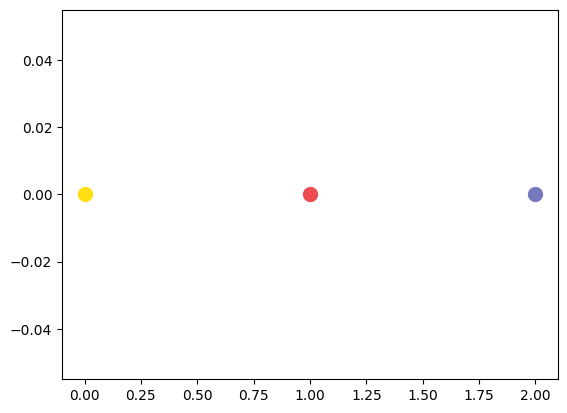

In [ ]:
# plt.scatter([0], [0], c=col_inhib_0, label='Inhibitory 1', s=100)
# plt.scatter([1], [0], c=col_inhib_1, label='Inhibitory 2', s=100)
# plt.scatter([2], [0], c=col_inhib_2, label='Inhibitory 3', s=100)

In [53]:
cols_excit_ex = np.unique(cols_excit)
cols_excit_ex = cols_excit_ex[cols_excit_ex != 'gray']
cols_excit_ex = sorted(cols_excit_ex, key=hex_to_hsv)
(col_excit_0, col_excit_1, col_excit_2) = (cols_excit_ex[0], cols_excit_ex[len(cols_excit_ex)//2], cols_excit_ex[-1])

# fig, ax = plt.subplots(1, 2, figsize=(20, 15))

# for i, col in enumerate(cols_excit_ex):
#     ax[0].scatter([0], [i], c=col, label=f'Excitatory {i+1}', s=100)
# ax[1].scatter([0], [0], c=col_excit_0, label='Excitatory 1', s=100)
# ax[1].scatter([0], [1], c=col_excit_1, label='Excitatory 2', s=100)
# ax[1].scatter([0], [2], c=col_excit_2, label='Excitatory 3', s=100)


In [54]:

cols_non_neural_ex = np.unique(cols_non_neural)
cols_non_neural_ex = cols_non_neural_ex[cols_non_neural_ex != 'gray']
cols_non_neural_ex = sorted(cols_non_neural_ex, key=hex_to_hsv)
cols_non_neural_ex = cols_non_neural_ex[:-3]
(col_non_neural_0, col_non_neural_1) = (cols_non_neural_ex[0], cols_non_neural_ex[-1])

# fig, ax = plt.subplots(1, 2, figsize=(20, 15))
# for i, col in enumerate(cols_non_neural_ex):
#     ax[0].scatter([0], [i], c=col, label=f'Non-neural {i+1}', s=100)
# ax[1].scatter([0], [0], c=col_non_neural_0, label='Non-neural 1', s=100)
# ax[1].scatter([0], [1], c=col_non_neural_1, label='Non-neural 2', s=100)

/tmp/ipykernel_1268233/2101399670.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(tsne_emb[:, 0], tsne_emb[:, 1], c=cols_excit, alpha=0.5, s=1.0, cmap="tab10", edgecolor="none")


(np.float64(-103.97551288361882),
 np.float64(104.90877131463877),
 np.float64(-106.2694345824091),
 np.float64(96.65301257571828))

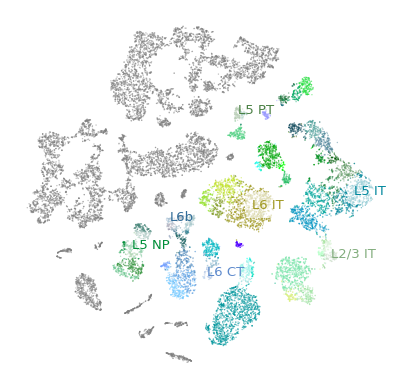

In [55]:
# t-sne centroids excitatory (reference art of tsne paper)
fig, ax =plt.subplots()
ax.scatter(tsne_emb[:, 0], tsne_emb[:, 1], c=cols_excit, alpha=0.5, s=1.0, cmap="tab10", edgecolor="none")

label_centroids = {}
for label in np.unique(tasic_ttypes):
    mask = tasic_ttypes == label
    centroid = tsne_emb[mask].mean(axis=0)
    label_centroids[label] = centroid
    # plt.text(centroid[0], centroid[1], label, fontsize=12, fontweight='bold',
    #         ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))

classes = {#'Lamp5': [-35, -12, 'Lamp5 Lsp1'],
           #'Vip':   [15, 30, 'Vip Rspo4 Rxfp1 Chat'],
           #'Pvalb': [-4, 32, 'Pvalb Reln Tac1'],
           #'Sst':   [-32, 18, 'Sst Myh8 Fibin'],
           'L2/3 IT': [-30, -30, 'L2/3 IT ALM Sla'],
           'L5 IT': [-10, -25, 'L5 IT ALM Tnc'],
           'L6 IT': [6, -4, 'L6 IT VISp Penk Col27a1'],
           'L5 PT': [23,-25, 'L5 PT ALM Hpgd'],
           'L5 NP': [-23, -40, 'L5 NP VISp Trhr Cpne7'],
           'L6 CT': [30,12, 'L6 CT VISp Nxph2 Wls'],
           'L6b':   [35,-11, 'L6b P2ry12'],
           #'Non-neurons': [20,-20, 'Astro Aqp4']
           } 

labels_long = [elem[2] for elem in classes.values()]
idx_labels = [np.where(tasic_ttypes == name)[0][0] for name in labels_long]
colors_labels = tasic_colors[idx_labels]


for i, (class_name, class_info) in enumerate(classes.items()):
    label_key = class_info[2]  # Extract the cluster name
    if label_key in label_centroids:  # Ensure the key exists in label_centroids
        centroid = label_centroids[label_key]
        ax.text(centroid[0], centroid[1], class_name, fontsize=9.5, c=colors_labels[i], bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.5'))


ax.set_aspect("equal")
ax.axis("off")
# plot_embed(tsne_emb, tsne_eval, cols_excit, show_eval=False)

In [56]:
from matplotlib.colors import to_rgb
from matplotlib.colors import to_hex

centroids = {}
mean_colors = {}

for kw in excitatory_keywords:
    # Find indices where the keyword appears in the cell type
    mask = np.array([kw in label for label in tasic_ttypes])
    
    if np.any(mask):  # skip if no cells for this keyword
        # Compute centroid as mean of the embeddings for this group
        centroid = tsne_emb[mask].mean(axis=0)
        centroids[kw] = centroid

        rgb_colors = np.array([to_rgb(c) for c in np.array(tasic_colors)[mask]])
        mean_rgb = rgb_colors.mean(axis=0)
        mean_colors[kw] = mean_rgb

mean_colors_hex = {kw: to_hex(mean_colors[kw]) for kw in mean_colors}

# fig, ax = plt.subplots()
# ax.scatter(tsne_emb[:, 0], tsne_emb[:, 1], c=cols_excit, alpha=0.5, s=1.0, cmap="tab10", edgecolor="none")

# # Plot centroids for each keyword
# for kw, centroid in centroids.items():
#     color = mean_colors_hex[kw]
#     ax.scatter(centroid[0], centroid[1], c=color, marker='x', s=100, label=kw)
#     ax.text(centroid[0] + 0.01, centroid[1] + 0.01, kw, fontsize=9, ha='left', va='bottom', c=color)

# ax.set_aspect("equal")
# ax.axis("off")

/tmp/ipykernel_1268233/188705447.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(dreams_o_excit[:, 0], dreams_o_excit[:, 1], c=cols_o_excit, alpha=0.5, s=1.0, cmap="tab10", edgecolor="none")


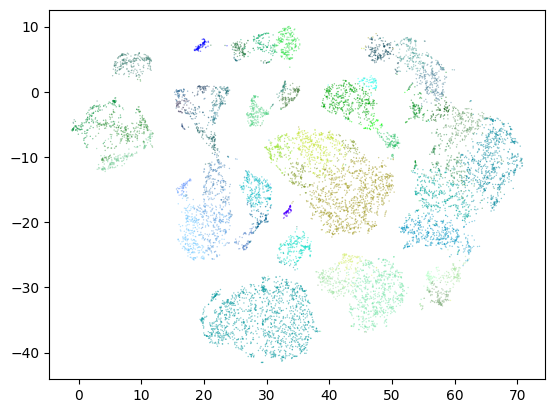

In [57]:
from matplotlib.colors import to_rgb
from matplotlib.colors import to_hex

centroids_o_ex = {}
mean_colors_o_ex = {}

for kw in excitatory_keywords:
    # Find indices where the keyword appears in the cell type
    mask = np.array([kw in label for label in types_o_excit])
    
    if np.any(mask):  # skip if no cells for this keyword
        # Compute centroid as mean of the embeddings for this group
        centroid = dreams_o_excit[mask].mean(axis=0)
        centroids_o_ex[kw] = centroid

        rgb_colors = np.array([to_rgb(c) for c in np.array(cols_o_excit)[mask]])
        mean_rgb = rgb_colors.mean(axis=0)
        mean_colors_o_ex[kw] = mean_rgb

mean_colors_hex = {kw: to_hex(mean_colors_o_ex[kw]) for kw in mean_colors_o_ex}

fig, ax = plt.subplots()
ax.scatter(dreams_o_excit[:, 0], dreams_o_excit[:, 1], c=cols_o_excit, alpha=0.5, s=1.0, cmap="tab10", edgecolor="none")

# # Plot centroids for each keyword
# for kw, centroid in centroids_o_ex.items():
#     color = mean_colors_hex[kw]
#     ax.scatter(centroid[0], centroid[1], c=color, marker='x', s=100, label=kw)
#     ax.text(centroid[0] + 0.01, centroid[1] + 0.01, kw, fontsize=9, ha='left', va='bottom', c=color)

# ax.set_aspect("equal")
# ax.axis("off")

/tmp/ipykernel_1268233/846781618.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(dreams_o_excit[:, 0], dreams_o_excit[:, 1], c=cols_o_excit, alpha=0.5, s=3.5, cmap="tab10", edgecolor="none")


(np.float64(-4.759391513490213),
 np.float64(74.42976924257772),
 np.float64(-44.08746396221086),
 np.float64(12.60271578797099))

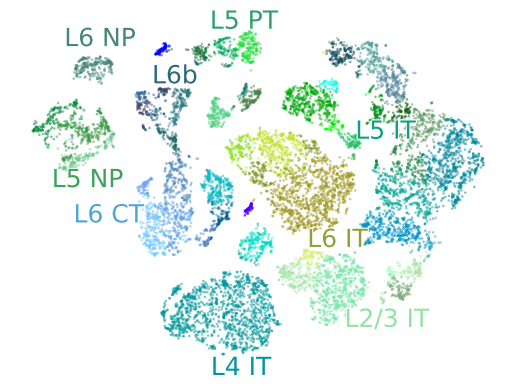

In [58]:
import matplotlib.patheffects as path_effects
path_effects = [
        path_effects.Stroke(linewidth=1.5, foreground='white'),
        path_effects.Normal()
    ]

fig, ax = plt.subplots()
ax.scatter(dreams_o_excit[:, 0], dreams_o_excit[:, 1], c=cols_o_excit, alpha=0.5, s=3.5, cmap="tab10", edgecolor="none")

# Plot centroids for each keyword
font = 18
c1 = centroids_o_ex['L2/3 IT']
ax.text(c1[0], c1[1]-8, 'L2/3 IT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L2/3 IT'], path_effects=path_effects)
c2 = centroids_o_ex['L4 IT']
ax.text(c2[0]-2, c2[1]-11, 'L4 IT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L4 IT'], path_effects=path_effects)
c3 = centroids_o_ex['L5 IT']
ax.text(c3[0]-5 , c3[1]+2.5, 'L5 IT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L5 IT'], path_effects=path_effects)
c4 = centroids_o_ex['L5 NP']
ax.text(c4[0] -4, c4[1] - 9.25, 'L5 NP', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L5 NP'], path_effects=path_effects)
c5 = centroids_o_ex['L5 PT']
ax.text(c5[0]-2.2, c5[1]+6.2, 'L5 PT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L5 PT'], path_effects=path_effects)
c6 = centroids_o_ex['L6 IT']
ax.text(c6[0] + 0.4, c6[1] - 15, 'L6 IT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L6 IT'], path_effects=path_effects)
c7 = centroids_o_ex['L6 CT']
ax.text(c7[0] - 17.5, c7[1]-3, 'L6 CT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L6 CT'], path_effects=path_effects)
c8 = centroids_o_ex['L6 NP']
ax.text(c8[0] - 4.5, c8[1] + 2.7, 'L6 NP', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L6 NP'], path_effects=path_effects)
c9 = centroids_o_ex['L6b']
ax.text(c9[0]-2, c9[1] + 3.7, 'L6b', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L6b'], path_effects=path_effects)

ax.set_aspect("equal")
ax.axis("off")

# save the figure
# fig.savefig('/gpfs01/berens/user/nkury/tsne_pca/openTSNE/dreams_excitatory.svg', bbox_inches='tight', dpi=300)

In [59]:
centroids

{'L2/3 IT': array([ 56.83056193, -47.85376836]),
 'L4 IT': array([ 18.35264087, -70.97744591]),
 'L5 IT': array([62.66889293, -2.35880086]),
 'L5 NP': array([-38.03303788, -41.860518  ]),
 'L5 PT': array([38.98215204, 42.86149055]),
 'L6 IT': array([27.96435911, -3.31678938]),
 'L6 CT': array([ -4.74875369, -46.00396389]),
 'L6 NP': array([-30.94469652, -25.18659752]),
 'L6b': array([-10.23073337, -22.96319443])}

/tmp/ipykernel_1268233/2062434620.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(tsne_emb[:, 0], tsne_emb[:, 1], c=tasic_colors, alpha=0.5, s=1.0, cmap="tab10", edgecolor="none")


(np.float64(-103.97551288361882),
 np.float64(104.90877131463877),
 np.float64(-106.2694345824091),
 np.float64(96.65301257571828))

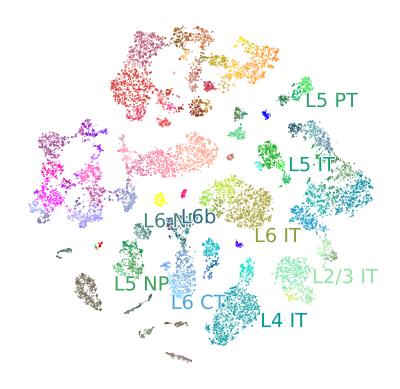

In [59]:
import matplotlib.patheffects as path_effects
path_effects = [
        path_effects.Stroke(linewidth=1.5, foreground='white'),
        path_effects.Normal()
    ]

fig, ax = plt.subplots()
ax.scatter(tsne_emb[:, 0], tsne_emb[:, 1], c=tasic_colors, alpha=0.5, s=1.0, cmap="tab10", edgecolor="none")

# Plot centroids for each keyword
c1 = centroids['L2/3 IT']
ax.text(c1[0] + 5, c1[1]-8, 'L2/3 IT', fontsize=14, ha='left', va='bottom', c=mean_colors_hex['L2/3 IT'], path_effects=path_effects)
c2 = centroids['L4 IT']
ax.text(c2[0] + 15, c2[1]-9, 'L4 IT', fontsize=14, ha='left', va='bottom', c=mean_colors_hex['L4 IT'], path_effects=path_effects)
c3 = centroids['L5 IT']
ax.text(c3[0]-14 , c3[1]+8, 'L5 IT', fontsize=14, ha='left', va='bottom', c=mean_colors_hex['L5 IT'], path_effects=path_effects)
c4 = centroids['L5 NP']
ax.text(c4[0] -9, c4[1] -18, 'L5 NP', fontsize=14, ha='left', va='bottom', c=mean_colors_hex['L5 NP'], path_effects=path_effects)
c5 = centroids['L5 PT']
ax.text(c5[0] + 19, c5[1]-2, 'L5 PT', fontsize=14, ha='left', va='bottom', c=mean_colors_hex['L5 PT'], path_effects=path_effects)
c6 = centroids['L6 IT']
ax.text(c6[0] + 2, c6[1] - 30, 'L6 IT', fontsize=14, ha='left', va='bottom', c=mean_colors_hex['L6 IT'], path_effects=path_effects)
c7 = centroids['L6 CT']
ax.text(c7[0] - 11, c7[1] -24, 'L6 CT', fontsize=14, ha='left', va='bottom', c=mean_colors_hex['L6 CT'], path_effects=path_effects)
c8 = centroids['L6 NP']
ax.text(c8[0], c8[1], 'L6 NP', fontsize=14, ha='left', va='bottom', c=mean_colors_hex['L6 NP'], path_effects=path_effects)
c9 = centroids['L6b']
ax.text(c9[0], c9[1], 'L6b', fontsize=14, ha='left', va='bottom', c=mean_colors_hex['L6b'], path_effects=path_effects)

ax.set_aspect("equal")
ax.axis("off")

# save the figure
#fig.savefig('/gpfs01/berens/user/nkury/tsne_pca/openTSNE/tsne_excitatory.svg', bbox_inches='tight', dpi=300)

In [81]:
np.shape(tasic_pca2_scaled)

(23822, 2)

In [116]:
print(dreams_emb[:,0].min(), dreams_emb[:,0].max())
print(dreams_emb[:,1].min(), dreams_emb[:,1].max())

-115.34620269515385 70.83026193548372
-115.50525621024772 55.39452300125305


In [88]:
def get_display_coords(ax, data_coords):
    return ax.transData.transform(data_coords)

def get_figure_coords(fig, ax, data_coords):
    disp_coords = get_display_coords(ax, data_coords)
    return fig.transFigure.inverted().transform(disp_coords)

/tmp/ipykernel_1268233/3842315814.py:228: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[2].scatter(dreams_o_excit[:, 0], dreams_o_excit[:, 1], c=cols_o_excit, alpha=0.5, s=3.5, cmap="tab10", edgecolor="none")
/tmp/ipykernel_1268233/3842315814.py:285: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[3].scatter(tsne_emb[:, 0], tsne_emb[:, 1], c=tasic_colors, alpha=0.5, s=1.0, cmap="tab10", edgecolor="none")


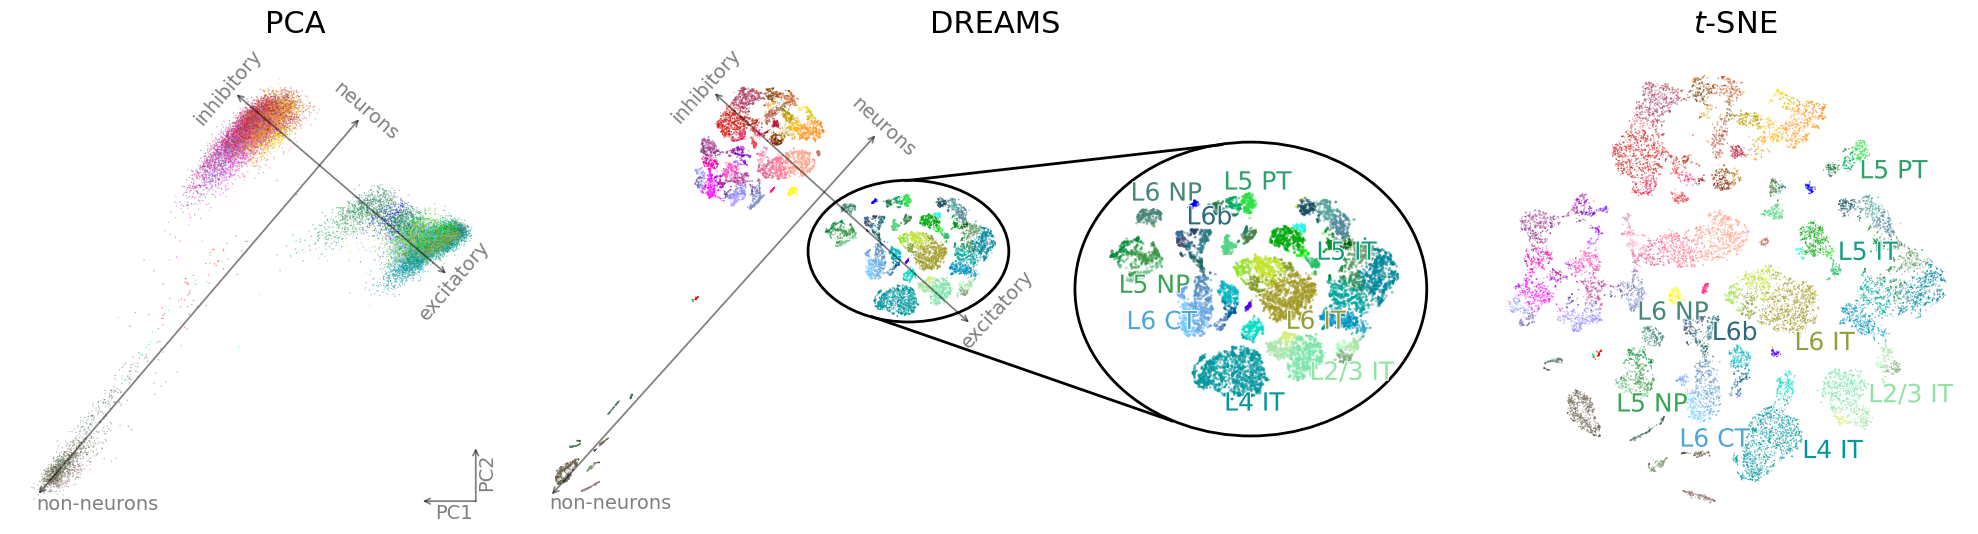

In [170]:
import math
from matplotlib.patches import Ellipse
from matplotlib.lines import Line2D

fig, ax = plt.subplots(1,4, figsize=(20, 5), gridspec_kw={'width_ratios': [1, 1, 0.8, 1]})

# axis
linewidth = 1.25
alpha = 0.5
textfont= 14

# PCA
plot_embed(tasic_pca2_scaled, tasic_pca2_scaled_eval, tasic_colors, show_eval=False, ax=ax[0])

# PC1-PC2 axis
ax[0].annotate('', xy=(1.4, -2.3), xytext=(1.4, -2.8), 
               arrowprops=dict(arrowstyle='->', color='black', alpha=alpha, linewidth=linewidth, shrinkA=0, shrinkB=0,  # disables shortening at both ends
        connectionstyle="arc3,rad=0"))
ax[0].annotate('', xy=(0.9, -2.8), xytext=(1.4, -2.8), 
               arrowprops=dict(arrowstyle='->', color='black', alpha=alpha, linewidth=linewidth, shrinkA=0, shrinkB=0,  # disables shortening at both ends
        connectionstyle="arc3,rad=0"  # straight arrow
))
ax[0].text(1.19, -2.825, "PC1", va='top', ha='center', fontsize=textfont, alpha=alpha)
ax[0].text(1.5, -2.35, "PC2", va='top', ha='center', rotation=90, fontsize=textfont, alpha=alpha)

# exc.-inh. & neurons-non neurons axis
start = (0.3, 0.8)
end = (-2.72, -2.73)
ax[0].annotate('', xy=end, xytext=start, 
               arrowprops=dict(arrowstyle='<->', color='black', alpha=alpha, linewidth=linewidth, 
               shrinkA=0, shrinkB=0, connectionstyle="arc3,rad=0"))
# Compute orthogonal vector
dx = end[0] - start[0]
dy = end[1] - start[1]
orth_dx, orth_dy = -dy, dx

length = 2.6
norm = np.sqrt(orth_dx**2 + orth_dy**2)
orth_dx *= length / norm
orth_dy *= length / norm

# Midpoint of original arrow
mid_x = (start[0] + end[0]) / 2
mid_y = (start[1] + end[1]) / 2

# --- Apply shifts ---
# 1. Vertical shift (up/down)
vec = np.array([dx, dy]) / np.sqrt(dx**2 + dy**2)
vertical_shift = -1.75
mid_x += vertical_shift * vec[0]
mid_y += vertical_shift * vec[1]

# 2. Horizontal shift (left/right)
orth_vec = np.array([orth_dx, orth_dy]) / np.sqrt(orth_dx**2 + orth_dy**2)
horizontal_shift = 0.27
mid_x += horizontal_shift * orth_vec[0]
mid_y += horizontal_shift * orth_vec[1]

# Compute new orthogonal arrow endpoints
new_start = (mid_x - orth_dx/2, mid_y - orth_dy/2)
new_end = (mid_x + orth_dx/2, mid_y + orth_dy/2)

# Draw orthogonal arrow
ax[0].annotate('', xy=new_end, xytext=new_start,
            arrowprops=dict(arrowstyle='<->', color='black', alpha=alpha, linewidth=linewidth,
                            shrinkA=0, shrinkB=0, connectionstyle="arc3,rad=0"))

# add text
# inhibitory-excitatory axis
orth_dx = new_end[0] - new_start[0]
orth_dy = new_end[1] - new_start[1]
angle_ortho = math.degrees(math.atan2(orth_dy, orth_dx))

# Unit vector along orthogonal arrow
orth_vec = np.array([orth_dx, orth_dy]) / np.sqrt(orth_dx**2 + orth_dy**2)

offset = 0.1 

# Move label away from tail (start) backwards along orth_vec
inhib_x = new_start[0] - offset * orth_vec[0]
inhib_y = new_start[1] - offset * orth_vec[1]

# Move label away from tip (end) forward along orth_vec
excite_x = new_end[0] + offset * orth_vec[0]
excite_y = new_end[1] + offset * orth_vec[1]

ax[0].text(inhib_x, inhib_y, "inhibitory", fontsize=textfont, alpha=alpha,
           rotation=angle_ortho + 90, rotation_mode='anchor',
           ha='center', va='center')

ax[0].text(excite_x, excite_y, "excitatory", fontsize=textfont, alpha=alpha,
           rotation=angle_ortho + 90, rotation_mode='anchor',
           ha='center', va='center')

# neurons-non-neurons axis
dx = end[0] - start[0]
dy = end[1] - start[1]

angle = math.degrees(math.atan2(dy, dx))

# Unit vector along the original arrow
vec = np.array([dx, dy]) / np.sqrt(dx**2 + dy**2)
offset= 0.1

neurons_x = (start[0]) - offset * vec[0]
neurons_y = (start[1]) - offset * vec[1]

ax[0].text(neurons_x, neurons_y, "neurons", fontsize=textfont, alpha=alpha,
           rotation=angle+90, rotation_mode='anchor',
           ha='center', va='center')

ax[0].text(end[0]+0.55, end[1]-0.1, "non-neurons", fontsize=textfont, alpha=alpha,
           # rotation=angle+90, rotation_mode='anchor',
           ha='center', va='center')

# DREAMS
plot_embed(dreams_emb, dreams_eval, tasic_colors, show_eval=False, ax=ax[1])

# axis
# arrows
start = (20, 35)
end = (-117, -117)
ax[1].annotate('', xy=end, xytext=start, 
               arrowprops=dict(arrowstyle='<->', color='black', alpha=alpha, linewidth=linewidth, 
               shrinkA=0, shrinkB=0, connectionstyle="arc3,rad=0"))
# Compute orthogonal vector
dx = end[0] - start[0]
dy = end[1] - start[1]
orth_dx, orth_dy = -dy, dx

length = 145
norm = np.sqrt(orth_dx**2 + orth_dy**2)
orth_dx *= length / norm
orth_dy *= length / norm

# Midpoint of original arrow
mid_x = (start[0] + end[0]) / 2
mid_y = (start[1] + end[1]) / 2

# --- Apply shifts ---
# 1. Vertical shift (up/down)
vec = np.array([dx, dy]) / np.sqrt(dx**2 + dy**2)
vertical_shift = -70
mid_x += vertical_shift * vec[0]
mid_y += vertical_shift * vec[1]

# 2. Horizontal shift (left/right)
orth_vec = np.array([orth_dx, orth_dy]) / np.sqrt(orth_dx**2 + orth_dy**2)
horizontal_shift = 10
mid_x += horizontal_shift * orth_vec[0]
mid_y += horizontal_shift * orth_vec[1]

# Compute new orthogonal arrow endpoints
new_start = (mid_x - orth_dx/2, mid_y - orth_dy/2)
new_end = (mid_x + orth_dx/2, mid_y + orth_dy/2)

# Draw orthogonal arrow
ax[1].annotate('', xy=new_end, xytext=new_start,
            arrowprops=dict(arrowstyle='<->', color='black', alpha=alpha, linewidth=linewidth,
                            shrinkA=0, shrinkB=0, connectionstyle="arc3,rad=0"))

# add text
# inhibitory-excitatory axis
orth_dx = new_end[0] - new_start[0]
orth_dy = new_end[1] - new_start[1]
angle_ortho = math.degrees(math.atan2(orth_dy, orth_dx))

# Unit vector along orthogonal arrow
orth_vec = np.array([orth_dx, orth_dy]) / np.sqrt(orth_dx**2 + orth_dy**2)

offset = 5

# Move label away from tail (start) backwards along orth_vec
inhib_x = new_start[0] - offset * orth_vec[0]
inhib_y = new_start[1] - offset * orth_vec[1]

# Move label away from tip (end) forward along orth_vec
excite_x = new_end[0] + offset * orth_vec[0]
excite_y = new_end[1] + offset * orth_vec[1]

ax[1].text(inhib_x, inhib_y, "inhibitory", fontsize=textfont, alpha=alpha,
           rotation=angle_ortho + 90, rotation_mode='anchor',
           ha='center', va='center')

# neurons-non-neurons axis
dx = end[0] - start[0]
dy = end[1] - start[1]

ax[1].text(excite_x - 0.06 * dx, excite_y - 0.06 * dy, "excitatory", fontsize=textfont, alpha=alpha,
           rotation=angle_ortho + 90, rotation_mode='anchor',
           ha='center', va='center')


angle = math.degrees(math.atan2(dy, dx))

# Unit vector along the original arrow
vec = np.array([dx, dy]) / np.sqrt(dx**2 + dy**2)

neurons_x = (start[0]) - offset * vec[0]
neurons_y = (start[1]) - offset * vec[1]

ax[1].text(neurons_x, neurons_y, "neurons", fontsize=textfont, alpha=alpha,
           rotation=angle+90, rotation_mode='anchor',
           ha='center', va='center')

ax[1].text(end[0]+25, end[1]-3.5, "non-neurons", fontsize=textfont, alpha=alpha,
           # rotation=angle+90, rotation_mode='anchor',
           ha='center', va='center')

# ellipse excitatory
l_col = 'black'
l_width = 2
l_alpha = 1.0
center = (34, -14)

ellipse1 = Ellipse(center, 85, 60, angle=0,
                  edgecolor=l_col, facecolor='none', linewidth=l_width, alpha=l_alpha)

ax[1].add_patch(ellipse1)

# Dreams onyl excitatory
import matplotlib.patheffects as path_effects
path_effects = [
        path_effects.Stroke(linewidth=1.5, foreground='white'),
        path_effects.Normal()
    ]

ax[2].scatter(dreams_o_excit[:, 0], dreams_o_excit[:, 1], c=cols_o_excit, alpha=0.5, s=3.5, cmap="tab10", edgecolor="none")

ellipse2 = Ellipse(center, 88, 73.5, angle=0,
                  edgecolor=l_col, facecolor='none', linewidth=l_width, alpha=l_alpha)

ax[2].add_patch(ellipse2)

def data_to_fig_coords(ax, x, y):
    return fig.transFigure.inverted().transform(ax.transData.transform((x, y)))

# Convert both centers to figure coordinates
fig_xy1 = data_to_fig_coords(ax[1], *center)

# Draw the line in figure coordinates
line = Line2D([fig_xy1[0]-0.035, fig_xy1[0]+0.115],
              [fig_xy1[1]-0.116, fig_xy1[1]-0.3245],
              transform=fig.transFigure,
              color=l_col, linewidth=l_width, alpha=l_alpha)
fig.lines.append(line)

line = Line2D([fig_xy1[0]-0.018, fig_xy1[0]+0.14],
              [fig_xy1[1]+0.156, fig_xy1[1]+0.228],
              transform=fig.transFigure,
              color=l_col, linewidth=l_width, alpha=l_alpha)
fig.lines.append(line)

# Plot centroids for each keyword
font = 18
c1 = centroids_o_ex['L2/3 IT']
ax[2].text(c1[0], c1[1]-8, 'L2/3 IT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L2/3 IT'], path_effects=path_effects)
c2 = centroids_o_ex['L4 IT']
ax[2].text(c2[0]-2, c2[1]-11, 'L4 IT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L4 IT'], path_effects=path_effects)
c3 = centroids_o_ex['L5 IT']
ax[2].text(c3[0]-5 , c3[1]+2.5, 'L5 IT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L5 IT'], path_effects=path_effects)
c4 = centroids_o_ex['L5 NP']
ax[2].text(c4[0] -5, c4[1] - 9.8, 'L5 NP', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L5 NP'], path_effects=path_effects)
c5 = centroids_o_ex['L5 PT']
ax[2].text(c5[0]-2.2, c5[1]+6.2, 'L5 PT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L5 PT'], path_effects=path_effects)
c6 = centroids_o_ex['L6 IT']
ax[2].text(c6[0] + 0.4, c6[1] - 15, 'L6 IT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L6 IT'], path_effects=path_effects)
c7 = centroids_o_ex['L6 CT']
ax[2].text(c7[0] - 20, c7[1]-7, 'L6 CT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L6 CT'], path_effects=path_effects)
c8 = centroids_o_ex['L6 NP']
ax[2].text(c8[0] - 4.5, c8[1] + 2.7, 'L6 NP', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L6 NP'], path_effects=path_effects)
c9 = centroids_o_ex['L6b']
ax[2].text(c9[0]-2, c9[1] + 3.7, 'L6b', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L6b'], path_effects=path_effects)

ax[2].set_aspect("equal")
ax[2].axis("off")

# t-SNE
import matplotlib.patheffects as path_effects
path_effects = [
        path_effects.Stroke(linewidth=1.5, foreground='white'),
        path_effects.Normal()
    ]

ax[3].scatter(tsne_emb[:, 0], tsne_emb[:, 1], c=tasic_colors, alpha=0.5, s=1.0, cmap="tab10", edgecolor="none")

font = 18
# Plot centroids for each keyword
c1 = centroids['L2/3 IT']
ax[3].text(c1[0] + 5, c1[1]-8, 'L2/3 IT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L2/3 IT'], path_effects=path_effects)
c2 = centroids['L4 IT']
ax[3].text(c2[0] + 15, c2[1]-9, 'L4 IT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L4 IT'], path_effects=path_effects)
c3 = centroids['L5 IT']
ax[3].text(c3[0]-14 , c3[1]+8, 'L5 IT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L5 IT'], path_effects=path_effects)
c4 = centroids['L5 NP']
ax[3].text(c4[0] -9, c4[1] -18, 'L5 NP', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L5 NP'], path_effects=path_effects)
c5 = centroids['L5 PT']
ax[3].text(c5[0] + 19, c5[1]-2, 'L5 PT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L5 PT'], path_effects=path_effects)
c6 = centroids['L6 IT']
ax[3].text(c6[0] + 2, c6[1] - 30, 'L6 IT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L6 IT'], path_effects=path_effects)
c7 = centroids['L6 CT']
ax[3].text(c7[0] - 15, c7[1] -29, 'L6 CT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L6 CT'], path_effects=path_effects)
c8 = centroids['L6 NP']
ax[3].text(c8[0] - 7, c8[1] + 5, 'L6 NP', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L6 NP'], path_effects=path_effects)
c9 = centroids['L6b']
ax[3].text(c9[0]+4.5, c9[1]-6, 'L6b', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L6b'], path_effects=path_effects)

ax[3].set_aspect("equal")
ax[3].axis("off")

title_font = 22
fig.text(0.15, 1.03, "PCA", fontsize=title_font, ha='center', va='center')
fig.text(0.5, 1.03, "DREAMS", fontsize=title_font, ha='center', va='center')
fig.text(0.87, 1.03, "$t$-SNE", fontsize=title_font, ha='center', va='center')

plt.tight_layout()

# save the figure
fig.savefig('/gpfs01/berens/user/nkury/tsne_pca/openTSNE/figure_1.svg', bbox_inches='tight', dpi=300)

## figure 2

In [49]:
tasic_umap_results = tasic_om_results['umap']
tasic_umap_emb = tasic_umap_results['seed_3']['embedding']
tasic_umap_eval = tasic_umap_results['seed_3']['eval']

tasic_phate_results = tasic_om_results['phate']
tasic_phate_emb = tasic_phate_results['seed_3']['embedding']
tasic_phate_eval = tasic_phate_results['seed_3']['eval']

tasic_starmap_results = tasic_om_results['star_map']
tasic_starmap_emb = tasic_starmap_results['seed_3']['embedding']
tasic_starmap_eval = tasic_starmap_results['seed_3']['eval']

tasic_mds_hybrid_results = tasic_om_results['squad_mds_hybrid']
tasic_mds_hybrid_emb = tasic_mds_hybrid_results['seed_3']['embedding']
tasic_mds_hybrid_eval = tasic_mds_hybrid_results['seed_3']['eval']

In [50]:
tsne_emb = tasic_reg_results['seed_0']['lambda_0.0']['embedding']
tsne_eval = tasic_reg_results['seed_0']['lambda_0.0']['eval']

tasic_dreams_0025 = tasic_reg_results['seed_0']['lambda_0.025']['embedding']
tasic_dreams_0025_eval = tasic_reg_results['seed_0']['lambda_0.025']['eval']

tasic_dreams_005 = tasic_reg_results['seed_0']['lambda_0.05']['embedding']
tasic_dreams_005_eval = tasic_reg_results['seed_0']['lambda_0.05']['eval']

tasic_dreams_0075 = tasic_reg_results['seed_0']['lambda_0.07500000000000001']['embedding']
tasic_dreams_0075_eval = tasic_reg_results['seed_0']['lambda_0.07500000000000001']['eval']

tasic_dreams_01 = tasic_reg_results['seed_0']['lambda_0.1']['embedding']
tasic_dreams_01_eval = tasic_reg_results['seed_0']['lambda_0.1']['eval']

tasic_dreams_02 = tasic_reg_results['seed_0']['lambda_0.2']['embedding']
tasic_dreams_02_eval = tasic_reg_results['seed_0']['lambda_0.2']['eval']

tasic_dreams_05 = tasic_reg_results['seed_0']['lambda_0.5']['embedding']
tasic_dreams_05_eval = tasic_reg_results['seed_0']['lambda_0.5']['eval']

/gpfs01/berens/user/nkury/tsne_pca/plot_embedding.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(*emb.T, c=c, alpha=alpha, s=s, cmap="tab10", edgecolor="none")


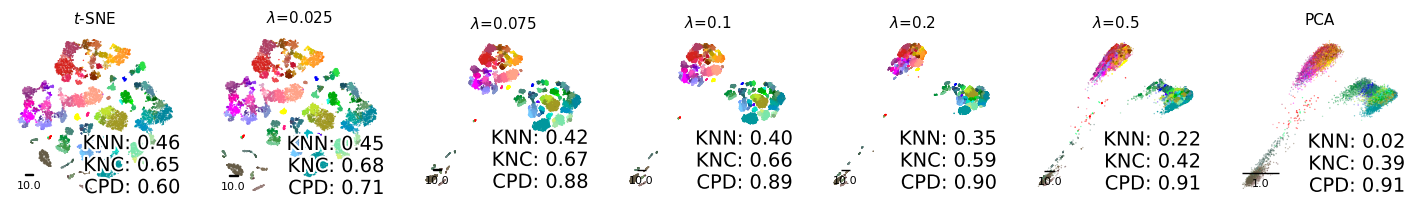

In [25]:
fig, ax = plt.subplots(1, 7, figsize=(18, 12))

plot_embed(tsne_emb, tsne_eval, tasic_colors, ax=ax[0], title='$t$-SNE', add_scale_plot=True, eval_size=14)
plot_embed(tasic_dreams_0025, tasic_dreams_0025_eval, tasic_colors, ax=ax[1], title='$\lambda$=0.025', add_scale_plot=True, eval_size=14)
plot_embed(tasic_dreams_0075, tasic_dreams_0075_eval, tasic_colors, ax=ax[2], title='$\lambda$=0.075', add_scale_plot=True, eval_size=14)
plot_embed(tasic_dreams_01, tasic_dreams_01_eval, tasic_colors, ax=ax[3], title='$\lambda$=0.1', add_scale_plot=True, eval_size=14)
plot_embed(tasic_dreams_02, tasic_dreams_02_eval, tasic_colors, ax=ax[4], title='$\lambda$=0.2', add_scale_plot=True, eval_size=14)
plot_embed(tasic_dreams_05, tasic_dreams_05_eval, tasic_colors, ax=ax[5], title='$\lambda$=0.5', add_scale_plot=True, eval_size=14)
plot_embed(tasic_pca2_scaled, tasic_pca2_scaled_eval, tasic_colors, ax=ax[6], title='PCA', add_scale_plot=True, eval_size=14)

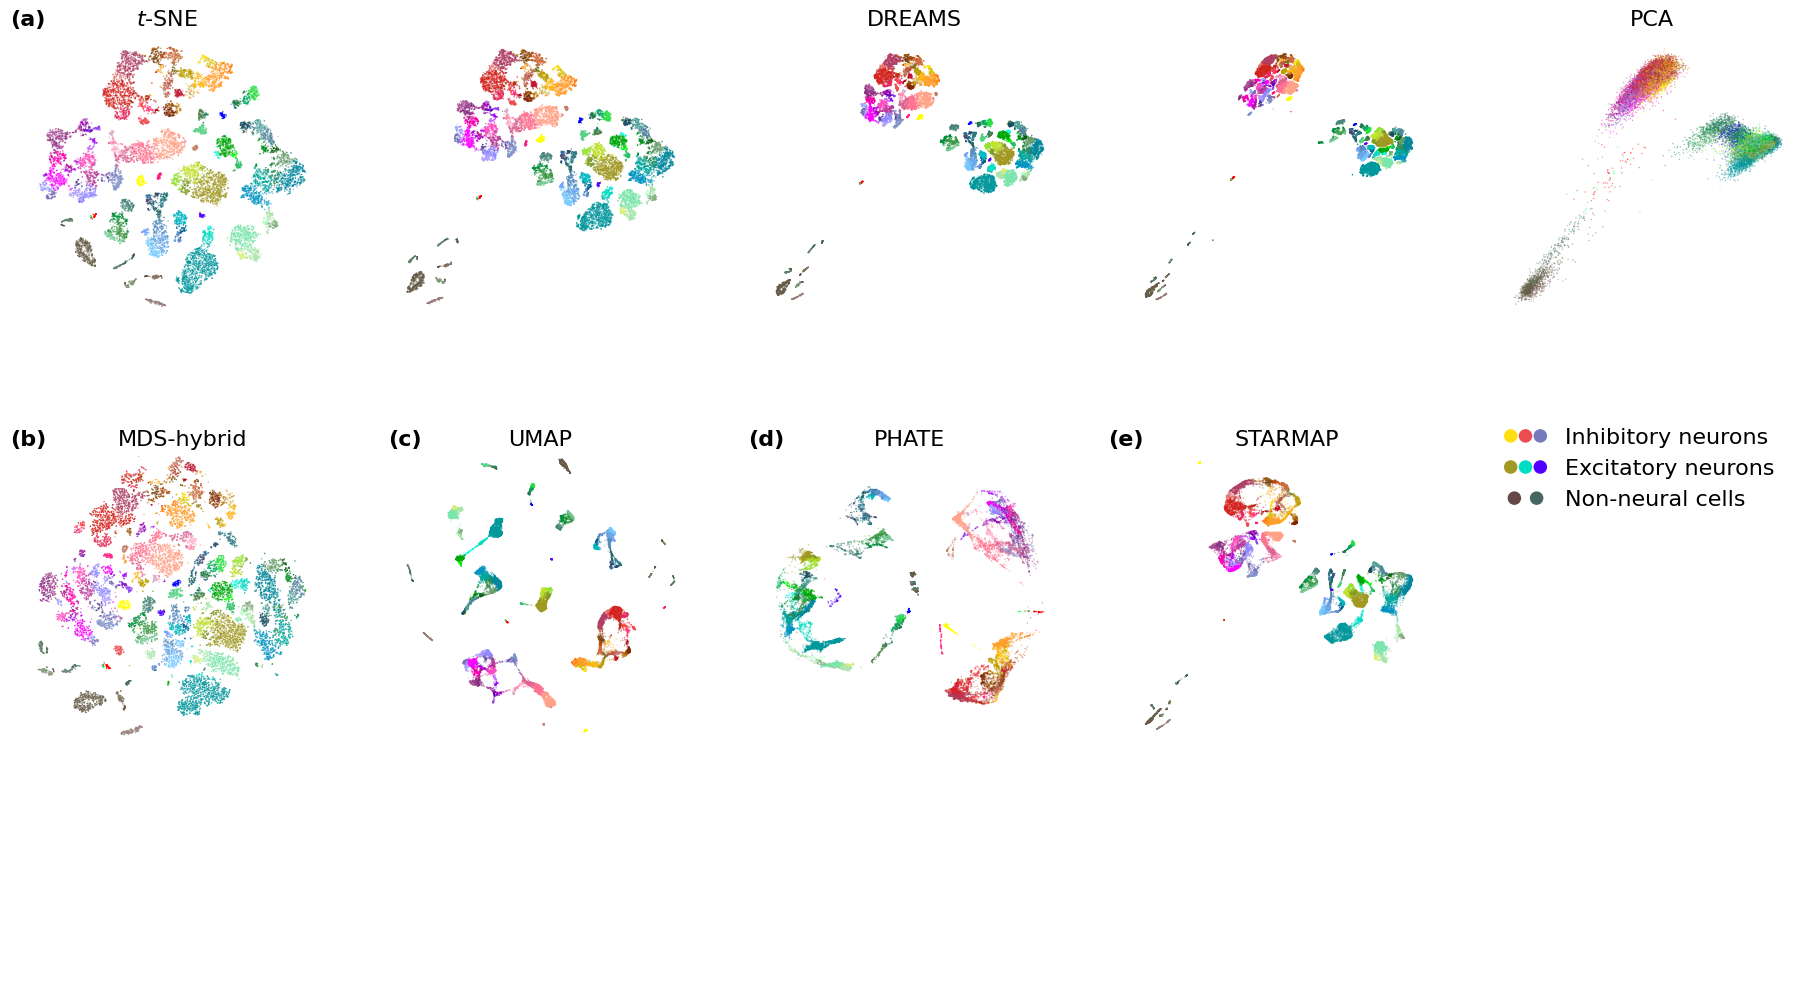

In [80]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(2, 5, figsize=(18, 12))

# ax[0, 0].text(
#     0.0, 1.1, "(a)",  # x, y in axes coordinates
#     transform=ax[0, 0].transAxes,
#     fontsize=16,
#     fontweight='bold',
#     va='top',
#     ha='right'
# )
fig.text(0.0, 0.8, "(a)", fontsize=16, fontweight='bold')
fig.text(0.07, 0.8, '$t$-SNE', fontsize=16)
fig.text(0.476, 0.8, 'DREAMS', fontsize=16)
fig.text(0.9, 0.8, 'PCA', fontsize=16)





eval_size = 14
title_size = 16
plot_embed(tsne_emb, tsne_eval, tasic_colors, ax=ax[0,0], eval_size=eval_size, title_size=title_size, show_eval=False, show_KNC=False)
plot_embed(tasic_dreams_005, tasic_dreams_005_eval, tasic_colors, ax=ax[0,1], eval_size=eval_size, title_size=title_size, show_eval=False, show_KNC=False)
plot_embed(tasic_dreams_01, tasic_dreams_01_eval, tasic_colors, ax=ax[0,2],  eval_size=eval_size, title_size=title_size, show_eval=False, show_KNC=False)
plot_embed(tasic_dreams_02, tasic_dreams_02_eval, tasic_colors, ax=ax[0,3],  eval_size=eval_size, title_size=title_size, show_eval=False, show_KNC=False)
plot_embed(tasic_pca2_scaled, tasic_pca2_scaled_eval, tasic_colors, ax=ax[0,4],  eval_size=eval_size, title_size=title_size, show_eval=False, show_KNC=False)

# second row
from matplotlib.patches import Circle
from matplotlib.legend_handler import HandlerBase

plot_embed(tasic_mds_hybrid_emb, tasic_mds_hybrid_eval, tasic_colors, ax=ax[1,0], show_eval=False, show_KNC=False)
plot_embed(tasic_umap_emb, tasic_umap_eval, tasic_colors, ax=ax[1,1], show_eval=False, show_KNC=False)
plot_embed(tasic_phate_emb, tasic_phate_eval, tasic_colors, ax=ax[1,2], show_eval=False, show_KNC=False)
plot_embed(tasic_starmap_emb, tasic_starmap_eval, tasic_colors, ax=ax[1,3], show_eval=False, show_KNC=False)

group_colors = [
    [col_inhib_0, col_inhib_1, col_inhib_2],
    [col_excit_0, col_excit_1, col_excit_2],
    [col_non_neural_0, col_non_neural_1]
]

ax[1,4].axis('off')


# Labels for each group
legend_labels = ['Inhibitory neurons', 'Excitatory neurons', 'Non-neural cells']

# Create dummy handles
dummy_handles = [plt.Line2D([], [], linestyle='None') for _ in group_colors]

# Custom handler that draws multiple colored circles in one legend entry
class MultiColorCircleHandler(HandlerBase):
    def __init__(self, colors, **kwargs):
        super().__init__(**kwargs)
        self.colors = colors

    def create_artists(self, legend, orig_handle,
                       x0, y0, width, height, fontsize, trans):
        n = len(self.colors)
        radius = height / 2.3
        spacing = width / max(n, 1)
        artists = []
        for i, c in enumerate(self.colors):
            center = (x0 + i * spacing + spacing/2, y0 + height / 2)
            circle = Circle(center, radius=radius, facecolor=c, edgecolor='none', transform=trans)
            artists.append(circle)
        return artists

# Build handler_map with actual color groups
handler_map = {
    dummy_handles[i]: MultiColorCircleHandler(group_colors[i])
    for i in range(len(group_colors))
}

# Add the custom legend
ax[1,4].legend(dummy_handles, legend_labels, handler_map=handler_map, loc='upper right', fontsize=16, frameon=False, bbox_to_anchor=(1, 0.75))

descr = ["(b)", "(c)", "(d)", "(e)"]
positions = [
    (0., 0.45),  # ax[1, 0]
    (0.21, 0.45),  # ax[1, 1]
    (0.41, 0.45),  # ax[1, 2]
    (0.61, 0.45),  # ax[1, 3]
]

for label, (x, y) in zip(descr, positions):
    fig.text(x, y, label, fontsize=16, fontweight="bold")

meth = ["MDS-hybrid", "UMAP", "PHATE", "STARMAP"]
positions = [
    (0.06, 0.45),  # ax[1, 0]
    (0.277, 0.45),  # ax[1, 1]
    (0.48, 0.45),  # ax[1, 2]
    (0.68, 0.45),  # ax[1, 3]
]

for label, (x, y) in zip(meth, positions):
    fig.text(x, y, label, fontsize=16)

plt.subplots_adjust(hspace=-1.0)
plt.tight_layout()

## fig 3

In [54]:
lambdas = []
for lam in tasic_reg_results['seed_0'].keys():
    if lam.startswith('lambda_'):
        lam_value = round(float(lam.split('_')[1]),3)
        lambdas.append(lam_value)

lambdas = sorted(np.array(lambdas))
print(lambdas)

[np.float64(0.0), np.float64(0.025), np.float64(0.05), np.float64(0.075), np.float64(0.1), np.float64(0.125), np.float64(0.15), np.float64(0.175), np.float64(0.2), np.float64(0.225), np.float64(0.25), np.float64(0.275), np.float64(0.3), np.float64(0.325), np.float64(0.35), np.float64(0.375), np.float64(0.4), np.float64(0.425), np.float64(0.45), np.float64(0.475), np.float64(0.5), np.float64(0.525), np.float64(0.55), np.float64(0.575), np.float64(0.6), np.float64(0.625), np.float64(0.65), np.float64(0.675), np.float64(0.7), np.float64(0.725), np.float64(0.75), np.float64(0.775), np.float64(0.8), np.float64(0.825), np.float64(0.85), np.float64(0.875), np.float64(0.9), np.float64(0.925), np.float64(0.95), np.float64(0.975), np.float64(1.0)]


/gpfs01/berens/user/nkury/tsne_pca/plot_embedding.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(*emb.T, c=c, alpha=alpha, s=s, cmap="tab10", edgecolor="none")


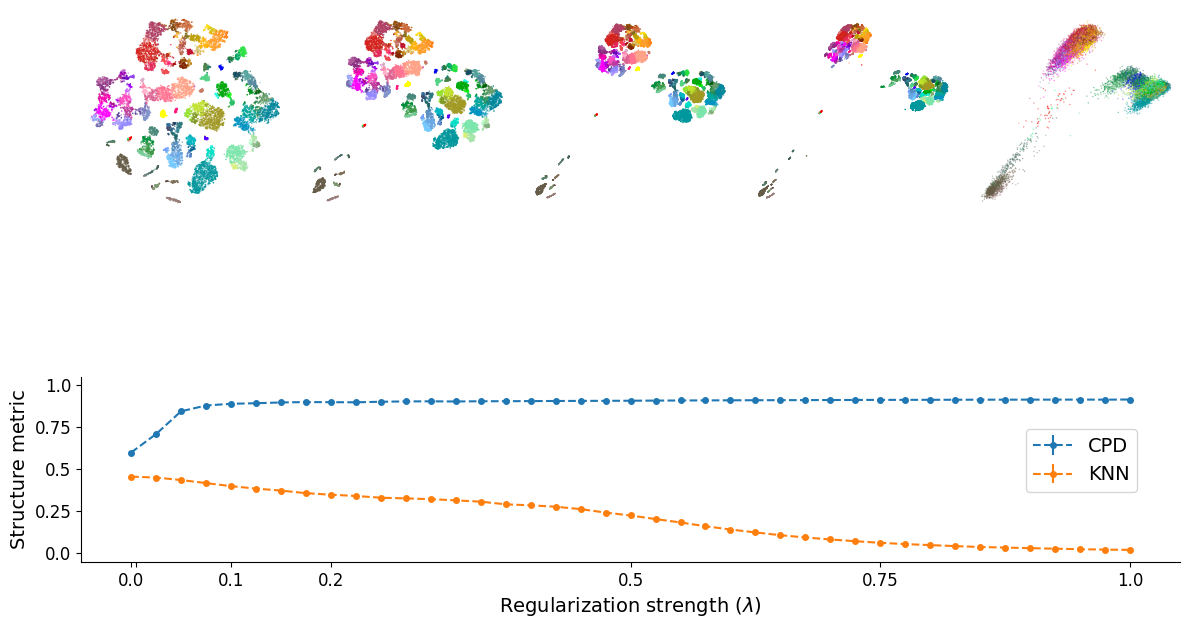

In [156]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12, 10))

gs = gridspec.GridSpec(2, 5, height_ratios=[5, 1])
axes_row1 = [fig.add_subplot(gs[0, i]) for i in range(5)]

# Second row: one subplot spanning all 5 columns
ax_row2 = fig.add_subplot(gs[1, :])

eval_size = 14
title_size = 16
plot_embed(tsne_emb, tsne_eval, tasic_colors, ax=axes_row1[0], eval_size=eval_size, title_size=title_size, show_eval=False)
plot_embed(tasic_dreams_005, tasic_dreams_005_eval, tasic_colors, ax=axes_row1[1], eval_size=eval_size, title_size=title_size, show_eval=False)
plot_embed(tasic_dreams_01, tasic_dreams_01_eval, tasic_colors, ax=axes_row1[2],  eval_size=eval_size, title_size=title_size, show_eval=False)
plot_embed(tasic_dreams_02, tasic_dreams_02_eval, tasic_colors, ax=axes_row1[3],  eval_size=eval_size, title_size=title_size, show_eval=False)
plot_embed(tasic_pca2_scaled, tasic_pca2_scaled_eval, tasic_colors, ax=axes_row1[4],  eval_size=eval_size, title_size=title_size, show_eval=False)

# second row
ax_row2.errorbar(lambdas, tasic_reg_cpd_means, yerr=tasic_reg_cpd_stds, fmt='o--', label='CPD', markersize=4)
ax_row2.errorbar(lambdas, tasic_reg_knn_means, yerr=tasic_reg_knn_stds, fmt='o--', label='KNN', markersize=4)

# log scale for y-axis
# ax_row2.set_xscale('log')
ax_row2.set_xlabel('Regularization strength ($\lambda$)', fontsize=14)
ax_row2.set_ylabel('Structure metric', fontsize=14)
ax_row2.legend(fontsize=14, loc='upper right', bbox_to_anchor=(0.97, 0.77))
ax_row2.spines['top'].set_visible(False)
ax_row2.spines['right'].set_visible(False)

# set x ticks to lambdas
lambdas_show = [0.0, 0.005, 0.1, 0.2, 0.5, 0.75, 1.0]
tick_labels = ['0.0', '', '0.1', '0.2', '0.5', '0.75', '1.0']
ax_row2.set_xticks(lambdas_show)
ax_row2.set_xticklabels(tick_labels, fontsize=12)

y_show = [0.0, 0.25, 0.5, 0.75, 1.0]
y_labels = ['0.0', '0.25', '0.5', '0.75', '1.0']
ax_row2.set_yticks(y_show)
ax_row2.set_yticklabels(y_labels, fontsize=12)
ax_row2.set_ylim(-0.05, 1.05)


plt.tight_layout()

/tmp/ipykernel_4145928/1688598142.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[5].scatter(tasic_reg_knn_means[0], tasic_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
/tmp/ipykernel_4145928/1688598142.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[5].text(tasic_reg_knn_means[0] - 0.006, tasic_reg_cpd_means[0] - 0.055, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)
/tmp/ipykernel_4145928/1688598142.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (con

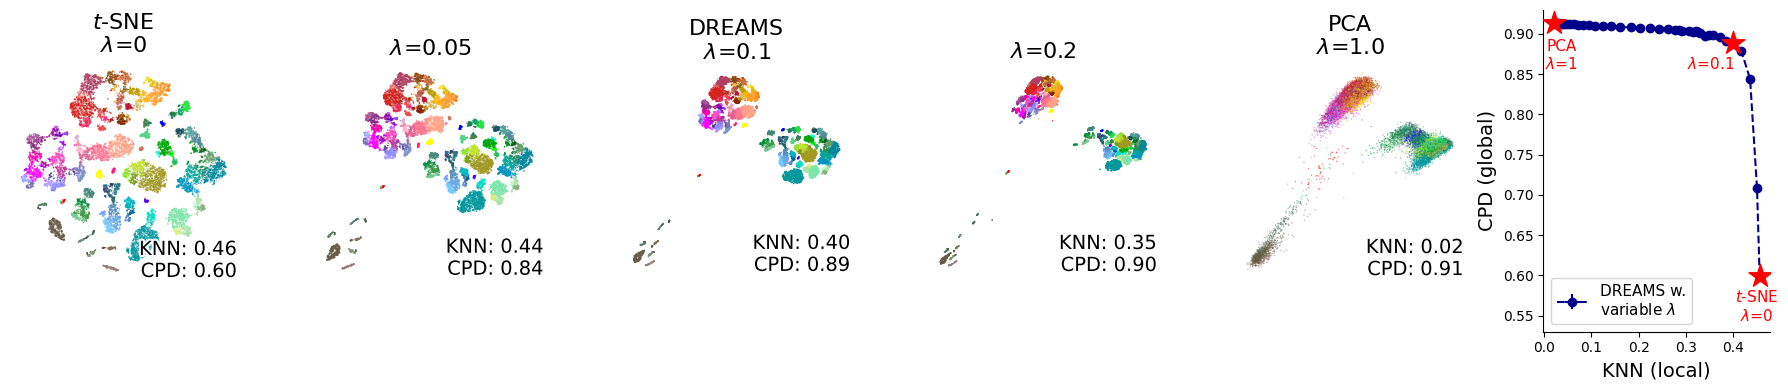

In [36]:
fig, ax = plt.subplots(1, 6, figsize=(18, 4), constrained_layout=True, gridspec_kw={'width_ratios': [1]*6})


eval_size = 14
title_size = 16
show_eval = True
plot_embed(tsne_emb, tsne_eval, tasic_colors, ax=ax[0], eval_size=eval_size, title='$t$-SNE\n$\lambda$=0', title_size=title_size, show_eval=show_eval, show_KNC=False)
plot_embed(tasic_dreams_005, tasic_dreams_005_eval, tasic_colors, ax=ax[1], eval_size=eval_size, title='$\lambda$=0.05', title_size=title_size, show_eval=show_eval, show_KNC=False)
plot_embed(tasic_dreams_01, tasic_dreams_01_eval, tasic_colors, ax=ax[2],  eval_size=eval_size, title='DREAMS\n$\lambda$=0.1', title_size=title_size, show_eval=show_eval, show_KNC=False)
plot_embed(tasic_dreams_02, tasic_dreams_02_eval, tasic_colors, ax=ax[3],  eval_size=eval_size, title='$\lambda$=0.2', title_size=title_size, show_eval=show_eval, show_KNC=False)
plot_embed(tasic_pca2_scaled, tasic_pca2_scaled_eval, tasic_colors, ax=ax[4], title='PCA\n$\lambda$=1.0', eval_size=eval_size, title_size=title_size, show_eval=show_eval, show_KNC=False)

ax[5].errorbar(tasic_reg_knn_means, tasic_reg_cpd_means, xerr=tasic_reg_knn_stds, yerr=tasic_reg_cpd_stds, fmt='o--', c='darkblue', label="DREAMS w.\nvariable $\lambda$", zorder=5)

# PCA
ax[5].scatter(tasic_pca2_scaled_eval[0], tasic_pca2_scaled_eval[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[5].text(tasic_pca2_scaled_eval[0] + 0.017, tasic_pca2_scaled_eval[2] - 0.058, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# t-SNE 
ax[5].scatter(tasic_reg_knn_means[0], tasic_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[5].text(tasic_reg_knn_means[0] - 0.006, tasic_reg_cpd_means[0] - 0.055, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
idx_01 = lambdas.index(0.1)
ax[5].scatter(tasic_reg_knn_means[idx_01], tasic_reg_cpd_means[idx_01], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[5].text(tasic_reg_knn_means[idx_01] - 0.047, tasic_reg_cpd_means[idx_01] - 0.032, "$\lambda$=0.1", ha='center', fontsize=11, c='r', zorder=10)

ax[5].set_xlabel('KNN (local)', fontsize=14)
ax[5].set_ylabel('CPD (global)', fontsize=14)
#ax[5].set_title('Tasic et al.', fontsize=16)

ax[5].legend(fontsize=11, loc='lower left')
ax[5].spines['top'].set_visible(False)
ax[5].spines['right'].set_visible(False)

ax[5].set_ylim(0.53)

plt.tight_layout()


## fig quantative results

/tmp/ipykernel_525663/857007021.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[0].scatter(tasic_reg_knn_means[0], tasic_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
/tmp/ipykernel_525663/857007021.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[0].text(tasic_reg_knn_means[0] - 0.006, tasic_reg_cpd_means[0] - 0.06, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)
/tmp/ipykernel_525663/857007021.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent

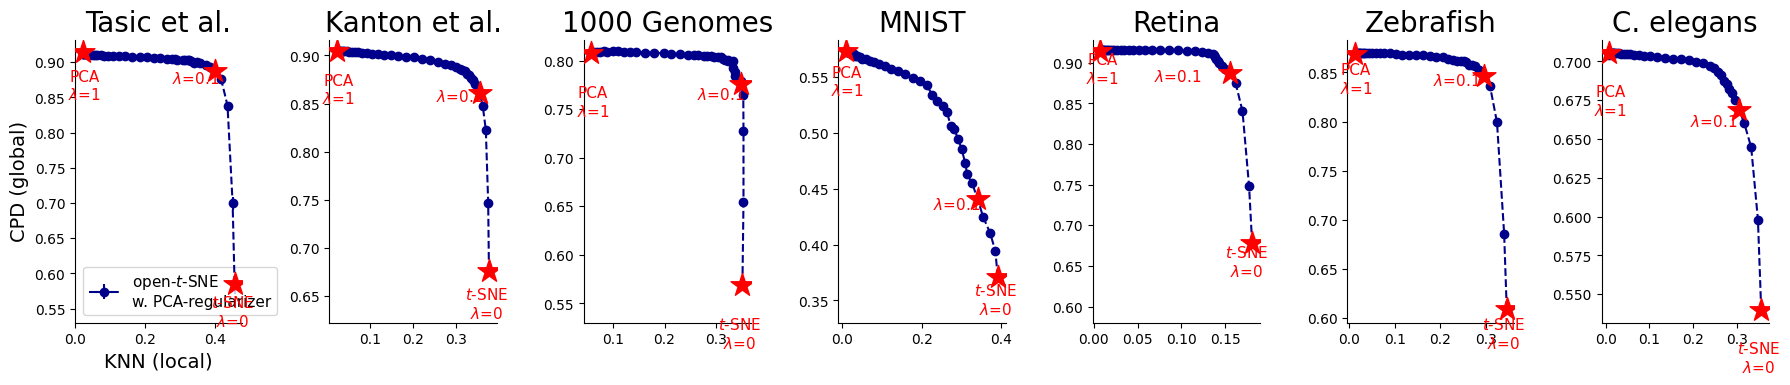

In [58]:
fig, ax = plt.subplots(1, 7, figsize=(18, 4), constrained_layout=True, gridspec_kw={'width_ratios': [1]*7})


# headers
data_names = ["Tasic et al.", "Kanton et al.", "1000 Genomes", "MNIST", "Retina", "Zebrafish", "C. elegans"]

for i, data_name in enumerate(data_names):
    ax[i].set_title(data_name, fontsize=20)

idx_01 = lambdas.index(0.1)

# Tasic

# PCA
ax[0].scatter(tasic_pca2_scaled_eval[0], tasic_pca2_scaled_eval[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0].text(tasic_pca2_scaled_eval[0] + 0.0045, tasic_pca2_scaled_eval[2] - 0.067, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# t-SNE 
ax[0].scatter(tasic_reg_knn_means[0], tasic_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0].text(tasic_reg_knn_means[0] - 0.006, tasic_reg_cpd_means[0] - 0.06, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[0].scatter(tasic_reg_knn_means[idx_01], tasic_reg_cpd_means[idx_01], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0].text(tasic_reg_knn_means[idx_01] - 0.055, tasic_reg_cpd_means[idx_01] - 0.017, f"$\lambda$=0.1", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[0].errorbar(tasic_reg_knn_means, tasic_reg_cpd_means, xerr=tasic_reg_knn_stds, yerr=tasic_reg_cpd_stds, fmt='o--', c='darkblue', label="open-$t$-SNE\nw. PCA-regularizer", zorder=5)

ax[0].set_xlabel('KNN (local)', fontsize=14)
ax[0].set_ylabel('CPD (global)', fontsize=14)

ax[0].legend(fontsize=11, loc='lower left')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[0].set_ylim(0.53)

# Kanton
# PCA
ax[1].scatter(kanton_eval_pca2_scaled[0], kanton_eval_pca2_scaled[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[1].text(kanton_eval_pca2_scaled[0] + 0.003, kanton_eval_pca2_scaled[2] - 0.055, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# t-SNE
ax[1].scatter(kanton_reg_knn_means[0], kanton_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[1].text(kanton_reg_knn_means[0] - 0.006, kanton_reg_cpd_means[0] - 0.049, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[1].scatter(kanton_reg_knn_means[idx_01], kanton_reg_cpd_means[idx_01], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[1].text(kanton_reg_knn_means[idx_01] - 0.048, kanton_reg_cpd_means[idx_01] - 0.008, f"$\lambda$=0.1", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[1].errorbar(kanton_reg_knn_means, kanton_reg_cpd_means, xerr=kanton_reg_knn_stds, yerr=kanton_reg_cpd_stds, fmt='o--', c='darkblue', label="$t$-SNE\nw. PCA-regularizer", zorder=5)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[1].set_ylim(0.622)

# Genome
# PCA
ax[2].scatter(genome_eval_pca2_scaled[0], genome_eval_pca2_scaled[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[2].text(genome_eval_pca2_scaled[0] + 0.0029, genome_eval_pca2_scaled[2] - 0.065, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[2].scatter(genome_reg_knn_means[0], genome_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[2].text(genome_reg_knn_means[0] - 0.006, genome_reg_cpd_means[0] - 0.065, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[2].scatter(genome_reg_knn_means[idx_01], genome_reg_cpd_means[idx_01], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[2].text(genome_reg_knn_means[idx_01] - 0.04, genome_reg_cpd_means[idx_01] - 0.016, f"$\lambda$=0.1", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[2].errorbar(genome_reg_knn_means, genome_reg_cpd_means, xerr=genome_reg_knn_stds, yerr=genome_reg_cpd_stds, fmt='o--', c='darkblue', label="$t$-SNE\nw. PCA-regularizer", zorder=5)

ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)

ax[2].set_ylim(0.53)

# MNIST

# PCA
ax[3].scatter(mnist_eval_pca2_scaled[0], mnist_eval_pca2_scaled[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[3].text(mnist_eval_pca2_scaled[0] + 0.0025, mnist_eval_pca2_scaled[2] - 0.04, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[3].scatter(mnist_reg_knn_means[0], mnist_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[3].text(mnist_reg_knn_means[0] - 0.006, mnist_reg_cpd_means[0] - 0.033, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# # best lambda
ax[3].scatter(mnist_reg_knn_means[idx_01], mnist_reg_cpd_means[idx_01], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[3].text(mnist_reg_knn_means[idx_01] - 0.052, mnist_reg_cpd_means[idx_01] - 0.01, f"$\lambda$=0.1", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[3].errorbar(mnist_reg_knn_means, mnist_reg_cpd_means, xerr=mnist_reg_knn_stds, yerr=mnist_reg_cpd_stds, fmt='o--', c='darkblue', label="InfoNC-$t$-SNE\nw. PCA-regularizer", zorder=5)

ax[3].spines['top'].set_visible(False)
ax[3].spines['right'].set_visible(False)

ax[3].set_ylim(0.33)

# Retina

# PCA
ax[4].scatter(retina_eval_pca2_scaled[0], retina_eval_pca2_scaled[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[4].text(retina_eval_pca2_scaled[0] + 0.0025, retina_eval_pca2_scaled[2] - 0.04, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[4].scatter(retina_reg_knn_means[0], retina_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[4].text(retina_reg_knn_means[0] - 0.006, retina_reg_cpd_means[0] - 0.04, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[4].scatter(retina_reg_knn_means[idx_01], retina_reg_cpd_means[idx_01], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[4].text(retina_reg_knn_means[idx_01] - 0.06, retina_reg_cpd_means[idx_01] - 0.01, f"$\lambda$=0.1", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[4].errorbar(retina_reg_knn_means, retina_reg_cpd_means, xerr=retina_reg_knn_stds, yerr=retina_reg_cpd_stds, fmt='o--', c='darkblue', label="$t$-SNE\nw. PCA-regularizer", zorder=5)
ax[4].spines['top'].set_visible(False)
ax[4].spines['right'].set_visible(False)
ax[4].set_ylim(0.58)

# Zebrafish
# PCA
ax[5].scatter(zfish_eval_pca2_scaled[0], zfish_eval_pca2_scaled[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[5].text(zfish_eval_pca2_scaled[0] + 0.0025, zfish_eval_pca2_scaled[2] - 0.04, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[5].scatter(zfish_reg_knn_means[0], zfish_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[5].text(zfish_reg_knn_means[0] - 0.006, zfish_reg_cpd_means[0] - 0.04, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[5].scatter(zfish_reg_knn_means[idx_01], zfish_reg_cpd_means[idx_01], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[5].text(zfish_reg_knn_means[idx_01] - 0.06, zfish_reg_cpd_means[idx_01] - 0.01, f"$\lambda$=0.1", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[5].errorbar(zfish_reg_knn_means, zfish_reg_cpd_means, xerr=zfish_reg_knn_stds, yerr=zfish_reg_cpd_stds, fmt='o--', c='darkblue', label="$t$-SNE\nw. PCA-regularizer", zorder=5)
ax[5].spines['top'].set_visible(False)
ax[5].spines['right'].set_visible(False)

# C. elegans
# PCA
ax[6].scatter(c_el_pca2_scaled_eval[0], c_el_pca2_scaled_eval[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[6].text(c_el_pca2_scaled_eval[0] + 0.0025, c_el_pca2_scaled_eval[2] - 0.04, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)
# InfoNC-t-SNE
ax[6].scatter(c_el_reg_knn_means[0], c_el_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[6].text(c_el_reg_knn_means[0] - 0.006, c_el_reg_cpd_means[0] - 0.04, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[6].scatter(c_el_reg_knn_means[idx_01], c_el_reg_cpd_means[idx_01], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[6].text(c_el_reg_knn_means[idx_01] - 0.06, c_el_reg_cpd_means[idx_01] - 0.01, f"$\lambda$=0.1", ha='center', fontsize=11, c='r', zorder=10)
# Regularizer
ax[6].errorbar(c_el_reg_knn_means, c_el_reg_cpd_means, xerr=c_el_reg_knn_stds, yerr=c_el_reg_cpd_stds, fmt='o--', c='darkblue', label="$t$-SNE\nw. PCA-regularizer", zorder=5)
ax[6].spines['top'].set_visible(False)
ax[6].spines['right'].set_visible(False)
# ax[6,3].set_ylim(0.58)

plt.tight_layout()


In [52]:
idx_pacmap = tasic_methods_om.index('pacmap')
print(f"Index of 'pacmap': {idx_pacmap}")

Index of 'pacmap': 2


In [47]:
# exclude methods
idx_pacmap = tasic_methods_om.index('pacmap')
idx_trimap = tasic_methods_om.index('trimap')
exclude_methods = [idx_pacmap, idx_trimap]
mask = np.ones(len(tasic_methods_om), dtype=bool)
mask[exclude_methods] = False
methods_om = [m for i, m in enumerate(tasic_methods_om) if mask[i]]
print(methods_om)

tasic_om_knn_means = tasic_om_knn_means[mask]
tasic_om_knn_stds = tasic_om_knn_stds[mask]
tasic_om_cpd_means = tasic_om_cpd_means[mask]
tasic_om_cpd_stds = tasic_om_cpd_stds[mask]

kanton_om_knn_means = kanton_om_knn_means[mask]
kanton_om_knn_stds = kanton_om_knn_stds[mask]
kanton_om_cpd_means = kanton_om_cpd_means[mask]
kanton_om_cpd_stds = kanton_om_cpd_stds[mask]

genome_om_knn_means = genome_om_knn_means[mask]
genome_om_knn_stds = genome_om_knn_stds[mask]
genome_om_cpd_means = genome_om_cpd_means[mask]
genome_om_cpd_stds = genome_om_cpd_stds[mask]

mnist_om_knn_means = mnist_om_knn_means[mask]
mnist_om_knn_stds = mnist_om_knn_stds[mask]
mnist_om_cpd_means = mnist_om_cpd_means[mask]
mnist_om_cpd_stds = mnist_om_cpd_stds[mask]

retina_om_knn_means = retina_om_knn_means[mask]
retina_om_knn_stds = retina_om_knn_stds[mask]
retina_om_cpd_means = retina_om_cpd_means[mask]
retina_om_cpd_stds = retina_om_cpd_stds[mask]

zfish_om_knn_means = zfish_om_knn_means[mask]
zfish_om_knn_stds = zfish_om_knn_stds[mask]
zfish_om_cpd_means = zfish_om_cpd_means[mask]
zfish_om_cpd_stds = zfish_om_cpd_stds[mask]

c_el_om_knn_means = c_el_om_knn_means[mask]
c_el_om_knn_stds = c_el_om_knn_stds[mask]
c_el_om_cpd_means = c_el_om_cpd_means[mask]
c_el_om_cpd_stds = c_el_om_cpd_stds[mask]


['squad_mds', 'squad_mds_hybrid', 'phate', 'star_map', 'umap']


/tmp/ipykernel_3775089/255551244.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[0].errorbar(tasic_reg_knn_means[0], tasic_reg_cpd_means[0], c=col_tsne, markersize=scatter_size, fmt='o')
/tmp/ipykernel_3775089/255551244.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[0].errorbar(tasic_reg_knn_means[idx_01], tasic_reg_cpd_means[idx_01], c=col_dreams, markersize=scatter_size, fmt='o')
/tmp/ipykernel_3775089/255551244.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). T

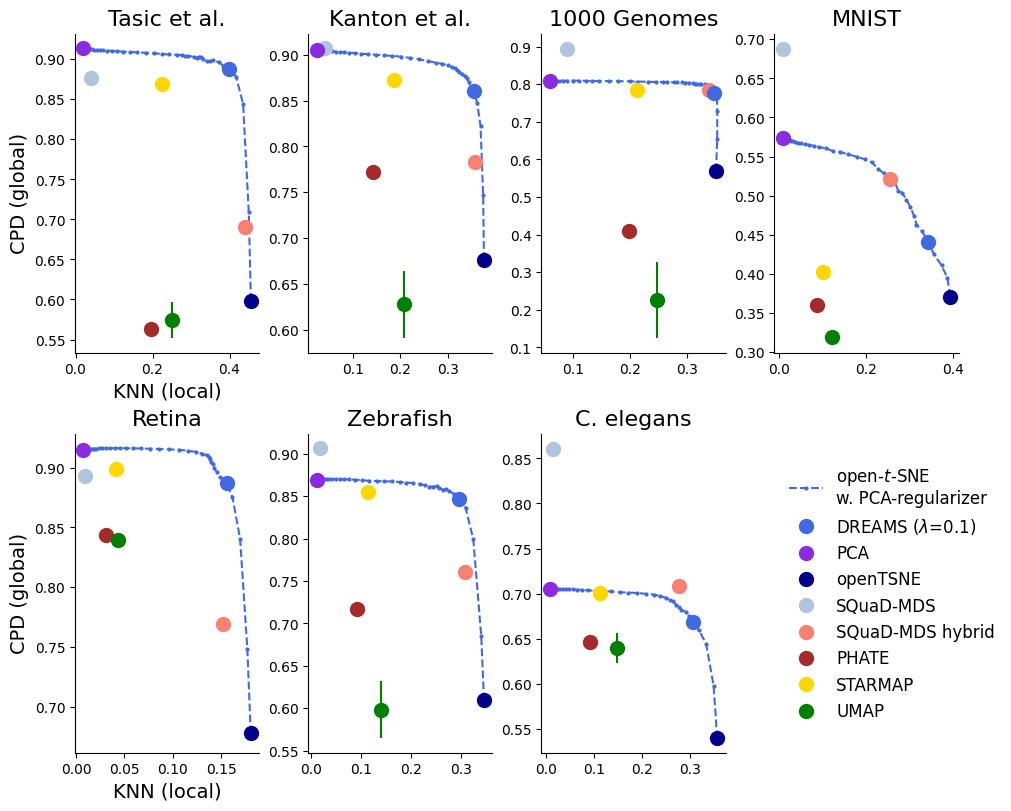

In [71]:
fig, ax = plt.subplots(2, 4, figsize=(10, 8), constrained_layout=True, gridspec_kw={'width_ratios': [2]*4})

marker_size = 2
scatter_size = 10

# Colors
col_errorbar = 'royalblue' #'lightsteelblue'
col_errorbar_mds = 'mediumseagreen'
col_dreams = 'royalblue'
col_pca = 'blueviolet'
col_tsne = 'darkblue'
cols_om = ['lightsteelblue', 'salmon', 'brown', 'gold', 'green']

data_names = ["Tasic et al.", "Kanton et al.", "1000 Genomes", "MNIST", "Retina", "Zebrafish", "C. elegans"]

ax = ax.flatten()

for i, data_name in enumerate(data_names):
    ax[i].set_title(data_name, fontsize=16)
    # ax[i].spines['left'].set_position(('data', 0.0))
    # ax[i].spines['bottom'].set_position(('data', 0.53))


idx_01 = lambdas.index(0.1)

# Tasic
# PCA
ax[0].errorbar(tasic_pca2_scaled_eval[0], tasic_pca2_scaled_eval[2], c=col_pca, markersize=scatter_size, fmt='o')

# t-SNE 
ax[0].errorbar(tasic_reg_knn_means[0], tasic_reg_cpd_means[0], c=col_tsne, markersize=scatter_size, fmt='o')

# best lambda
ax[0].errorbar(tasic_reg_knn_means[idx_01], tasic_reg_cpd_means[idx_01], c=col_dreams, markersize=scatter_size, fmt='o')

# Regularizer
ax[0].errorbar(tasic_reg_knn_means, tasic_reg_cpd_means, xerr=tasic_reg_knn_stds, yerr=tasic_reg_cpd_stds, fmt='o--', c=col_errorbar, label="open-$t$-SNE\nw. PCA-regularizer", zorder=-1, markersize=marker_size)    


for i, method in enumerate(methods_om):
    ax[0].errorbar(tasic_om_knn_means[i], tasic_om_cpd_means[i], xerr=tasic_om_knn_stds[i], yerr=tasic_om_cpd_stds[i], fmt='o', markersize=scatter_size, c=cols_om[i])

ax[0].set_xlabel('KNN (local)', fontsize=14)
ax[0].set_ylabel('CPD (global)', fontsize=14)

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

#ax[0].set_ylim(0.53)

# Kanton
# PCA
ax[1].errorbar(kanton_eval_pca2_scaled[0], kanton_eval_pca2_scaled[2], c=col_pca, markersize=scatter_size, fmt='o', zorder=5)

# t-SNE
ax[1].errorbar(kanton_reg_knn_means[0], kanton_reg_cpd_means[0], c=col_tsne, markersize=scatter_size, fmt='o')

# best lambda
ax[1].errorbar(kanton_reg_knn_means[idx_01], kanton_reg_cpd_means[idx_01], c=col_dreams, markersize=scatter_size, fmt='o')
# Regularizer
ax[1].errorbar(kanton_reg_knn_means, kanton_reg_cpd_means, xerr=kanton_reg_knn_stds, yerr=kanton_reg_cpd_stds, fmt='o--', c=col_errorbar, label="$t$-SNE\nw. PCA-regularizer", zorder=-1, markersize=marker_size)

for i, method in enumerate(methods_om):
    ax[1].errorbar(kanton_om_knn_means[i], kanton_om_cpd_means[i], xerr=kanton_om_knn_stds[i], yerr=kanton_om_cpd_stds[i], fmt='o', markersize=scatter_size, c=cols_om[i])

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
#ax[1].set_ylim(0.622)

# Genome
# PCA
ax[2].errorbar(genome_eval_pca2_scaled[0], genome_eval_pca2_scaled[2], c=col_pca, markersize=scatter_size, fmt='o')

# t-SNE
ax[2].errorbar(genome_reg_knn_means[0], genome_reg_cpd_means[0], c=col_tsne, markersize=scatter_size, fmt='o')
# best lambda
ax[2].errorbar(genome_reg_knn_means[idx_01], genome_reg_cpd_means[idx_01], c=col_dreams, markersize=scatter_size, fmt='o', zorder=10)
# Regularizer
ax[2].errorbar(genome_reg_knn_means, genome_reg_cpd_means, xerr=genome_reg_knn_stds, yerr=genome_reg_cpd_stds, fmt='o--', c=col_errorbar, label="$t$-SNE\nw. PCA-regularizer", zorder=-1, markersize=marker_size)

for i, method in enumerate(methods_om):
    ax[2].errorbar(genome_om_knn_means[i], genome_om_cpd_means[i], xerr=genome_om_knn_stds[i], yerr=genome_om_cpd_stds[i], fmt='o', markersize=scatter_size, c=cols_om[i])

ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
#ax[2].set_ylim(0.53)

# MNIST
# PCA
ax[3].errorbar(mnist_eval_pca2_scaled[0], mnist_eval_pca2_scaled[2], c=col_pca, markersize=scatter_size, fmt='o')
# t-SNE
ax[3].errorbar(mnist_reg_knn_means[0], mnist_reg_cpd_means[0], c=col_tsne, markersize=scatter_size, fmt='o')
# best lambda
ax[3].errorbar(mnist_reg_knn_means[idx_01], mnist_reg_cpd_means[idx_01], c=col_dreams, markersize=scatter_size, fmt='o')
# Regularizer
ax[3].errorbar(mnist_reg_knn_means, mnist_reg_cpd_means, xerr=mnist_reg_knn_stds, yerr=mnist_reg_cpd_stds, fmt='o--', c=col_errorbar, label="InfoNC-$t$-SNE\nw. PCA-regularizer", zorder=-1, markersize=marker_size)

for i, method in enumerate(methods_om):
    ax[3].errorbar(mnist_om_knn_means[i], mnist_om_cpd_means[i], xerr=mnist_om_knn_stds[i], yerr=mnist_om_cpd_stds[i], fmt='o', markersize=scatter_size, c=cols_om[i])

ax[3].spines['top'].set_visible(False)
ax[3].spines['right'].set_visible(False)
#ax[3].set_ylim(0.33)

# Retina
# PCA
ax[4].errorbar(retina_eval_pca2_scaled[0], retina_eval_pca2_scaled[2], c=col_pca, markersize=scatter_size, fmt='o')
# t-SNE
ax[4].errorbar(retina_reg_knn_means[0], retina_reg_cpd_means[0], c=col_tsne, markersize=scatter_size, fmt='o')
# best lambda
ax[4].errorbar(retina_reg_knn_means[idx_01], retina_reg_cpd_means[idx_01], c=col_dreams, markersize=scatter_size, fmt='o')
# Regularizer
ax[4].errorbar(retina_reg_knn_means, retina_reg_cpd_means, xerr=retina_reg_knn_stds, yerr=retina_reg_cpd_stds, fmt='o--', c=col_errorbar, label="$t$-SNE\nw. PCA-regularizer", zorder=-1, markersize=marker_size)
for i, method in enumerate(methods_om):
    ax[4].errorbar(retina_om_knn_means[i], retina_om_cpd_means[i], xerr=retina_om_knn_stds[i], yerr=retina_om_cpd_stds[i], fmt='o', markersize=scatter_size, c=cols_om[i])

ax[4].spines['top'].set_visible(False)
ax[4].spines['right'].set_visible(False)
#ax[4].set_ylim(0.58)
ax[4].set_xlabel('KNN (local)', fontsize=14)
ax[4].set_ylabel('CPD (global)', fontsize=14)

# Zebrafish
# PCA
ax[5].errorbar(zfish_eval_pca2_scaled[0], zfish_eval_pca2_scaled[2], c=col_pca, markersize=scatter_size, fmt='o')
# t-SNE
ax[5].errorbar(zfish_reg_knn_means[0], zfish_reg_cpd_means[0], c=col_tsne, markersize=scatter_size, fmt='o')
# best lambda
ax[5].errorbar(zfish_reg_knn_means[idx_01], zfish_reg_cpd_means[idx_01], c=col_dreams, markersize=scatter_size, fmt='o')
# Regularizer
ax[5].errorbar(zfish_reg_knn_means, zfish_reg_cpd_means, xerr=zfish_reg_knn_stds, yerr=zfish_reg_cpd_stds, fmt='o--', c=col_errorbar, label="$t$-SNE\nw. PCA-regularizer", zorder=-1, markersize=marker_size)

for i, method in enumerate(methods_om):
    ax[5].errorbar(zfish_om_knn_means[i], zfish_om_cpd_means[i], xerr=zfish_om_knn_stds[i], yerr=zfish_om_cpd_stds[i], fmt='o', markersize=scatter_size, c=cols_om[i])

ax[5].spines['top'].set_visible(False)
ax[5].spines['right'].set_visible(False)
#ax[5].set_ylim(0.58)

# C. elegans
# PCA
ax[6].errorbar(c_el_pca2_scaled_eval[0], c_el_pca2_scaled_eval[2], c=col_pca, markersize=scatter_size, fmt='o')
# t-SNE
ax[6].errorbar(c_el_reg_knn_means[0], c_el_reg_cpd_means[0], c=col_tsne, markersize=scatter_size, fmt='o')
# best lambda
ax[6].errorbar(c_el_reg_knn_means[idx_01], c_el_reg_cpd_means[idx_01], c=col_dreams, markersize=scatter_size, fmt='o')
# Regularizer
ax[6].errorbar(c_el_reg_knn_means, c_el_reg_cpd_means, xerr=c_el_reg_knn_stds, yerr=c_el_reg_cpd_stds, fmt='o--', c=col_errorbar, label="$t$-SNE\nw. PCA-regularizer", zorder=-1, markersize=marker_size)

for i, method in enumerate(methods_om):
    ax[6].errorbar(c_el_om_knn_means[i], c_el_om_cpd_means[i], xerr=c_el_om_knn_stds[i], yerr=c_el_om_cpd_stds[i], fmt='o', markersize=scatter_size, c=cols_om[i])

ax[6].spines['top'].set_visible(False)
ax[6].spines['right'].set_visible(False)
#ax[6].set_ylim(0.58)

# Legend
legend_ax = ax[-1]
legend_ax.axis('off')  # Hide ticks and frame

methods = ['SQuaD-MDS', 'SQuaD-MDS hybrid', 'PHATE', 'STARMAP', 'UMAP']
handles = [
    plt.Line2D([0], [0], color=col_errorbar, marker='o', linestyle='--', markersize=marker_size, label='open-$t$-SNE\nw. PCA-regularizer'),
    plt.Line2D([0], [0], color=col_dreams, marker='o', linestyle='None', markersize=scatter_size, label='DREAMS ($\lambda$=0.1)'),
    plt.Line2D([0], [0], color=col_pca, marker='o', linestyle='None', markersize=scatter_size, label='PCA'),
    plt.Line2D([0], [0], color=col_tsne, marker='o', linestyle='None', markersize=scatter_size, label='openTSNE'),
    *[plt.Line2D([0], [0], color=cols_om[i], marker='o', linestyle='None', markersize=scatter_size, label=methods[i]) for i in range(len(methods))]
]
# # Dummy data for errorbar-style handles
# dummy_x = [0]
# dummy_y = [0]
# dummy_err = [0.2]  # arbitrary

# # Create the errorbar-style handle for the regularizer
# umap_handle = ax[0].errorbar(
#     dummy_x, dummy_y, yerr=dummy_err,
#     fmt='o', linestyle='--', color='green', markersize=scatter_size, label='UMAP'
# )
# handles.append(umap_handle)

legend_ax.legend(handles=handles, loc='center left', fontsize=12, frameon=False)




/tmp/ipykernel_3775089/1967002265.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[0].errorbar(tasic_reg_cpd_means[0], tasic_reg_knn_means[0], c=col_tsne, markersize=scatter_size, fmt='o')
/tmp/ipykernel_3775089/1967002265.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[0].errorbar(tasic_reg_cpd_means[idx_01], tasic_reg_knn_means[idx_01], c=col_dreams, markersize=scatter_size, fmt='o')
/tmp/ipykernel_3775089/1967002265.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior)

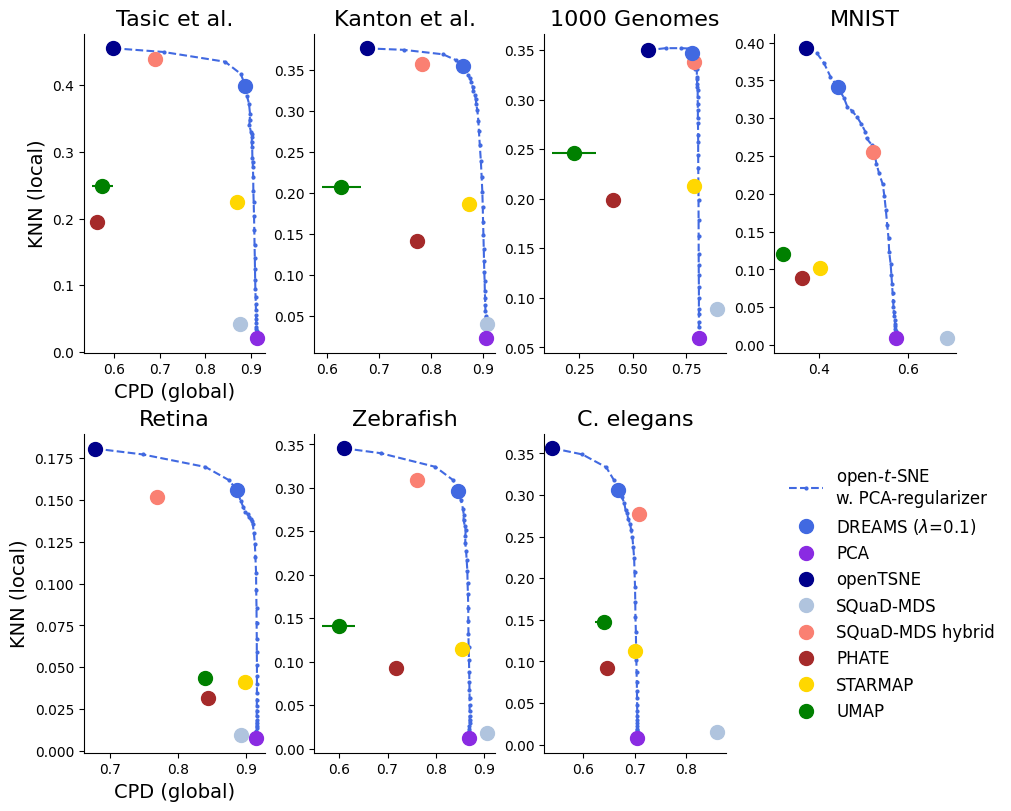

In [72]:
# second try
fig, ax = plt.subplots(2, 4, figsize=(10, 8), constrained_layout=True, gridspec_kw={'width_ratios': [2]*4})

marker_size = 2
scatter_size = 10

# Colors
col_errorbar = 'royalblue'
col_errorbar_mds = 'mediumseagreen'
col_dreams = 'royalblue'
col_pca = 'blueviolet'
col_tsne = 'darkblue'
cols_om = ['lightsteelblue', 'salmon', 'brown', 'gold', 'green']

data_names = ["Tasic et al.", "Kanton et al.", "1000 Genomes", "MNIST", "Retina", "Zebrafish", "C. elegans"]

ax = ax.flatten()

for i, data_name in enumerate(data_names):
    ax[i].set_title(data_name, fontsize=16)

idx_01 = lambdas.index(0.1)

# --- Swapped Axis Code ---

# Tasic
ax[0].errorbar(tasic_pca2_scaled_eval[2], tasic_pca2_scaled_eval[0], c=col_pca, markersize=scatter_size, fmt='o')
ax[0].errorbar(tasic_reg_cpd_means[0], tasic_reg_knn_means[0], c=col_tsne, markersize=scatter_size, fmt='o')
ax[0].errorbar(tasic_reg_cpd_means[idx_01], tasic_reg_knn_means[idx_01], c=col_dreams, markersize=scatter_size, fmt='o')
ax[0].errorbar(tasic_reg_cpd_means, tasic_reg_knn_means, xerr=tasic_reg_cpd_stds, yerr=tasic_reg_knn_stds, fmt='o--', c=col_errorbar, label="open-$t$-SNE\nw. PCA-regularizer", zorder=-1, markersize=marker_size)
for i, method in enumerate(methods_om):
    ax[0].errorbar(tasic_om_cpd_means[i], tasic_om_knn_means[i], xerr=tasic_om_cpd_stds[i], yerr=tasic_om_knn_stds[i], fmt='o', markersize=scatter_size, c=cols_om[i])
ax[0].set_ylabel('KNN (local)', fontsize=14)
ax[0].set_xlabel('CPD (global)', fontsize=14)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

# Kanton
ax[1].errorbar(kanton_eval_pca2_scaled[2], kanton_eval_pca2_scaled[0], c=col_pca, markersize=scatter_size, fmt='o', zorder=5)
ax[1].errorbar(kanton_reg_cpd_means[0], kanton_reg_knn_means[0], c=col_tsne, markersize=scatter_size, fmt='o')
ax[1].errorbar(kanton_reg_cpd_means[idx_01], kanton_reg_knn_means[idx_01], c=col_dreams, markersize=scatter_size, fmt='o')
ax[1].errorbar(kanton_reg_cpd_means, kanton_reg_knn_means, xerr=kanton_reg_cpd_stds, yerr=kanton_reg_knn_stds, fmt='o--', c=col_errorbar, label="$t$-SNE\nw. PCA-regularizer", zorder=-1, markersize=marker_size)
for i, method in enumerate(methods_om):
    ax[1].errorbar(kanton_om_cpd_means[i], kanton_om_knn_means[i], xerr=kanton_om_cpd_stds[i], yerr=kanton_om_knn_stds[i], fmt='o', markersize=scatter_size, c=cols_om[i])
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

# Genome
ax[2].errorbar(genome_eval_pca2_scaled[2], genome_eval_pca2_scaled[0], c=col_pca, markersize=scatter_size, fmt='o')
ax[2].errorbar(genome_reg_cpd_means[0], genome_reg_knn_means[0], c=col_tsne, markersize=scatter_size, fmt='o')
ax[2].errorbar(genome_reg_cpd_means[idx_01], genome_reg_knn_means[idx_01], c=col_dreams, markersize=scatter_size, fmt='o', zorder=10)
ax[2].errorbar(genome_reg_cpd_means, genome_reg_knn_means, xerr=genome_reg_cpd_stds, yerr=genome_reg_knn_stds, fmt='o--', c=col_errorbar, label="$t$-SNE\nw. PCA-regularizer", zorder=-1, markersize=marker_size)
for i, method in enumerate(methods_om):
    ax[2].errorbar(genome_om_cpd_means[i], genome_om_knn_means[i], xerr=genome_om_cpd_stds[i], yerr=genome_om_knn_stds[i], fmt='o', markersize=scatter_size, c=cols_om[i])
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)

# MNIST
ax[3].errorbar(mnist_eval_pca2_scaled[2], mnist_eval_pca2_scaled[0], c=col_pca, markersize=scatter_size, fmt='o')
ax[3].errorbar(mnist_reg_cpd_means[0], mnist_reg_knn_means[0], c=col_tsne, markersize=scatter_size, fmt='o')
ax[3].errorbar(mnist_reg_cpd_means[idx_01], mnist_reg_knn_means[idx_01], c=col_dreams, markersize=scatter_size, fmt='o')
ax[3].errorbar(mnist_reg_cpd_means, mnist_reg_knn_means, xerr=mnist_reg_cpd_stds, yerr=mnist_reg_knn_stds, fmt='o--', c=col_errorbar, label="InfoNC-$t$-SNE\nw. PCA-regularizer", zorder=-1, markersize=marker_size)
for i, method in enumerate(methods_om):
    ax[3].errorbar(mnist_om_cpd_means[i], mnist_om_knn_means[i], xerr=mnist_om_cpd_stds[i], yerr=mnist_om_knn_stds[i], fmt='o', markersize=scatter_size, c=cols_om[i])
ax[3].spines['top'].set_visible(False)
ax[3].spines['right'].set_visible(False)

# Retina
ax[4].errorbar(retina_eval_pca2_scaled[2], retina_eval_pca2_scaled[0], c=col_pca, markersize=scatter_size, fmt='o')
ax[4].errorbar(retina_reg_cpd_means[0], retina_reg_knn_means[0], c=col_tsne, markersize=scatter_size, fmt='o')
ax[4].errorbar(retina_reg_cpd_means[idx_01], retina_reg_knn_means[idx_01], c=col_dreams, markersize=scatter_size, fmt='o')
ax[4].errorbar(retina_reg_cpd_means, retina_reg_knn_means, xerr=retina_reg_cpd_stds, yerr=retina_reg_knn_stds, fmt='o--', c=col_errorbar, label="$t$-SNE\nw. PCA-regularizer", zorder=-1, markersize=marker_size)
for i, method in enumerate(methods_om):
    ax[4].errorbar(retina_om_cpd_means[i], retina_om_knn_means[i], xerr=retina_om_cpd_stds[i], yerr=retina_om_knn_stds[i], fmt='o', markersize=scatter_size, c=cols_om[i])
ax[4].spines['top'].set_visible(False)
ax[4].spines['right'].set_visible(False)
ax[4].set_ylabel('KNN (local)', fontsize=14)
ax[4].set_xlabel('CPD (global)', fontsize=14)

# Zebrafish
ax[5].errorbar(zfish_eval_pca2_scaled[2], zfish_eval_pca2_scaled[0], c=col_pca, markersize=scatter_size, fmt='o')
ax[5].errorbar(zfish_reg_cpd_means[0], zfish_reg_knn_means[0], c=col_tsne, markersize=scatter_size, fmt='o')
ax[5].errorbar(zfish_reg_cpd_means[idx_01], zfish_reg_knn_means[idx_01], c=col_dreams, markersize=scatter_size, fmt='o')
ax[5].errorbar(zfish_reg_cpd_means, zfish_reg_knn_means, xerr=zfish_reg_cpd_stds, yerr=zfish_reg_knn_stds, fmt='o--', c=col_errorbar, label="$t$-SNE\nw. PCA-regularizer", zorder=-1, markersize=marker_size)
for i, method in enumerate(methods_om):
    ax[5].errorbar(zfish_om_cpd_means[i], zfish_om_knn_means[i], xerr=zfish_om_cpd_stds[i], yerr=zfish_om_knn_stds[i], fmt='o', markersize=scatter_size, c=cols_om[i])
ax[5].spines['top'].set_visible(False)
ax[5].spines['right'].set_visible(False)

# C. elegans
ax[6].errorbar(c_el_pca2_scaled_eval[2], c_el_pca2_scaled_eval[0], c=col_pca, markersize=scatter_size, fmt='o')
ax[6].errorbar(c_el_reg_cpd_means[0], c_el_reg_knn_means[0], c=col_tsne, markersize=scatter_size, fmt='o')
ax[6].errorbar(c_el_reg_cpd_means[idx_01], c_el_reg_knn_means[idx_01], c=col_dreams, markersize=scatter_size, fmt='o')
ax[6].errorbar(c_el_reg_cpd_means, c_el_reg_knn_means, xerr=c_el_reg_cpd_stds, yerr=c_el_reg_knn_stds, fmt='o--', c=col_errorbar, label="$t$-SNE\nw. PCA-regularizer", zorder=-1, markersize=marker_size)
for i, method in enumerate(methods_om):
    ax[6].errorbar(c_el_om_cpd_means[i], c_el_om_knn_means[i], xerr=c_el_om_cpd_stds[i], yerr=c_el_om_knn_stds[i], fmt='o', markersize=scatter_size, c=cols_om[i])
ax[6].spines['top'].set_visible(False)
ax[6].spines['right'].set_visible(False)

# Legend
legend_ax = ax[-1]
legend_ax.axis('off')
methods = ['SQuaD-MDS', 'SQuaD-MDS hybrid', 'PHATE', 'STARMAP', 'UMAP']
handles = [
    plt.Line2D([0], [0], color=col_errorbar, marker='o', linestyle='--', markersize=marker_size, label='open-$t$-SNE\nw. PCA-regularizer'),
    plt.Line2D([0], [0], color=col_dreams, marker='o', linestyle='None', markersize=scatter_size, label='DREAMS ($\lambda$=0.1)'),
    plt.Line2D([0], [0], color=col_pca, marker='o', linestyle='None', markersize=scatter_size, label='PCA'),
    plt.Line2D([0], [0], color=col_tsne, marker='o', linestyle='None', markersize=scatter_size, label='openTSNE'),
    *[plt.Line2D([0], [0], color=cols_om[i], marker='o', linestyle='None', markersize=scatter_size, label=methods[i]) for i in range(len(methods))]
]
legend_ax.legend(handles=handles, loc='center left', fontsize=12, frameon=False)


/tmp/ipykernel_3775089/2517061253.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a.errorbar(d['reg_cpd'][0], d['reg_knn'][0], c=col_tsne, markersize=scatter_size, fmt='o')
/tmp/ipykernel_3775089/2517061253.py:82: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a.errorbar(d['reg_cpd'][idx_01], d['reg_knn'][idx_01], c=col_dreams, markersize=scatter_size, fmt='o')


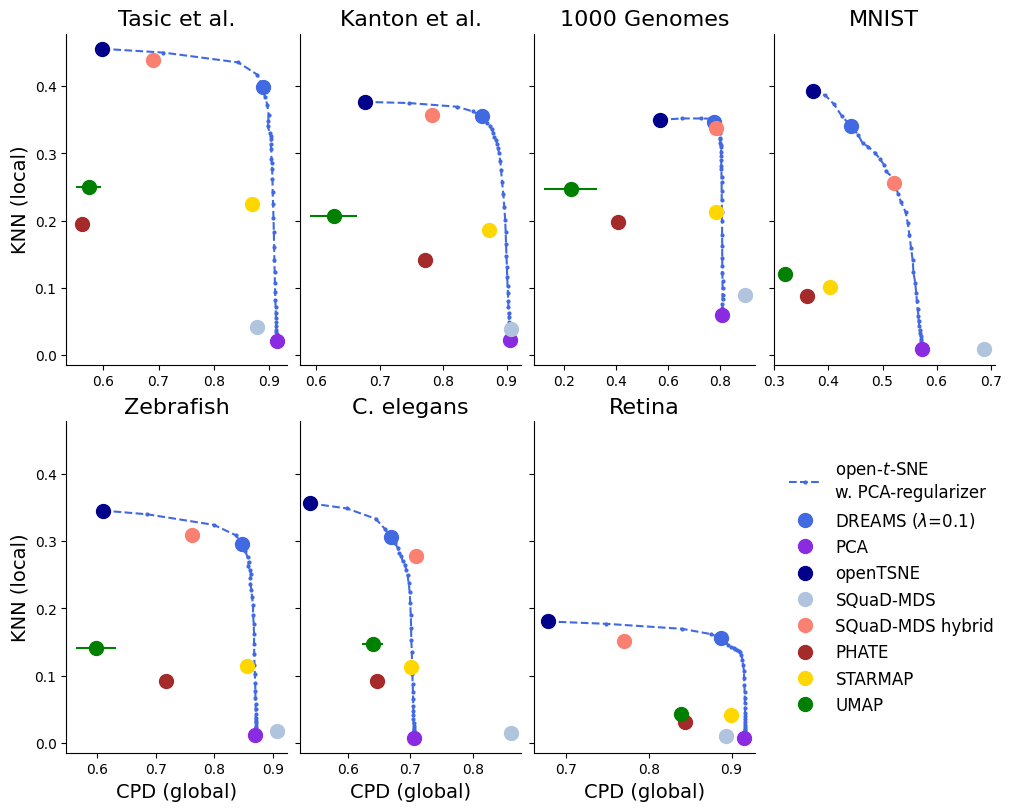

In [73]:
fig, ax = plt.subplots(2, 4, figsize=(10, 8), constrained_layout=True, gridspec_kw={'width_ratios': [2]*4}, sharey=True)
ax = ax.flatten()

# --- Configuration ---
marker_size = 2
scatter_size = 10
idx_01 = lambdas.index(0.1)

# Colors
col_errorbar = 'royalblue'
col_dreams = 'royalblue'
col_pca = 'blueviolet'
col_tsne = 'darkblue'
cols_om = ['lightsteelblue', 'salmon', 'brown', 'gold', 'green']
methods = ['SQuaD-MDS', 'SQuaD-MDS hybrid', 'PHATE', 'STARMAP', 'UMAP']

# --- Dataset-specific data ---
data_names = ["Tasic et al.", "Kanton et al.", "1000 Genomes", "MNIST", "Zebrafish", "C. elegans", "Retina"]
datasets = {
    "Tasic et al.": dict(
        pca_eval=tasic_pca2_scaled_eval,
        reg_knn=tasic_reg_knn_means, reg_cpd=tasic_reg_cpd_means,
        reg_knn_std=tasic_reg_knn_stds, reg_cpd_std=tasic_reg_cpd_stds,
        om_knn=tasic_om_knn_means, om_cpd=tasic_om_cpd_means,
        om_knn_std=tasic_om_knn_stds, om_cpd_std=tasic_om_cpd_stds
    ),
    "Kanton et al.": dict(
        pca_eval=kanton_eval_pca2_scaled,
        reg_knn=kanton_reg_knn_means, reg_cpd=kanton_reg_cpd_means,
        reg_knn_std=kanton_reg_knn_stds, reg_cpd_std=kanton_reg_cpd_stds,
        om_knn=kanton_om_knn_means, om_cpd=kanton_om_cpd_means,
        om_knn_std=kanton_om_knn_stds, om_cpd_std=kanton_om_cpd_stds
    ),
    "1000 Genomes": dict(
        pca_eval=genome_eval_pca2_scaled,
        reg_knn=genome_reg_knn_means, reg_cpd=genome_reg_cpd_means,
        reg_knn_std=genome_reg_knn_stds, reg_cpd_std=genome_reg_cpd_stds,
        om_knn=genome_om_knn_means, om_cpd=genome_om_cpd_means,
        om_knn_std=genome_om_knn_stds, om_cpd_std=genome_om_cpd_stds
    ),
    "MNIST": dict(
        pca_eval=mnist_eval_pca2_scaled,
        reg_knn=mnist_reg_knn_means, reg_cpd=mnist_reg_cpd_means,
        reg_knn_std=mnist_reg_knn_stds, reg_cpd_std=mnist_reg_cpd_stds,
        om_knn=mnist_om_knn_means, om_cpd=mnist_om_cpd_means,
        om_knn_std=mnist_om_knn_stds, om_cpd_std=mnist_om_cpd_stds
    ),
    "Zebrafish": dict(
        pca_eval=zfish_eval_pca2_scaled,
        reg_knn=zfish_reg_knn_means, reg_cpd=zfish_reg_cpd_means,
        reg_knn_std=zfish_reg_knn_stds, reg_cpd_std=zfish_reg_cpd_stds,
        om_knn=zfish_om_knn_means, om_cpd=zfish_om_cpd_means,
        om_knn_std=zfish_om_knn_stds, om_cpd_std=zfish_om_cpd_stds
    ),
    "C. elegans": dict(
        pca_eval=c_el_pca2_scaled_eval,
        reg_knn=c_el_reg_knn_means, reg_cpd=c_el_reg_cpd_means,
        reg_knn_std=c_el_reg_knn_stds, reg_cpd_std=c_el_reg_cpd_stds,
        om_knn=c_el_om_knn_means, om_cpd=c_el_om_cpd_means,
        om_knn_std=c_el_om_knn_stds, om_cpd_std=c_el_om_cpd_stds
    ),
    "Retina": dict(
        pca_eval=retina_eval_pca2_scaled,
        reg_knn=retina_reg_knn_means, reg_cpd=retina_reg_cpd_means,
        reg_knn_std=retina_reg_knn_stds, reg_cpd_std=retina_reg_cpd_stds,
        om_knn=retina_om_knn_means, om_cpd=retina_om_cpd_means,
        om_knn_std=retina_om_knn_stds, om_cpd_std=retina_om_cpd_stds
    ),
}

# --- Plot Loop ---
for i, name in enumerate(data_names):
    d = datasets[name]
    a = ax[i]
    a.set_title(name, fontsize=16)

    # PCA point
    a.errorbar(d['pca_eval'][2], d['pca_eval'][0], c=col_pca, markersize=scatter_size, fmt='o')

    # openTSNE and DREAMS
    a.errorbar(d['reg_cpd'][0], d['reg_knn'][0], c=col_tsne, markersize=scatter_size, fmt='o')
    a.errorbar(d['reg_cpd'][idx_01], d['reg_knn'][idx_01], c=col_dreams, markersize=scatter_size, fmt='o')

    # Regularizer (with std)
    a.errorbar(d['reg_cpd'], d['reg_knn'],
               xerr=d['reg_cpd_std'], yerr=d['reg_knn_std'],
               fmt='o--', c=col_errorbar, zorder=-1, markersize=marker_size)

    # Other methods
    for j, method in enumerate(methods):
        a.errorbar(d['om_cpd'][j], d['om_knn'][j],
                   xerr=d['om_cpd_std'][j], yerr=d['om_knn_std'][j],
                   fmt='o', markersize=scatter_size, c=cols_om[j])

    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)

    if i in [0, 4]:
        a.set_ylabel('KNN (local)', fontsize=14)

    if i >= 4:
        a.set_xlabel('CPD (global)', fontsize=14)

# --- Legend ---
legend_ax = ax[-1]
legend_ax.axis('off')

handles = [
    plt.Line2D([0], [0], color=col_errorbar, marker='o', linestyle='--', markersize=marker_size, label='open-$t$-SNE\nw. PCA-regularizer'),
    plt.Line2D([0], [0], color=col_dreams, marker='o', linestyle='None', markersize=scatter_size, label='DREAMS ($\lambda$=0.1)'),
    plt.Line2D([0], [0], color=col_pca, marker='o', linestyle='None', markersize=scatter_size, label='PCA'),
    plt.Line2D([0], [0], color=col_tsne, marker='o', linestyle='None', markersize=scatter_size, label='openTSNE'),
    *[plt.Line2D([0], [0], color=cols_om[i], marker='o', linestyle='None', markersize=scatter_size, label=methods[i]) for i in range(len(methods))]
]
legend_ax.legend(handles=handles, loc='center left', fontsize=12, frameon=False)


/tmp/ipykernel_3775089/1956547053.py:85: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a.errorbar(d['reg_cpd'][0], d['reg_knn'][0], c=col_tsne, markersize=scatter_size, fmt='o', clip_on=False)
/tmp/ipykernel_3775089/1956547053.py:86: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a.errorbar(d['reg_cpd'][idx_01], d['reg_knn'][idx_01], c=col_dreams, markersize=scatter_size, fmt='o', clip_on=False, zorder=10)


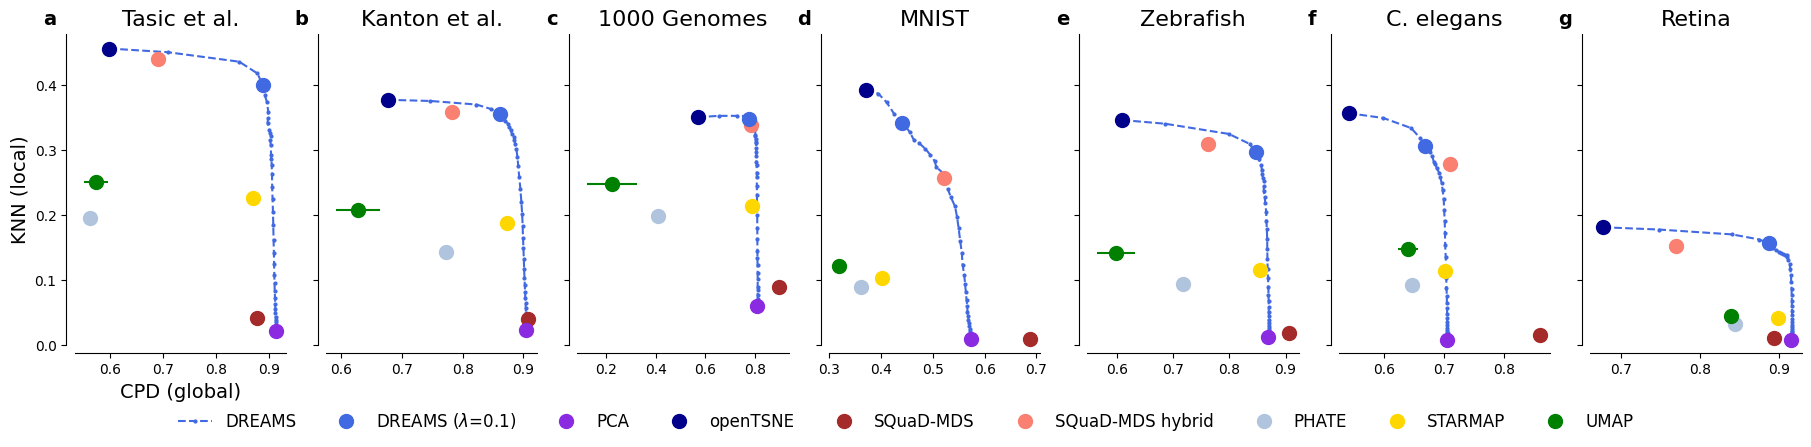

In [95]:
import string

# without 1000 Genomes
fig, ax = plt.subplots(1, 7, figsize=(18, 4), constrained_layout=True, gridspec_kw={'width_ratios': [1]*7}, sharey=True)
ax = ax.flatten()

# --- Configuration ---
marker_size = 2
scatter_size = 10
idx_01 = lambdas.index(0.1)

# Colors
col_errorbar = 'royalblue'
col_dreams = 'royalblue'
col_pca = 'blueviolet'
col_tsne = 'darkblue'
# cols_om = ['lightsteelblue', 'salmon', 'brown', 'gold', 'green']
cols_om = ['brown', 'salmon', 'lightsteelblue', 'gold', 'green']
methods = ['SQuaD-MDS', 'SQuaD-MDS hybrid', 'PHATE', 'STARMAP', 'UMAP']

# --- Dataset-specific data ---
data_names = ["Tasic et al.", "Kanton et al.", "1000 Genomes" ,"MNIST", "Zebrafish", "C. elegans", "Retina"]
datasets = {
    "Tasic et al.": dict(
        pca_eval=tasic_pca2_scaled_eval,
        reg_knn=tasic_reg_knn_means, reg_cpd=tasic_reg_cpd_means,
        reg_knn_std=tasic_reg_knn_stds, reg_cpd_std=tasic_reg_cpd_stds,
        om_knn=tasic_om_knn_means, om_cpd=tasic_om_cpd_means,
        om_knn_std=tasic_om_knn_stds, om_cpd_std=tasic_om_cpd_stds
    ),
    "Kanton et al.": dict(
        pca_eval=kanton_eval_pca2_scaled,
        reg_knn=kanton_reg_knn_means, reg_cpd=kanton_reg_cpd_means,
        reg_knn_std=kanton_reg_knn_stds, reg_cpd_std=kanton_reg_cpd_stds,
        om_knn=kanton_om_knn_means, om_cpd=kanton_om_cpd_means,
        om_knn_std=kanton_om_knn_stds, om_cpd_std=kanton_om_cpd_stds
    ),
    "1000 Genomes": dict(
        pca_eval=genome_eval_pca2_scaled,
        reg_knn=genome_reg_knn_means, reg_cpd=genome_reg_cpd_means,
        reg_knn_std=genome_reg_knn_stds, reg_cpd_std=genome_reg_cpd_stds,
        om_knn=genome_om_knn_means, om_cpd=genome_om_cpd_means,
        om_knn_std=genome_om_knn_stds, om_cpd_std=genome_om_cpd_stds
    ),
    "MNIST": dict(
        pca_eval=mnist_eval_pca2_scaled,
        reg_knn=mnist_reg_knn_means, reg_cpd=mnist_reg_cpd_means,
        reg_knn_std=mnist_reg_knn_stds, reg_cpd_std=mnist_reg_cpd_stds,
        om_knn=mnist_om_knn_means, om_cpd=mnist_om_cpd_means,
        om_knn_std=mnist_om_knn_stds, om_cpd_std=mnist_om_cpd_stds
    ),
    "Zebrafish": dict(
        pca_eval=zfish_eval_pca2_scaled,
        reg_knn=zfish_reg_knn_means, reg_cpd=zfish_reg_cpd_means,
        reg_knn_std=zfish_reg_knn_stds, reg_cpd_std=zfish_reg_cpd_stds,
        om_knn=zfish_om_knn_means, om_cpd=zfish_om_cpd_means,
        om_knn_std=zfish_om_knn_stds, om_cpd_std=zfish_om_cpd_stds
    ),
    "C. elegans": dict(
        pca_eval=c_el_pca2_scaled_eval,
        reg_knn=c_el_reg_knn_means, reg_cpd=c_el_reg_cpd_means,
        reg_knn_std=c_el_reg_knn_stds, reg_cpd_std=c_el_reg_cpd_stds,
        om_knn=c_el_om_knn_means, om_cpd=c_el_om_cpd_means,
        om_knn_std=c_el_om_knn_stds, om_cpd_std=c_el_om_cpd_stds
    ),
    "Retina": dict(
        pca_eval=retina_eval_pca2_scaled,
        reg_knn=retina_reg_knn_means, reg_cpd=retina_reg_cpd_means,
        reg_knn_std=retina_reg_knn_stds, reg_cpd_std=retina_reg_cpd_stds,
        om_knn=retina_om_knn_means, om_cpd=retina_om_cpd_means,
        om_knn_std=retina_om_knn_stds, om_cpd_std=retina_om_cpd_stds
    ),
}

# --- Plot Loop ---
for i, name in enumerate(data_names):
    d = datasets[name]
    a = ax[i]
    a.set_title(name, fontsize=16)

    # PCA point
    a.errorbar(d['pca_eval'][2], d['pca_eval'][0], c=col_pca, markersize=scatter_size, fmt='o', clip_on=False, zorder=10)

    # openTSNE and DREAMS
    a.errorbar(d['reg_cpd'][0], d['reg_knn'][0], c=col_tsne, markersize=scatter_size, fmt='o', clip_on=False)
    a.errorbar(d['reg_cpd'][idx_01], d['reg_knn'][idx_01], c=col_dreams, markersize=scatter_size, fmt='o', clip_on=False, zorder=10)

    # Regularizer (with std)
    a.errorbar(d['reg_cpd'], d['reg_knn'],
               xerr=d['reg_cpd_std'], yerr=d['reg_knn_std'],
               fmt='o--', c=col_errorbar, zorder=-1, markersize=marker_size, clip_on=False)

    # Other methods
    for j, method in enumerate(methods):
        a.errorbar(d['om_cpd'][j], d['om_knn'][j],
                   xerr=d['om_cpd_std'][j], yerr=d['om_knn_std'][j],
                   fmt='o', markersize=scatter_size, c=cols_om[j], clip_on=False)
        
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.set_ylim(0)  # Set y-limits for consistency
    # Move left spine a bit away from x=0
    a.spines['left'].set_position(('outward', 6))
    # Move bottom spine a bit upward from y=0
    a.spines['bottom'].set_position(('outward', 6))


    # Subplot label
    label = f"{string.ascii_lowercase[i]}"
    a.text(-0.15, 1.08, label, transform=a.transAxes,
           fontsize=14, va='top', ha='left', fontweight='bold')



ax[0].set_ylabel('KNN (local)', fontsize=14)
ax[0].set_xlabel('CPD (global)', fontsize=14)

# --- Legend ---
handles = [
    plt.Line2D([0], [0], color=col_errorbar, marker='o', linestyle='--', markersize=marker_size, label='DREAMS'),
    plt.Line2D([0], [0], color=col_dreams, marker='o', linestyle='None', markersize=scatter_size, label='DREAMS ($\\lambda$=0.1)'),
    plt.Line2D([0], [0], color=col_pca, marker='o', linestyle='None', markersize=scatter_size, label='PCA'),
    plt.Line2D([0], [0], color=col_tsne, marker='o', linestyle='None', markersize=scatter_size, label='openTSNE'),
    *[plt.Line2D([0], [0], color=cols_om[i], marker='o', linestyle='None', markersize=scatter_size, label=methods[i]) for i in range(len(methods))]
]

# Place the legend below the entire figure
fig.legend(
    handles=handles,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.1),  
    ncol=len(handles),
    fontsize=12,
    frameon=False
)


/tmp/ipykernel_3775089/2304356740.py:82: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a.errorbar(d['reg_knn'][0], d['reg_cpd'][0], c=col_tsne, markersize=scatter_size, fmt='o')
/tmp/ipykernel_3775089/2304356740.py:83: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a.errorbar(d['reg_knn'][idx_01], d['reg_cpd'][idx_01], c=col_dreams, markersize=scatter_size, fmt='o')


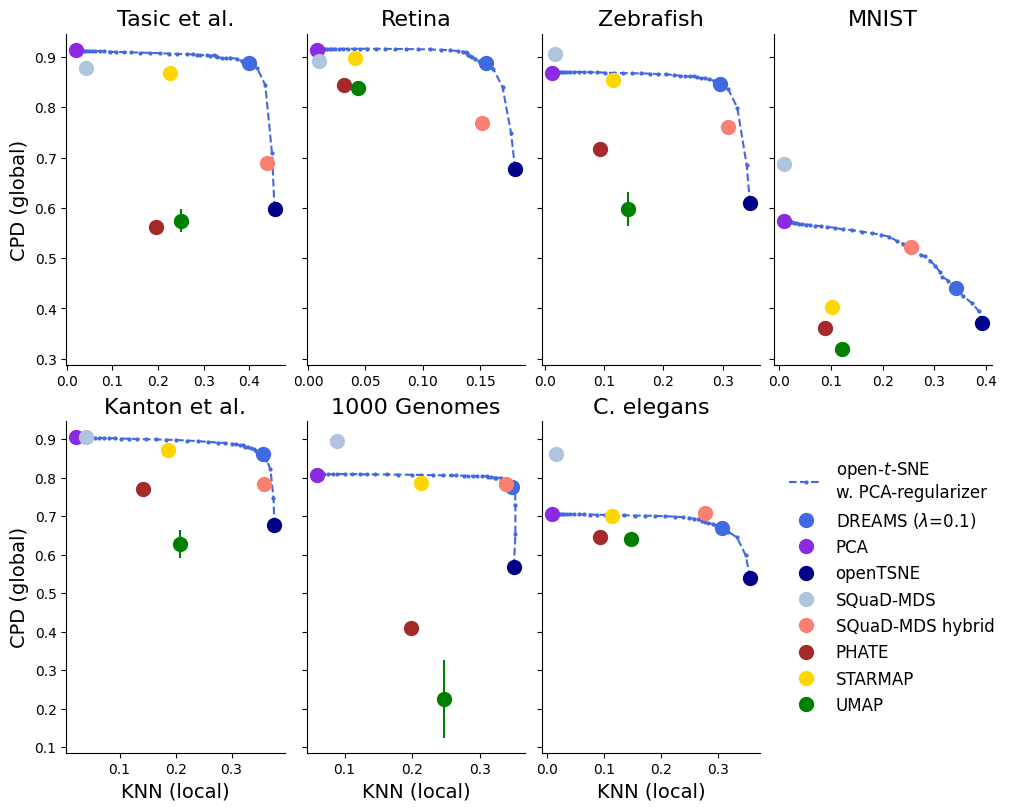

In [75]:
fig, ax = plt.subplots(2, 4, figsize=(10, 8), constrained_layout=True, gridspec_kw={'width_ratios': [2]*4}, sharey='row')
ax = ax.flatten()

# --- Configuration ---
marker_size = 2
scatter_size = 10
idx_01 = lambdas.index(0.1)

# Colors
col_errorbar = 'royalblue'
col_dreams = 'royalblue'
col_pca = 'blueviolet'
col_tsne = 'darkblue'
cols_om = ['lightsteelblue', 'salmon', 'brown', 'gold', 'green']
methods = ['SQuaD-MDS', 'SQuaD-MDS hybrid', 'PHATE', 'STARMAP', 'UMAP']

# --- Dataset-specific data ---
data_names = ["Tasic et al.", "Retina", "Zebrafish", "MNIST", "Kanton et al.", "1000 Genomes", "C. elegans"]

datasets = {
    "Tasic et al.": dict(
        pca_eval=tasic_pca2_scaled_eval,
        reg_knn=tasic_reg_knn_means, reg_cpd=tasic_reg_cpd_means,
        reg_knn_std=tasic_reg_knn_stds, reg_cpd_std=tasic_reg_cpd_stds,
        om_knn=tasic_om_knn_means, om_cpd=tasic_om_cpd_means,
        om_knn_std=tasic_om_knn_stds, om_cpd_std=tasic_om_cpd_stds
    ),
    "Retina": dict(
        pca_eval=retina_eval_pca2_scaled,
        reg_knn=retina_reg_knn_means, reg_cpd=retina_reg_cpd_means,
        reg_knn_std=retina_reg_knn_stds, reg_cpd_std=retina_reg_cpd_stds,
        om_knn=retina_om_knn_means, om_cpd=retina_om_cpd_means,
        om_knn_std=retina_om_knn_stds, om_cpd_std=retina_om_cpd_stds
    ),
    "Zebrafish": dict(
        pca_eval=zfish_eval_pca2_scaled,
        reg_knn=zfish_reg_knn_means, reg_cpd=zfish_reg_cpd_means,
        reg_knn_std=zfish_reg_knn_stds, reg_cpd_std=zfish_reg_cpd_stds,
        om_knn=zfish_om_knn_means, om_cpd=zfish_om_cpd_means,
        om_knn_std=zfish_om_knn_stds, om_cpd_std=zfish_om_cpd_stds
    ),
    "MNIST": dict(
        pca_eval=mnist_eval_pca2_scaled,
        reg_knn=mnist_reg_knn_means, reg_cpd=mnist_reg_cpd_means,
        reg_knn_std=mnist_reg_knn_stds, reg_cpd_std=mnist_reg_cpd_stds,
        om_knn=mnist_om_knn_means, om_cpd=mnist_om_cpd_means,
        om_knn_std=mnist_om_knn_stds, om_cpd_std=mnist_om_cpd_stds
    ),
    "Kanton et al.": dict(
        pca_eval=kanton_eval_pca2_scaled,
        reg_knn=kanton_reg_knn_means, reg_cpd=kanton_reg_cpd_means,
        reg_knn_std=kanton_reg_knn_stds, reg_cpd_std=kanton_reg_cpd_stds,
        om_knn=kanton_om_knn_means, om_cpd=kanton_om_cpd_means,
        om_knn_std=kanton_om_knn_stds, om_cpd_std=kanton_om_cpd_stds
    ),
    "1000 Genomes": dict(
        pca_eval=genome_eval_pca2_scaled,
        reg_knn=genome_reg_knn_means, reg_cpd=genome_reg_cpd_means,
        reg_knn_std=genome_reg_knn_stds, reg_cpd_std=genome_reg_cpd_stds,
        om_knn=genome_om_knn_means, om_cpd=genome_om_cpd_means,
        om_knn_std=genome_om_knn_stds, om_cpd_std=genome_om_cpd_stds
    ),
    "C. elegans": dict(
        pca_eval=c_el_pca2_scaled_eval,
        reg_knn=c_el_reg_knn_means, reg_cpd=c_el_reg_cpd_means,
        reg_knn_std=c_el_reg_knn_stds, reg_cpd_std=c_el_reg_cpd_stds,
        om_knn=c_el_om_knn_means, om_cpd=c_el_om_cpd_means,
        om_knn_std=c_el_om_knn_stds, om_cpd_std=c_el_om_cpd_stds
    ),
}

# --- Plot Loop (Swapped axes) ---
for i, name in enumerate(data_names):
    d = datasets[name]
    a = ax[i]
    a.set_title(name, fontsize=16)

    # PCA point (swap y and x)
    a.errorbar(d['pca_eval'][0], d['pca_eval'][2], c=col_pca, markersize=scatter_size, fmt='o')

    # openTSNE and DREAMS (swap y and x)
    a.errorbar(d['reg_knn'][0], d['reg_cpd'][0], c=col_tsne, markersize=scatter_size, fmt='o')
    a.errorbar(d['reg_knn'][idx_01], d['reg_cpd'][idx_01], c=col_dreams, markersize=scatter_size, fmt='o')

    # Regularizer (swap x and y + errors)
    a.errorbar(d['reg_knn'], d['reg_cpd'],
               xerr=d['reg_knn_std'], yerr=d['reg_cpd_std'],
               fmt='o--', c=col_errorbar, zorder=-1, markersize=marker_size)

    # Other methods (swapped)
    for j, method in enumerate(methods):
        a.errorbar(d['om_knn'][j], d['om_cpd'][j],
                   xerr=d['om_knn_std'][j], yerr=d['om_cpd_std'][j],
                   fmt='o', markersize=scatter_size, c=cols_om[j])

    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)

    if i in [0, 4]:
        a.set_ylabel('CPD (global)', fontsize=14)

    if i >= 4:
        a.set_xlabel('KNN (local)', fontsize=14)

# --- Legend ---
legend_ax = ax[-1]
legend_ax.axis('off')
handles = [
    plt.Line2D([0], [0], color=col_errorbar, marker='o', linestyle='--', markersize=marker_size, label='open-$t$-SNE\nw. PCA-regularizer'),
    plt.Line2D([0], [0], color=col_dreams, marker='o', linestyle='None', markersize=scatter_size, label='DREAMS ($\lambda$=0.1)'),
    plt.Line2D([0], [0], color=col_pca, marker='o', linestyle='None', markersize=scatter_size, label='PCA'),
    plt.Line2D([0], [0], color=col_tsne, marker='o', linestyle='None', markersize=scatter_size, label='openTSNE'),
    *[plt.Line2D([0], [0], color=cols_om[i], marker='o', linestyle='None', markersize=scatter_size, label=methods[i]) for i in range(len(methods))]
]
legend_ax.legend(handles=handles, loc='center left', fontsize=12, frameon=False)


/tmp/ipykernel_3775089/602829476.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[0].scatter(tasic_reg_knn_means[0], tasic_reg_cpd_means[0], label='_nolegend_', c='r', s=450, marker='*', zorder=10)
/tmp/ipykernel_3775089/602829476.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[0].text(tasic_reg_knn_means[0], tasic_reg_cpd_means[0] - 0.028, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)
/tmp/ipykernel_3775089/602829476.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent wit

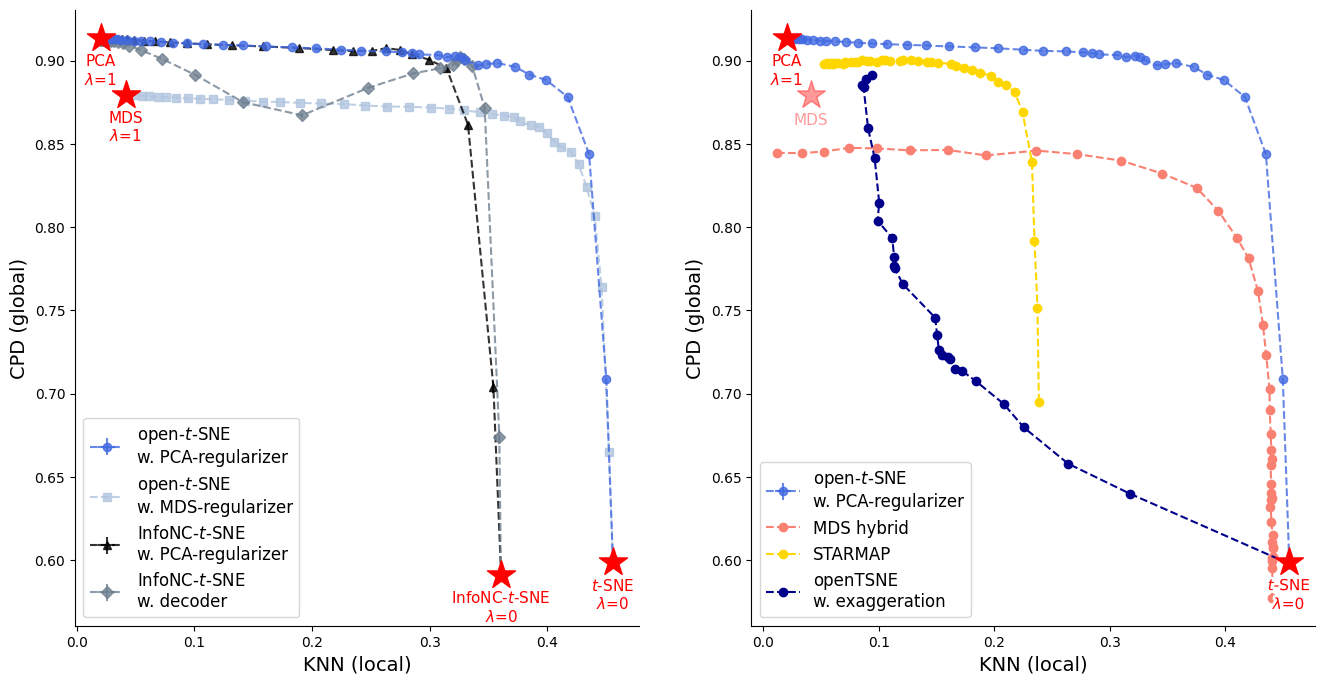

In [86]:
import matplotlib.patheffects as pe


fig, ax = plt.subplots(1,2, figsize=(16,8), sharey=True)

# own methods
col_pca = 'blueviolet'
col_tsne = 'darkblue'
# PCA
ax[0].scatter(tasic_pca2_scaled_eval[0], tasic_pca2_scaled_eval[2], label="_nolegend_", c='r', s=450, marker='*', zorder=10)
ax[0].text(tasic_pca2_scaled_eval[0], tasic_pca2_scaled_eval[2] - 0.028, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)
# MDS
ax[0].scatter(tasic_mds_eval[0], tasic_mds_eval[2], label="_nolegend_", c='r', s=450, marker='*', zorder=10)
ax[0].text(tasic_mds_eval[0], tasic_mds_eval[2] - 0.028, "MDS\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)
# openTSNE
ax[0].scatter(tasic_reg_knn_means[0], tasic_reg_cpd_means[0], label='_nolegend_', c='r', s=450, marker='*', zorder=10)
ax[0].text(tasic_reg_knn_means[0], tasic_reg_cpd_means[0] - 0.028, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)
# InfoNC-t-SNE
ax[0].scatter(tasic_cne_reg_knn_means[0], tasic_cne_reg_cpd_means[0], label='_nolegend_', c='r', s=450, marker='*', zorder=10)
ax[0].text(tasic_cne_reg_knn_means[0], tasic_cne_reg_cpd_means[0] - 0.028, "InfoNC-$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10) 

# curves
ax[0].errorbar(tasic_reg_knn_means, tasic_reg_cpd_means, xerr=tasic_reg_knn_stds, yerr=tasic_reg_cpd_stds, fmt='o--', c=col_dreams, label="open-$t$-SNE\nw. PCA-regularizer", zorder=6, markersize=6, linewidth=1.5, alpha=0.8)
ax[0].errorbar(tasic_mds_reg_knn_means, tasic_mds_reg_cpd_means, fmt='s--', c='lightsteelblue', label="open-$t$-SNE\nw. MDS-regularizer", zorder=5, markersize=6, linewidth=1.5, alpha=0.8)
ax[0].errorbar(tasic_cne_reg_knn_means, tasic_cne_reg_cpd_means, xerr=tasic_cne_reg_knn_stds, yerr=tasic_cne_reg_cpd_stds, fmt='^--', c='black', label="InfoNC-$t$-SNE\nw. PCA-regularizer", zorder=5, markersize=6, linewidth=1.5, alpha=0.8)
ax[0].errorbar(tasic_cne_dec_knn_means, tasic_cne_dec_cpd_means, xerr=tasic_cne_dec_knn_stds, yerr=tasic_cne_dec_cpd_stds, fmt='D--', c='slategray', label="InfoNC-$t$-SNE\nw. decoder", zorder=5, markersize=6, linewidth=1.5, alpha=0.8)

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_xlabel('KNN (local)', fontsize=14)
ax[0].set_ylabel('CPD (global)', fontsize=14)
ax[0].legend(fontsize=12)

# other methods
# PCA
ax[1].scatter(tasic_pca2_scaled_eval[0], tasic_pca2_scaled_eval[2], label="_nolegend_", c='r', s=450, marker='*', zorder=10)
ax[1].text(tasic_pca2_scaled_eval[0], tasic_pca2_scaled_eval[2] - 0.028, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)
# MDS
ax[1].scatter(tasic_mds_eval[0], tasic_mds_eval[2], label="_nolegend_", c='r', s=450, marker='*', zorder=10, alpha=0.4)
ax[1].text(tasic_mds_eval[0], tasic_mds_eval[2] - 0.018, "MDS", ha='center', fontsize=11, c='r', zorder=10, alpha=0.4)
# openTSNE
ax[1].scatter(tasic_reg_knn_means[0], tasic_reg_cpd_means[0], label='_nolegend_', c='r', s=450, marker='*', zorder=10)
ax[1].text(tasic_reg_knn_means[0], tasic_reg_cpd_means[0] - 0.028, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=11, path_effects=[pe.withStroke(linewidth=4, foreground='white')])

#curves
ax[1].errorbar(tasic_reg_knn_means, tasic_reg_cpd_means, xerr=tasic_reg_knn_stds, yerr=tasic_reg_cpd_stds, fmt='o--', c=col_dreams, label="open-$t$-SNE\nw. PCA-regularizer", zorder=6, markersize=6, linewidth=1.5, alpha=0.8)
ax[1].errorbar(tasic_mds_hy_knn_means, tasic_mds_hy_cpd_means, fmt='o--', c='salmon', label="MDS hybrid", zorder=5)
ax[1].errorbar(tasic_starmap_knn_means, tasic_starmap_cpd_means, fmt='o--', c='gold', label="STARMAP", zorder=5)
ax[1].errorbar(tasic_tsne_exag_knn_means, tasic_tsne_exag_cpd_means, fmt='o--', c='darkblue', label="openTSNE\nw. exaggeration", zorder=5)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_xlabel('KNN (local)', fontsize=14)
ax[1].set_ylabel('CPD (global)', fontsize=14)
ax[1].legend(fontsize=12)

for a in ax:
    a.tick_params(labelleft=True, labelbottom=True)  

/tmp/ipykernel_1451162/3631143231.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[0].scatter(tasic_reg_cpd_means[0], tasic_reg_knn_means[0], label='_nolegend_', c='r', s=star_size, marker='*', zorder=10)
/tmp/ipykernel_1451162/3631143231.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[0].text(tasic_reg_cpd_means[0], tasic_reg_knn_means[0] - 0.04, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=text_size, c='r', zorder=10)
/tmp/ipykernel_1451162/3631143231.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

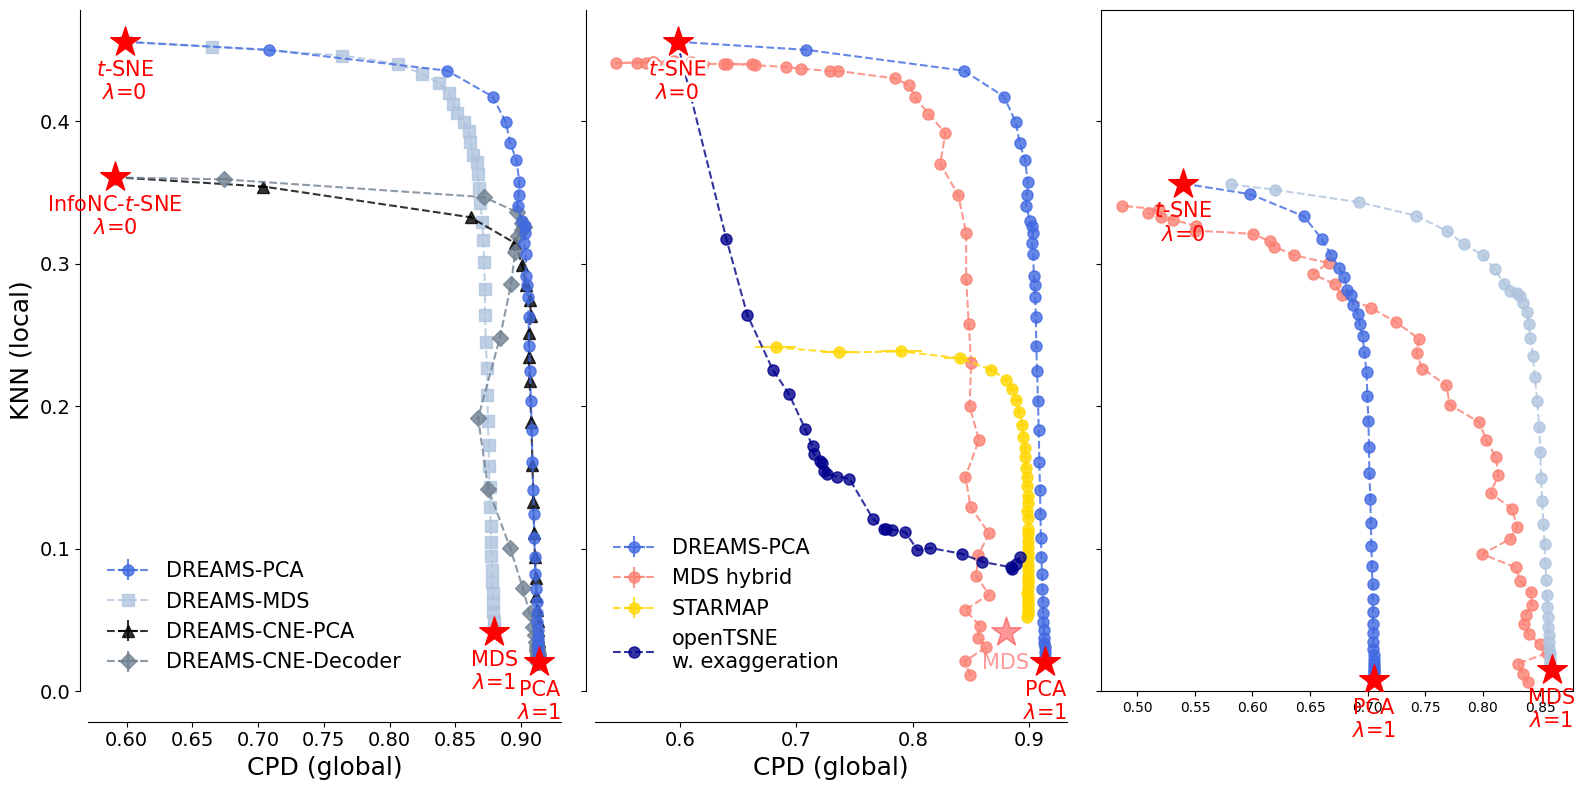

In [149]:
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(16, 8), sharey=True)

# own methods
col_pca = 'blueviolet'
col_tsne = 'darkblue'
col_dreams = 'royalblue'


star_size = 500
text_size = 15
marker_size = 8


# PCA
ax[0].scatter(tasic_pca2_scaled_eval[2], tasic_pca2_scaled_eval[0], label="_nolegend_", c='r', s=star_size, marker='*', zorder=10)
ax[0].text(tasic_pca2_scaled_eval[2], tasic_pca2_scaled_eval[0] - 0.04, "PCA\n$\lambda$=1", ha='center', fontsize=text_size, c='r', zorder=10)
# MDS
ax[0].scatter(tasic_mds_eval[2], tasic_mds_eval[0], label="_nolegend_", c='r', s=star_size, marker='*', zorder=10)
ax[0].text(tasic_mds_eval[2], tasic_mds_eval[0] - 0.04, "MDS\n$\lambda$=1", ha='center', fontsize=text_size, c='r', zorder=10)
# openTSNE
ax[0].scatter(tasic_reg_cpd_means[0], tasic_reg_knn_means[0], label='_nolegend_', c='r', s=star_size, marker='*', zorder=10)
ax[0].text(tasic_reg_cpd_means[0], tasic_reg_knn_means[0] - 0.04, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=text_size, c='r', zorder=10)
# InfoNC-t-SNE
ax[0].scatter(tasic_cne_reg_cpd_means[0], tasic_cne_reg_knn_means[0], label='_nolegend_', c='r', s=star_size, marker='*', zorder=10)
ax[0].text(tasic_cne_reg_cpd_means[0], tasic_cne_reg_knn_means[0] - 0.04, "InfoNC-$t$-SNE\n$\lambda$=0", ha='center', fontsize=text_size, c='r', zorder=10) 

# curves
ax[0].errorbar(tasic_reg_cpd_means, tasic_reg_knn_means, xerr=tasic_reg_cpd_stds, yerr=tasic_reg_knn_stds, fmt='o--', c=col_dreams, label="DREAMS-PCA", zorder=6, markersize=marker_size, linewidth=1.5, alpha=0.8)
ax[0].errorbar(tasic_mds_reg_cpd_means, tasic_mds_reg_knn_means, fmt='s--', c='lightsteelblue', label="DREAMS-MDS", zorder=5, markersize=marker_size, linewidth=1.5, alpha=0.8)
ax[0].errorbar(tasic_cne_reg_cpd_means, tasic_cne_reg_knn_means, xerr=tasic_cne_reg_cpd_stds, yerr=tasic_cne_reg_knn_stds, fmt='^--', c='black', label="DREAMS-CNE-PCA", zorder=5, markersize=marker_size, linewidth=1.5, alpha=0.8)
ax[0].errorbar(tasic_cne_dec_cpd_means, tasic_cne_dec_knn_means, xerr=tasic_cne_dec_cpd_stds, yerr=tasic_cne_dec_knn_stds, fmt='D--', c='slategray', label="DREAMS-CNE-Decoder", zorder=5, markersize=marker_size, linewidth=1.5, alpha=0.8)

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_xlabel('CPD (global)', fontsize=18)
ax[0].set_ylabel('KNN (local)', fontsize=18)
ax[0].legend(fontsize=15, frameon=False)

# other methods
# PCA
ax[1].scatter(tasic_pca2_scaled_eval[2], tasic_pca2_scaled_eval[0], label="_nolegend_", c='r', s=star_size, marker='*', zorder=10)
ax[1].text(tasic_pca2_scaled_eval[2], tasic_pca2_scaled_eval[0] - 0.04, "PCA\n$\lambda$=1", ha='center', fontsize=text_size, c='r', zorder=10)
# MDS
ax[1].scatter(tasic_mds_eval[2], tasic_mds_eval[0], label="_nolegend_", c='r', s=star_size, marker='*', zorder=10, alpha=0.4)
ax[1].text(tasic_mds_eval[2], tasic_mds_eval[0] - 0.026, "MDS", ha='center', fontsize=text_size, c='r', zorder=10, alpha=0.4)
# openTSNE
ax[1].scatter(tasic_reg_cpd_means[0], tasic_reg_knn_means[0], label='_nolegend_', c='r', s=star_size, marker='*', zorder=10)
ax[1].text(tasic_reg_cpd_means[0], tasic_reg_knn_means[0] - 0.04, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=text_size, c='r', zorder=11, path_effects=[pe.withStroke(linewidth=4, foreground='white')])

# curves
ax[1].errorbar(tasic_reg_cpd_means, tasic_reg_knn_means, xerr=tasic_reg_cpd_stds, yerr=tasic_reg_knn_stds, fmt='o--', c=col_dreams, label="DREAMS-PCA", zorder=6, markersize=marker_size, linewidth=1.5, alpha=0.8)
ax[1].errorbar(tasic_mds_hy_cpd_means, tasic_mds_hy_knn_means, xerr=tasic_mds_hy_cpd_stds, yerr=tasic_mds_hy_knn_stds, fmt='o--', c='salmon', label="MDS hybrid", zorder=5, markersize=marker_size, linewidth=1.5, alpha=0.8)
ax[1].errorbar(tasic_starmap_cpd_means, tasic_starmap_knn_means, xerr=tasic_starmap_cpd_stds, yerr=tasic_starmap_knn_stds, fmt='o--', c='gold', label="STARMAP", zorder=5, markersize=marker_size, linewidth=1.5, alpha=0.8)
ax[1].errorbar(tasic_tsne_exag_cpd_means, tasic_tsne_exag_knn_means, fmt='o--', c='darkblue', label="openTSNE\nw. exaggeration", zorder=5, markersize=marker_size, linewidth=1.5, alpha=0.8)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_xlabel('CPD (global)', fontsize=18)
#ax[1].set_ylabel('KNN (local)', fontsize=14)
ax[1].legend(fontsize=15, frameon=False)

# for a in ax:
#     a.tick_params(labelleft=True, labelbottom=True)

ax[0].set_ylim(0)  # Set y-limits for consistency
    # Move left spine a bit away from x=0
ax[0].spines['left'].set_position(('outward', 6))
    # Move bottom spine a bit upward from y=0
ax[0].spines['bottom'].set_position(('outward', 22))

ax[1].set_ylim(0)  # Set y-limits for consistency
    # Move left spine a bit away from x=0
ax[1].spines['left'].set_position(('outward', 6))
    # Move bottom spine a bit upward from y=0
ax[1].spines['bottom'].set_position(('outward', 22))

# panel c
ax[2].errorbar(c_el_reg_cpd_means, c_el_reg_knn_means, xerr=c_el_reg_cpd_stds, yerr=c_el_reg_knn_stds, fmt='o--', c=col_dreams, label="DREAMS-PCA", zorder=6, markersize=marker_size, linewidth=1.5, alpha=0.8)
ax[2].errorbar(c_el_mds_hy_cpd_means, c_el_mds_hy_knn_means, xerr=c_el_mds_hy_cpd_stds, yerr=c_el_mds_hy_knn_stds, fmt='o--', c='salmon', label="MDS hybrid", zorder=5, markersize=marker_size, linewidth=1.5, alpha=0.8)
ax[2].errorbar(c_el_mds_reg_cpd_means, c_el_mds_reg_knn_means, xerr=c_el_mds_reg_cpd_stds, yerr=c_el_mds_reg_knn_stds, fmt='o--', c='lightsteelblue', label="DREAMS-PCA", zorder=6, markersize=marker_size, linewidth=1.5, alpha=0.8)

# PCA
ax[2].scatter(c_el_pca2_scaled_eval[2], c_el_pca2_scaled_eval[0], label="_nolegend_", c='r', s=star_size, marker='*', zorder=10)
ax[2].text(c_el_pca2_scaled_eval[2], c_el_pca2_scaled_eval[0] - 0.04, "PCA\n$\lambda$=1", ha='center', fontsize=text_size, c='r', zorder=10)
# MDS
ax[2].scatter(c_el_mds_eval[2], c_el_mds_eval[0], label="_nolegend_", c='r', s=star_size, marker='*', zorder=10)
ax[2].text(c_el_mds_eval[2], c_el_mds_eval[0] - 0.04, "MDS\n$\lambda$=1", ha='center', fontsize=text_size, c='r', zorder=10)
# openTSNE
ax[2].scatter(c_el_reg_cpd_means[0], c_el_reg_knn_means[0], label='_nolegend_', c='r', s=star_size, marker='*', zorder=10)
ax[2].text(c_el_reg_cpd_means[0], c_el_reg_knn_means[0] - 0.04, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=text_size, c='r', zorder=10)


ax[0].tick_params(axis='both', labelsize=14)
ax[1].tick_params(axis='both', labelsize=14)


plt.tight_layout()
plt.show()


/tmp/ipykernel_525663/3606848219.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.scatter(tasic_reg_cpd_means[0], tasic_reg_knn_means[0], label='_nolegend_', c='r', s=450, marker='*', zorder=100)
/tmp/ipykernel_525663/3606848219.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(tasic_reg_cpd_means[0], tasic_reg_knn_means[0] - 0.028, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=100)


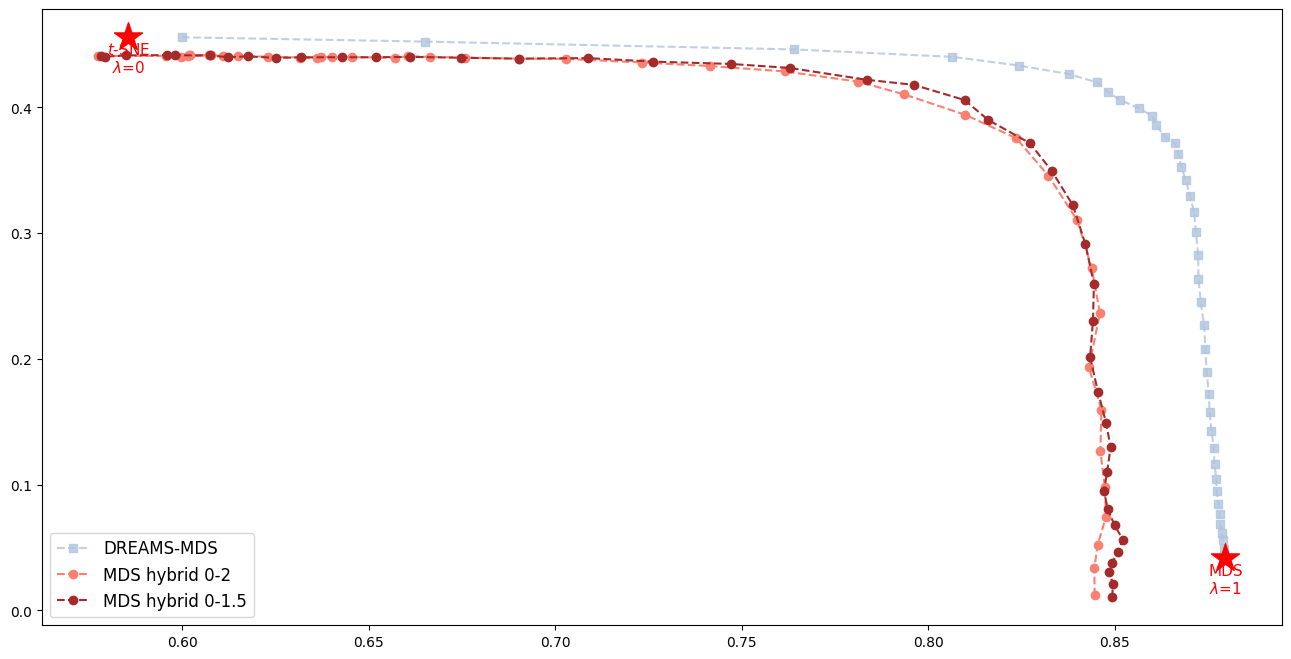

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

# MDS
ax.scatter(tasic_mds_eval[2], tasic_mds_eval[0], label="_nolegend_", c='r', s=450, marker='*', zorder=100)
ax.text(tasic_mds_eval[2], tasic_mds_eval[0] - 0.028, "MDS\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=100)
# openTSNE
ax.scatter(tasic_reg_cpd_means[0], tasic_reg_knn_means[0], label='_nolegend_', c='r', s=450, marker='*', zorder=100)
ax.text(tasic_reg_cpd_means[0], tasic_reg_knn_means[0] - 0.028, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=100)

# curves
ax.errorbar(tasic_mds_reg_cpd_means, tasic_mds_reg_knn_means, fmt='s--', c='lightsteelblue', label="DREAMS-MDS", zorder=5, markersize=6, linewidth=1.5, alpha=0.8)
ax.errorbar(tasic_mds_hy_cpd_means, tasic_mds_hy_knn_means, fmt='o--', c='salmon', label="MDS hybrid 0-2", zorder=5)
ax.errorbar(tasic_mds_hy2_cpd_means, tasic_mds_hy2_knn_means, fmt='o--', c='brown', label="MDS hybrid 0-1.5", zorder=5)

ax.legend(fontsize=12)

